# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
df= pd.read_csv("churn_dataset.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
# checking for the dataset
df.shape

(7043, 21)

In [4]:
# printing each feature / column names 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Information About Features

`customerID` : A unique number given to each customer.

`gender` : Describes whether the customer is male or female.

`SeniorCitizen` : Shows if the customer is a senior citizen (yes or no).

`Partner` : Tells if the customer has a husband/wife or partner.

`Dependents` : Describes if the customer has children or family members who depend on them.

`tenure` : Shows how many months the customer has been with the company.

`PhoneService` : Tells whether the customer has a phone connection.

`MultipleLines` : Describes if the customer has more than one phone line.

`InternetService` : Shows what type of internet the customer uses (DSL, Fiber, or none).

`OnlineSecurity` : Tells if the customer has online security service.

`OnlineBackup` : Shows if the customer has online backup service to save files.

`DeviceProtection` : Describes if the customer has protection for their devices.

`TechSupport` : Tells if the customer gets technical support service.

`StreamingTV` : Shows if the customer watches TV through streaming service.

`StramingMovies` : Describes if the customer watches movies through streaming service.

`Contract` : Tells the type of plan the customer has (month-to-month, 1 year, or 2 years).

`PaperlessBilling` : Shows if the customer receives bills online instead of paper.

`PaymentMethod` : Describes how the customer pays (like online, bank transfer, credit card, or check).

`MonthlyCharges` : Shows how much the customer pays every month.

`TotalCharges`: Tells how much the customer has paid in total since joining.

`Churn` : Shows whether the customer left the company or stayed.


### Droppping customerID feature, cause it's not that much important

In [5]:
df.drop("customerID",axis=1, inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Observations:  
- As we can see here we have 3 numerical and 18 categorical columns / features in our dataset.
- 1 is of float datatype, 2 are int int datatype, and rest of them are of object datatype.
- None of them contains any null value or we can say our dataset don't have null values.

In [7]:
# rechecking for the sum of null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# checking for the duplicate values 
df.duplicated().sum()

np.int64(22)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

### Here, we have one column "TotalCharges" is in object datatype but we need to convert that in float because it contains numerical values 

In [11]:
df=df[df["TotalCharges"] != " "]
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [12]:
df["TotalCharges"].dtype

dtype('float64')

### Converting SeniorCitizen column's values from 0 and 1 to no and yes

In [13]:
df["SeniorCitizen"]= df["SeniorCitizen"].replace(1,"yes")
df["SeniorCitizen"]= df["SeniorCitizen"].replace(0,"no")

In [14]:
df.SeniorCitizen.unique()

array(['no', 'yes'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   object 
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [16]:
# converting all the categorical columns to lower case 
df["SeniorCitizen"]= df["SeniorCitizen"].str.lower()
df["gender"]= df["gender"].str.lower()
df["Partner"]= df["Partner"].str.lower()
df["Dependents"]= df["Dependents"].str.lower()
df["PhoneService"]= df["PhoneService"].str.lower()
df["MultipleLines"]= df["MultipleLines"].str.lower()
df["InternetService"]= df["InternetService"].str.lower()
df["OnlineSecurity"]= df["OnlineSecurity"].str.lower()
df["OnlineBackup"]= df["OnlineBackup"].str.lower()
df["DeviceProtection"]= df["DeviceProtection"].str.lower()
df["TechSupport"]= df["TechSupport"].str.lower()
df["StreamingTV"]= df["StreamingTV"].str.lower()
df["StreamingMovies"]= df["StreamingMovies"].str.lower()
df["Contract"]= df["Contract"].str.lower()
df["PaperlessBilling"]= df["PaperlessBilling"].str.lower()
df["PaymentMethod"]= df["PaymentMethod"].str.lower()
df["Churn"]= df["Churn"].str.lower()

In [17]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  female            no     yes         no       1           no   
1    male            no      no         no      34          yes   
2    male            no      no         no       2          yes   
3    male            no      no         no      45           no   
4  female            no      no         no       2          yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  no phone service             dsl             no          yes   
1                no             dsl            yes           no   
2                no             dsl            yes          yes   
3  no phone service             dsl            yes           no   
4                no     fiber optic             no           no   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               no          no          no              no  month-to-month   
1              yes          no          no              no        one year   
2               no          no          no              no  month-to-month   
3              yes         yes          no              no        one year   
4               no          no          no              no  month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              yes           electronic check           29.85         29.85   
1               no               mailed check           56.95       1889.50   
2              yes               mailed check           53.85        108.15   
3               no  bank transfer (automatic)           42.30       1840.75   
4              yes           electronic check           70.70        151.65   

  Churn  
0    no  
1    no  
2   yes  
3    no  
4   yes

In [18]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7010.000000     7010.000000   7010.000000
mean     32.520399       64.888666   2290.353388
std      24.520441       30.064769   2266.820832
min       1.000000       18.250000     18.800000
25%       9.000000       35.750000    408.312500
50%      29.000000       70.400000   1403.875000
75%      56.000000       89.900000   3807.837500
max      72.000000      118.750000   8684.800000

In [19]:
# checking for the correlation between numerical columns only
df.corr(numeric_only=True)

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.244194      0.825293
MonthlyCharges  0.244194        1.000000      0.650540
TotalCharges    0.825293        0.650540      1.000000

In [20]:
# Checking for the skewness fir numeric columns
df.skew(numeric_only=True)

tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges      0.958322
dtype: float64

# Data Visualization

In [21]:
# Splitting into numerical and categorical columns
num_cols= df.select_dtypes(include=[int,float]).columns.to_list()
cat_cols= df.select_dtypes(include=[object]).columns.to_list()

In [22]:
print(num_cols)
print()
print(cat_cols)

['tenure', 'MonthlyCharges', 'TotalCharges']

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

# Distribution of the data

## Univariate analysis of numerical columns

## Box Plot

tenure    Axes(0.125,0.786098;0.168478x0.0939024)
dtype: object

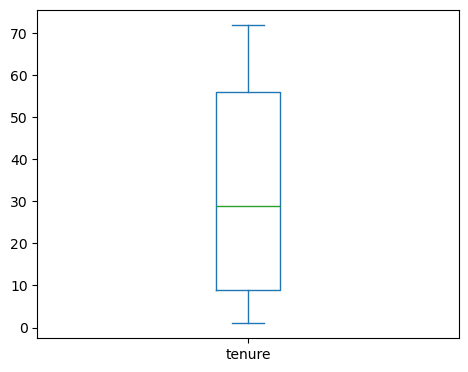

In [23]:
df.tenure.plot(kind="box", subplots=True, figsize=(25,35), layout= (7,4))

MonthlyCharges    Axes(0.125,0.786098;0.168478x0.0939024)
dtype: object

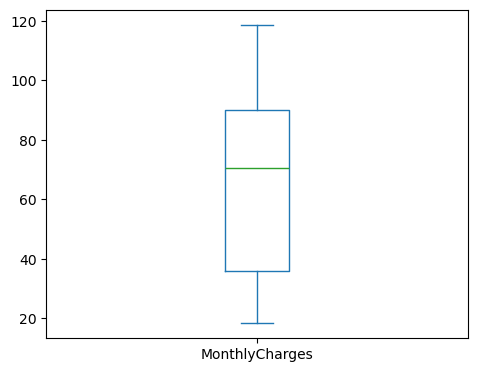

In [24]:
df.MonthlyCharges.plot(kind="box", subplots=True, figsize=(25,35), layout= (7,4))

TotalCharges    Axes(0.125,0.786098;0.168478x0.0939024)
dtype: object

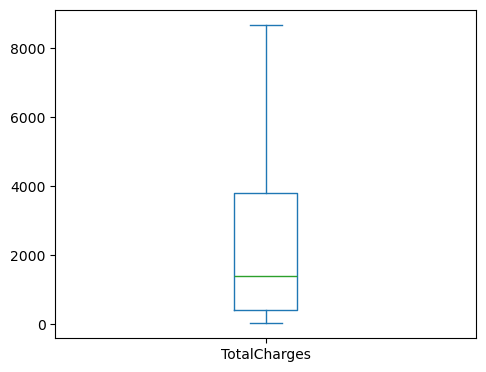

In [25]:
df.TotalCharges.plot(kind="box", subplots=True, figsize=(25,35), layout= (7,4))

## Observations: 
- There are no outliers present in our dataset

## Histogram

In [26]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
tenure = num_cols[0]
MonthlyCharges = num_cols[1]
TotalCharges = num_cols[2]

In [28]:
# function to plot histograms
def plot_histogram(df,column):
    plt.figure(figsize=(4,5))
    sns.histplot(data=df[column], bins=5, stat= "percent", color="green")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.tight_layout()

In [29]:
df.SeniorCitizen.unique()

array(['no', 'yes'], dtype=object)

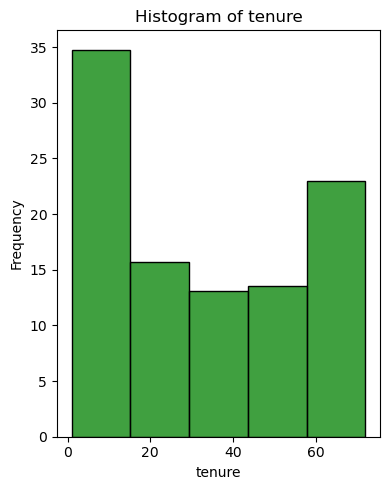

In [30]:
plot_histogram(df, tenure)

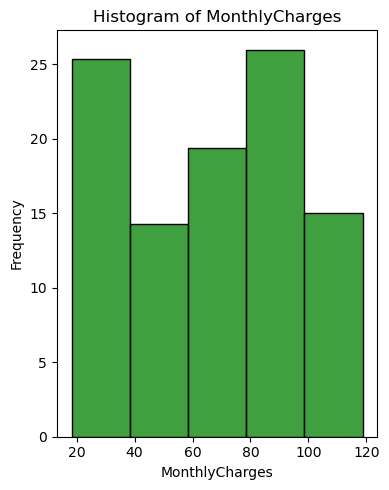

In [31]:
plot_histogram(df, MonthlyCharges)

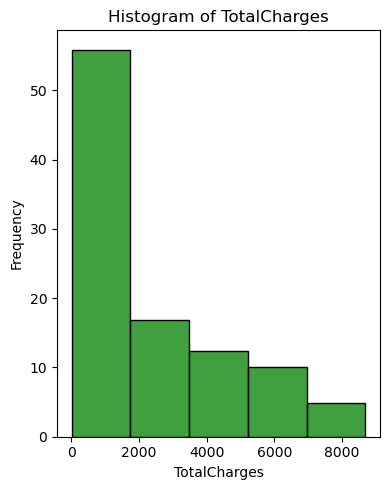

In [32]:
plot_histogram(df, TotalCharges)

# Observations:

**1. Histogram of Tenure**

- Most customers have **very low tenure (0–10 months)** — this bar is the highest.
- This suggests many customers are **new or recently joined**.
- Fewer customers have very long tenure (50–70 months), meaning **long-term customers are comparatively fewer**.

**2. Histogram of MonthlyCharges**

- Monthly charges are **spread across a wide range (around 20 to 120)**.
- The distribution is quite **balanced**, with no extreme peaks.
- Many customers fall in the **mid-price ranges (around 60–90)**.

**3. Histogram of TotalCharges**

- TotalCharges is **right-skewed (long tail to the right)**.
- Most customers have **low total charges**, typically because they are new or haven't stayed long.
- Only a small number of customers have **very high total charges**, indicating long-term subscribers.

## Univariate Analysis On Categorical Columns

In [33]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [34]:
gender = cat_cols[0]
SeniorCitizen = cat_cols[1]
Partner = cat_cols[2]
Dependents = cat_cols[3]
PhoneService = cat_cols[4]
MultipleLines = cat_cols[5]
InternetService = cat_cols[6]
OnlineSecurity = cat_cols[7]
OnlineBackup = cat_cols[8]
DeviceProtection = cat_cols[9]
TechSupport = cat_cols[10]
StreamingTV = cat_cols[11]
StreamingMovies = cat_cols[12]
Contract = cat_cols[13]
PaperlessBilling = cat_cols[14]
PaymentMethod =cat_cols[15]
Churn =cat_cols[16]

In [35]:
def plot_pie_chart(df,column):
    df[column].value_counts().plot.pie(
    autopct="%1.1f%%", 
    colors=sns.color_palette("Greens"))
    plt.title(f"Pie Chart For {column}")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Categories")
    plt.tight_layout()

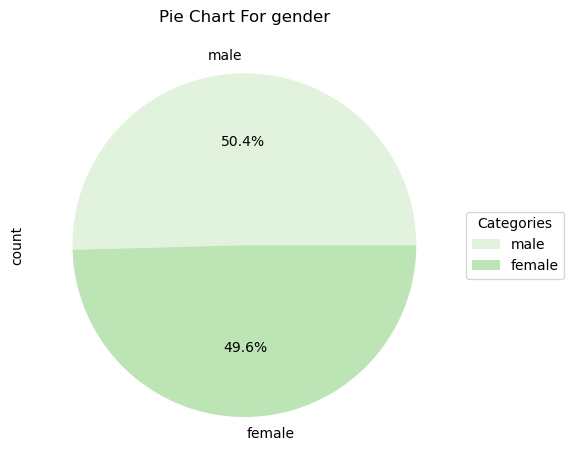

In [36]:
plot_pie_chart(df,gender)

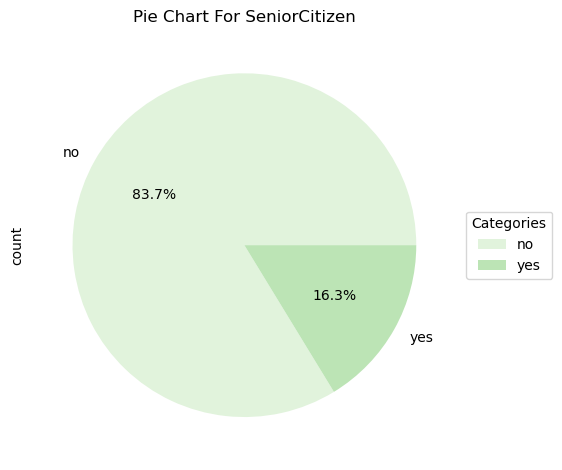

In [37]:
plot_pie_chart(df,SeniorCitizen)

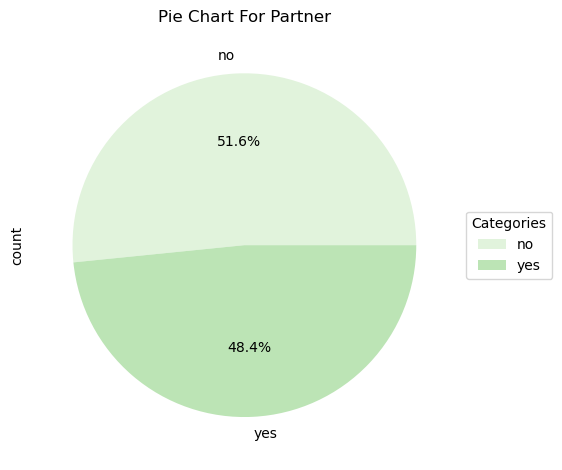

In [38]:
plot_pie_chart(df,Partner)

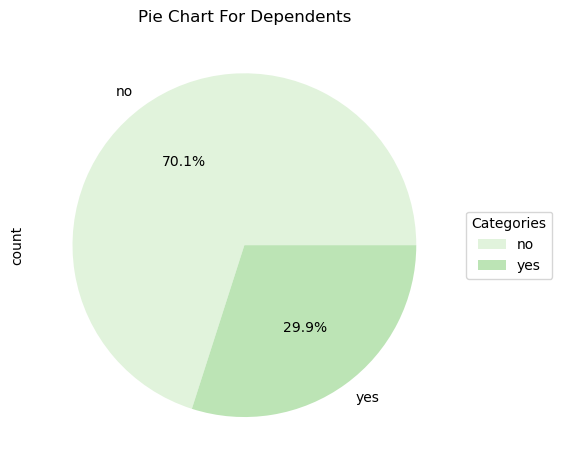

In [39]:
plot_pie_chart(df,Dependents)

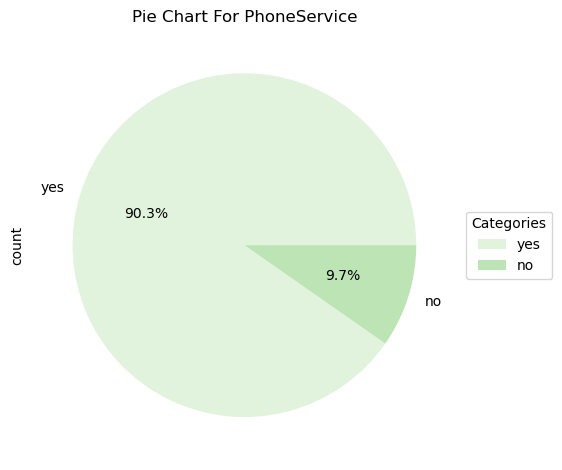

In [40]:
plot_pie_chart(df,PhoneService)

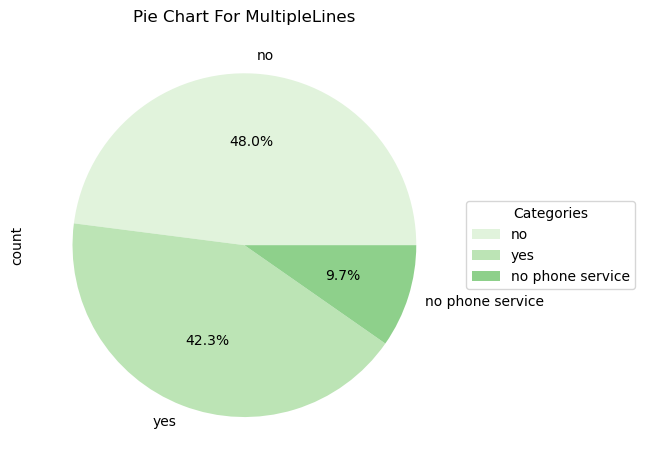

In [41]:
plot_pie_chart(df,MultipleLines)

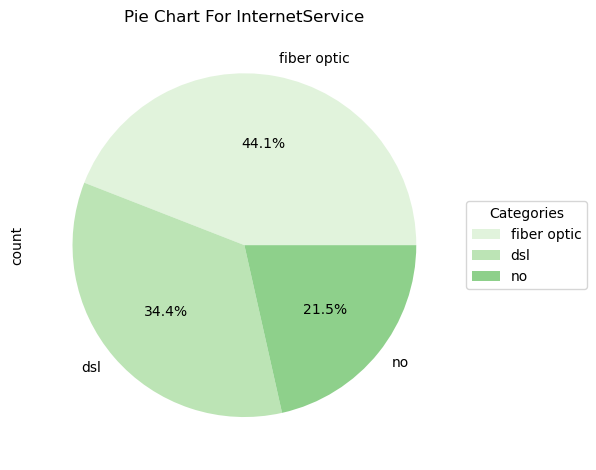

In [42]:
plot_pie_chart(df,InternetService)

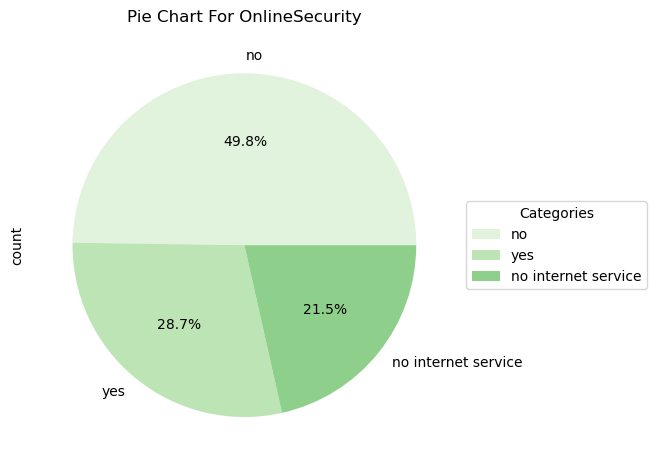

In [43]:
plot_pie_chart(df,OnlineSecurity)

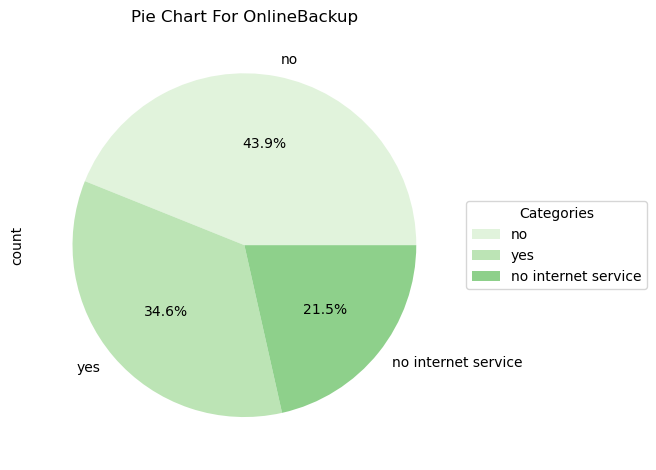

In [44]:
plot_pie_chart(df,OnlineBackup)

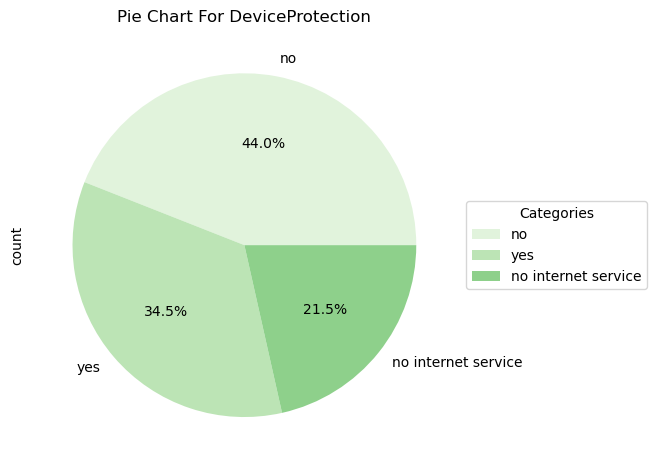

In [45]:
plot_pie_chart(df,DeviceProtection)

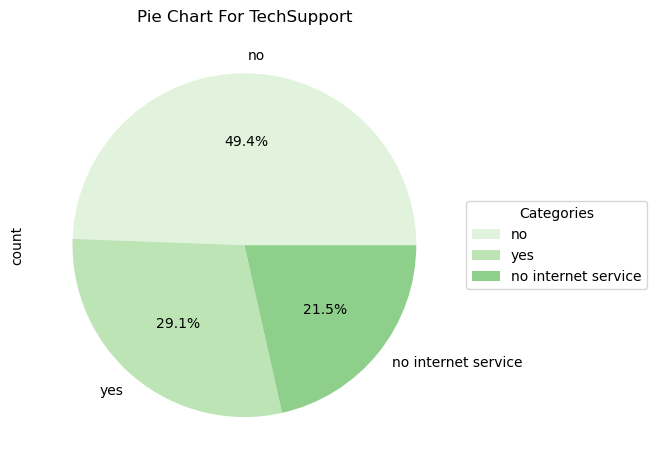

In [46]:
plot_pie_chart(df,TechSupport)

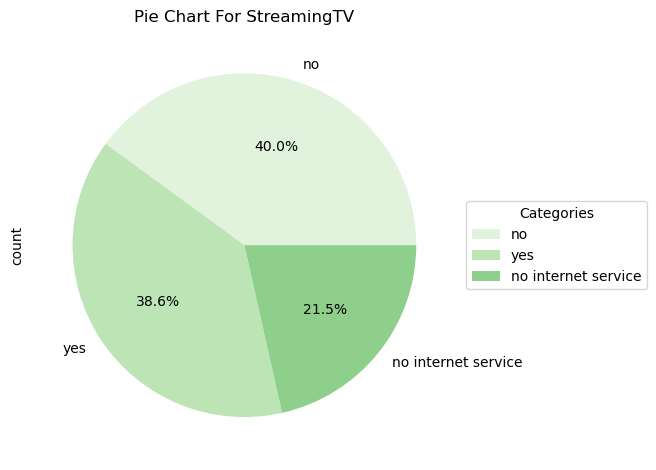

In [47]:
plot_pie_chart(df,StreamingTV)

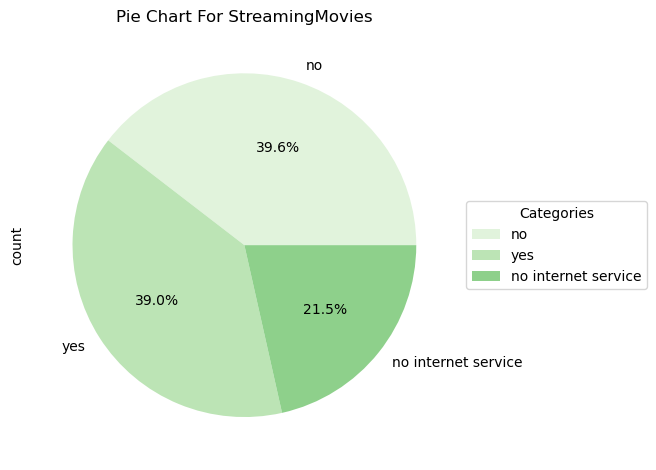

In [48]:
plot_pie_chart(df,StreamingMovies)

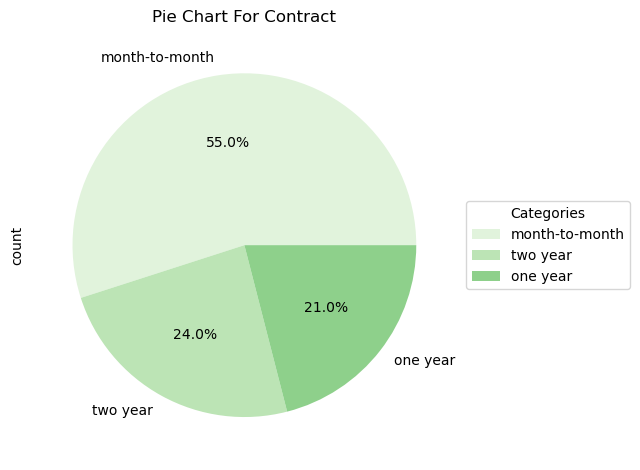

In [49]:
plot_pie_chart(df,Contract)

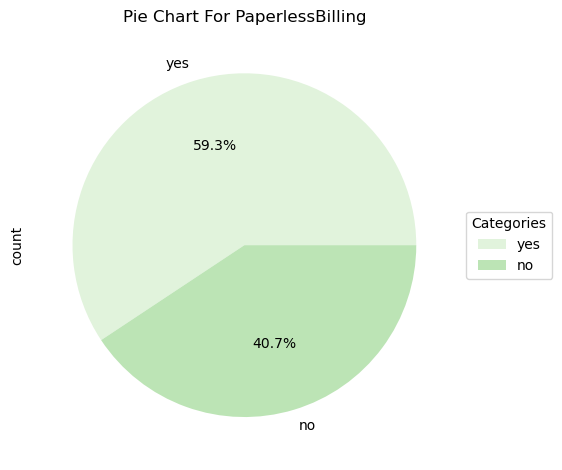

In [50]:
plot_pie_chart(df,PaperlessBilling)

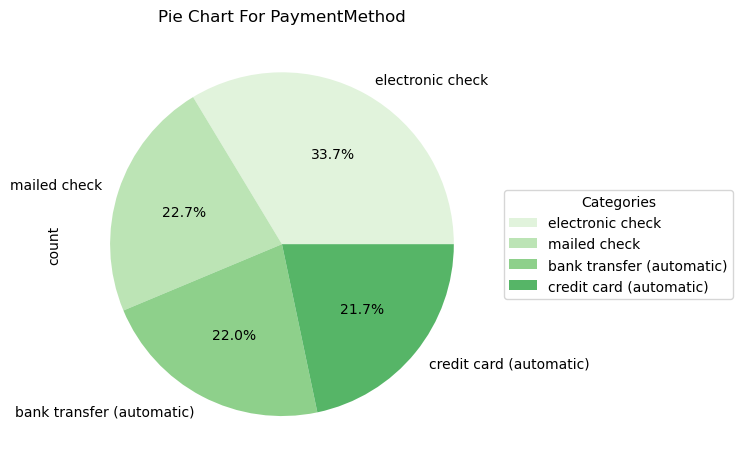

In [51]:
plot_pie_chart(df,PaymentMethod)

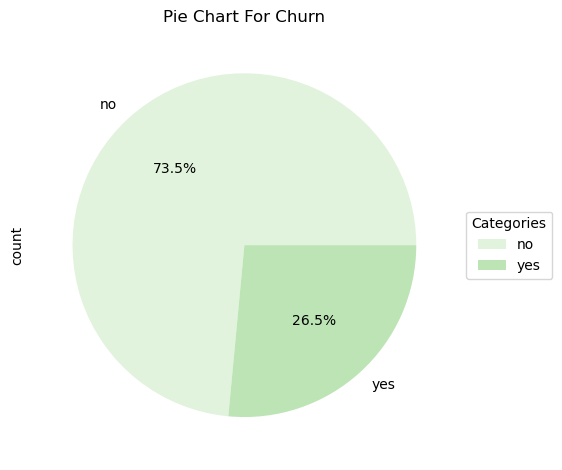

In [52]:
plot_pie_chart(df,Churn)

## Bivartaite Analysis 

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot ,violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps

## Categorical vs Numerical

In [53]:
def cat_num(df, numerical_cols, categorical_cols):
    for num in numerical_cols:
        plt.figure(figsize=(17,15))

        top10_categories = df[categorical_cols].value_counts(ascending= False).index[:10]
        top10_df = df[df[categorical_cols].isin(top10_categories)]
        
        #barplot
        plt.subplot(3,2,1)
        sns.barplot(data = top10_df , x = num , y = categorical_cols, palette="Greens")
        plt.title(f'Bar Plot of {num} vs {categorical_cols}')
            
        #KDE Plot
        plt.subplot(3,2,2)
        sns.kdeplot(data = top10_df , x = num , hue = categorical_cols, palette="viridis", fill=True)
        plt.title(f'KDE Plot of {num} vs {categorical_cols}')
    
        #Scatter Plot
        plt.subplot(3,2,3)
        sns.scatterplot(data = top10_df , x = num , y = categorical_cols,palette="Blues")
        plt.title(f'Scatter Plot of {num} vs {categorical_cols}')
    
        
        plt.tight_layout()

In [54]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

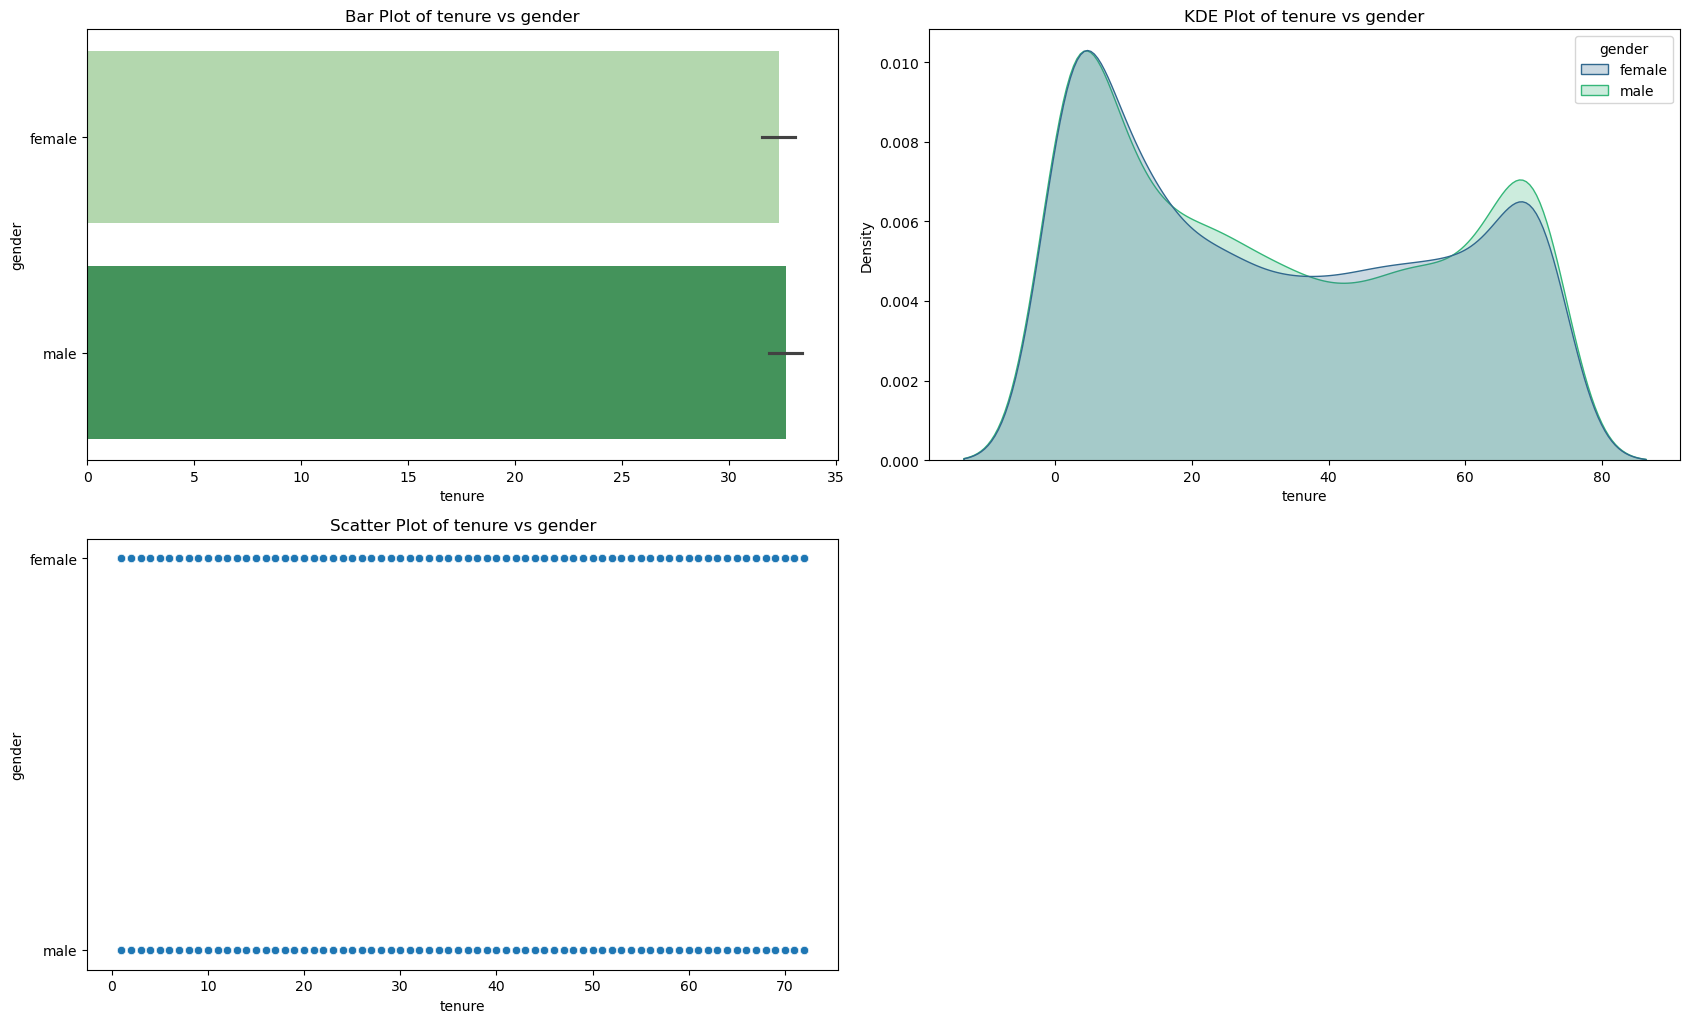

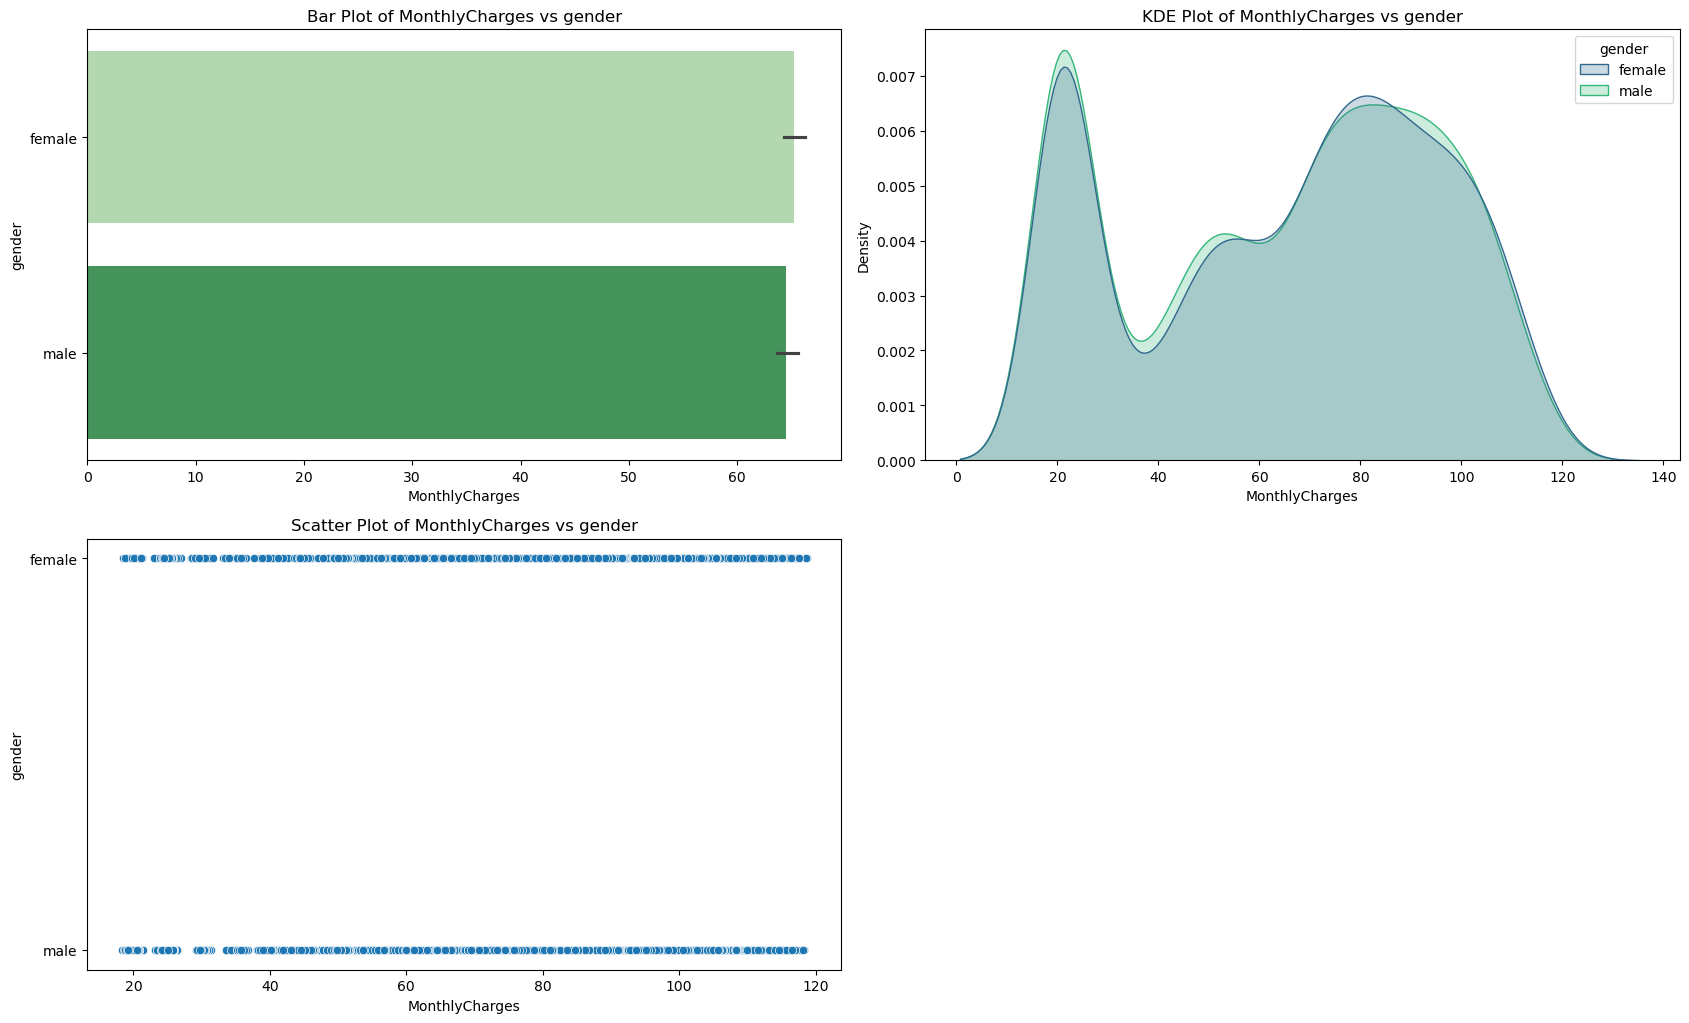

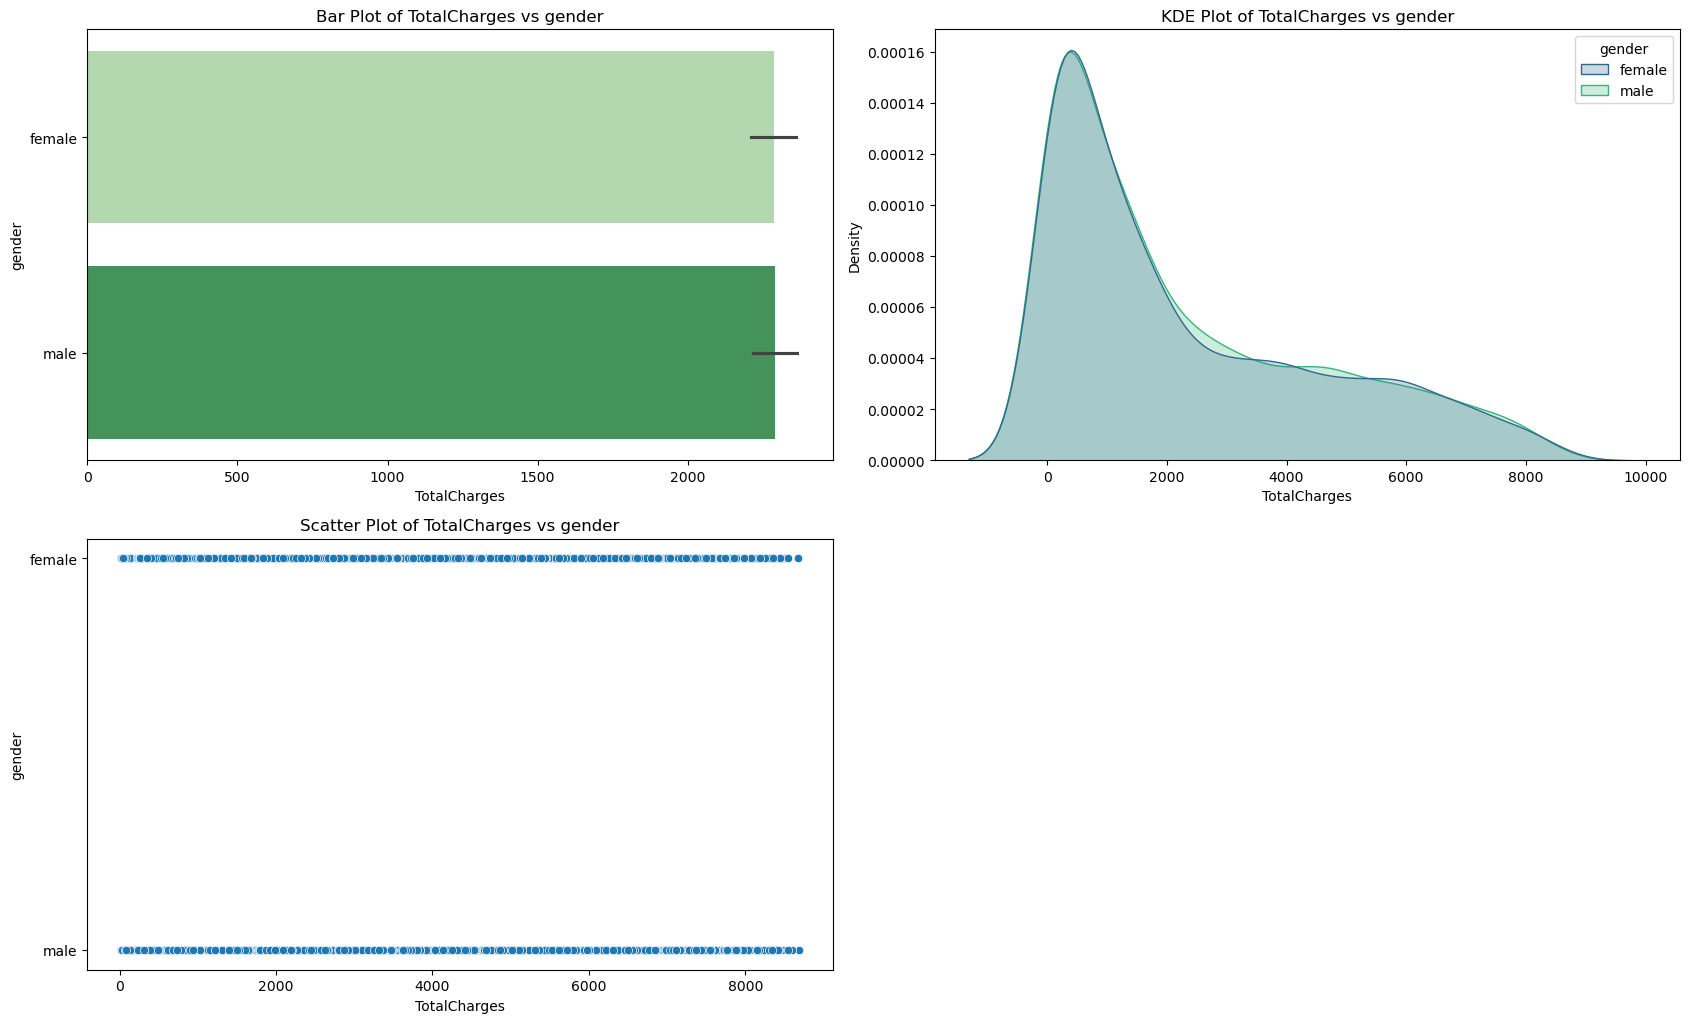

In [55]:
cat_num(df, num_cols, "gender")

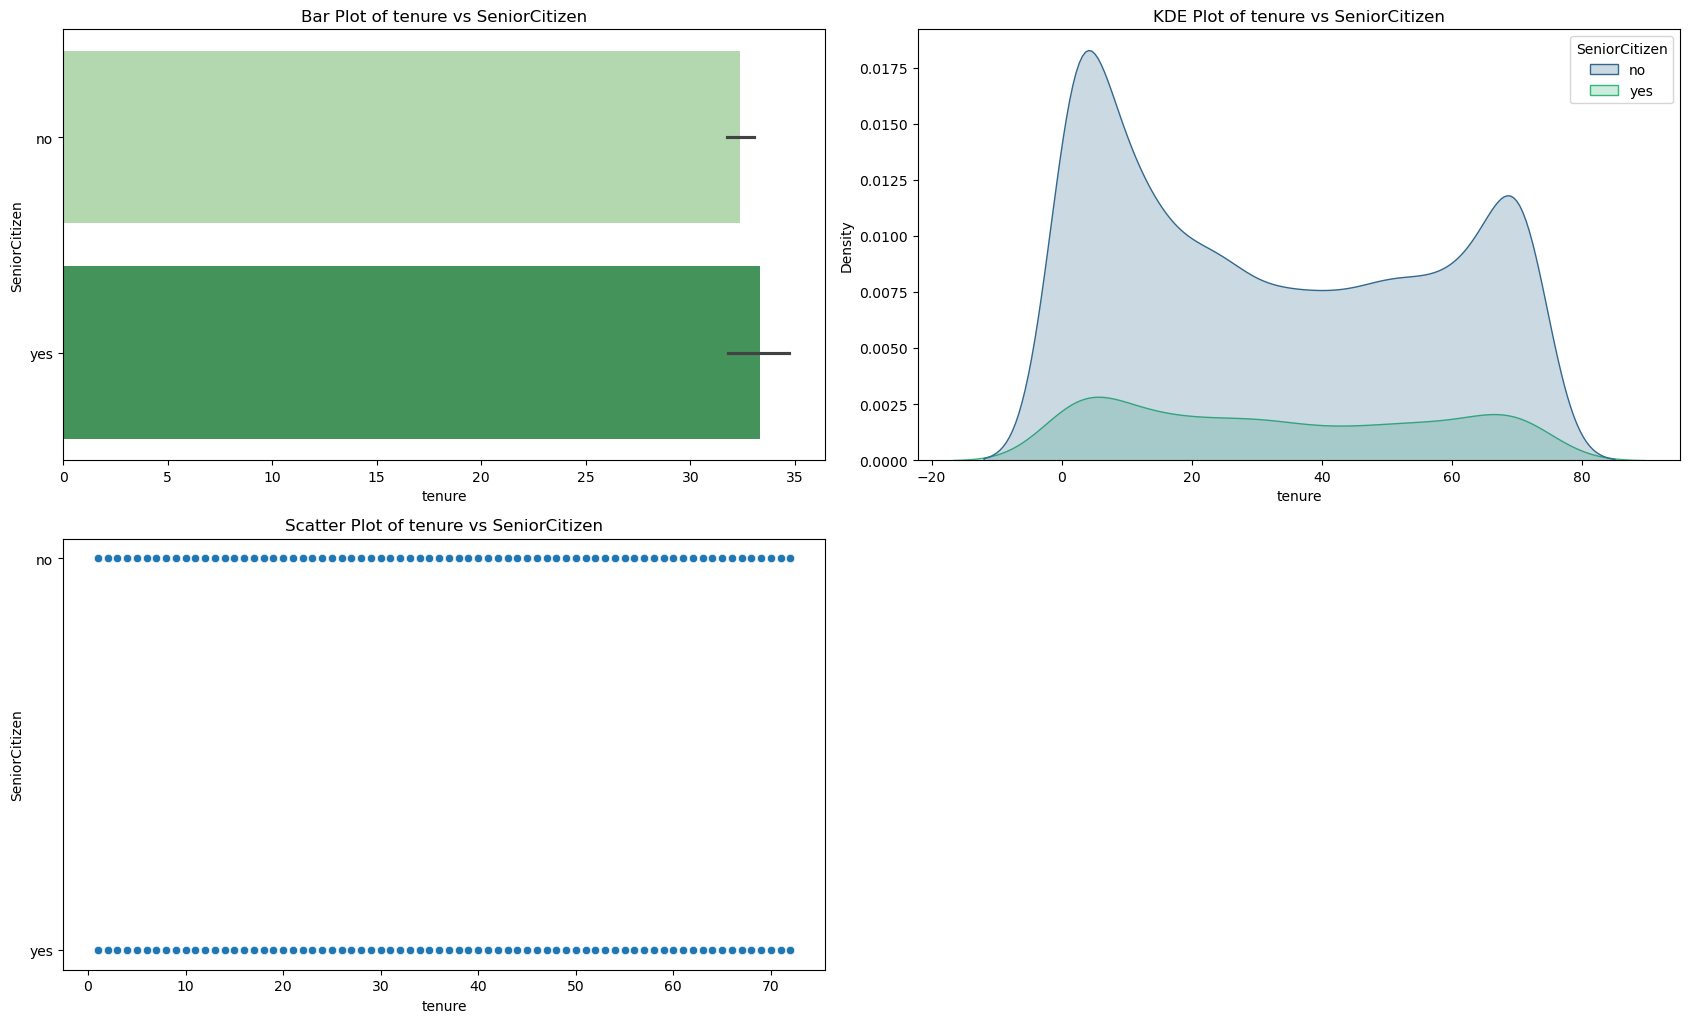

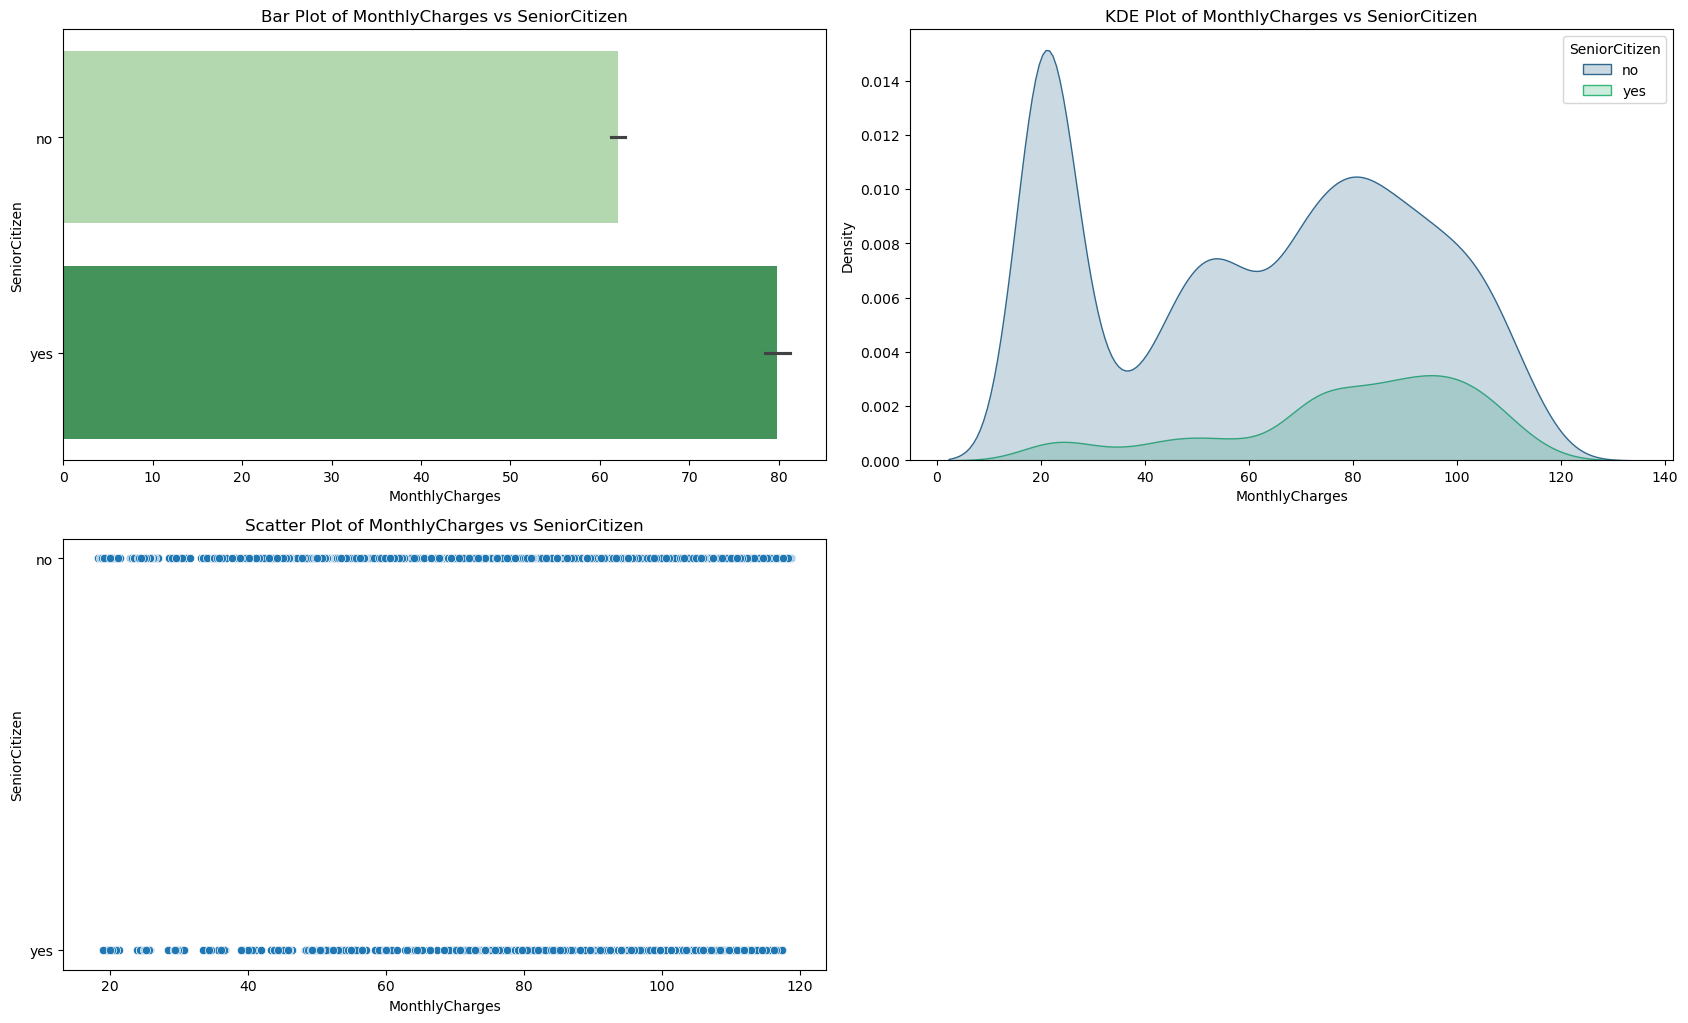

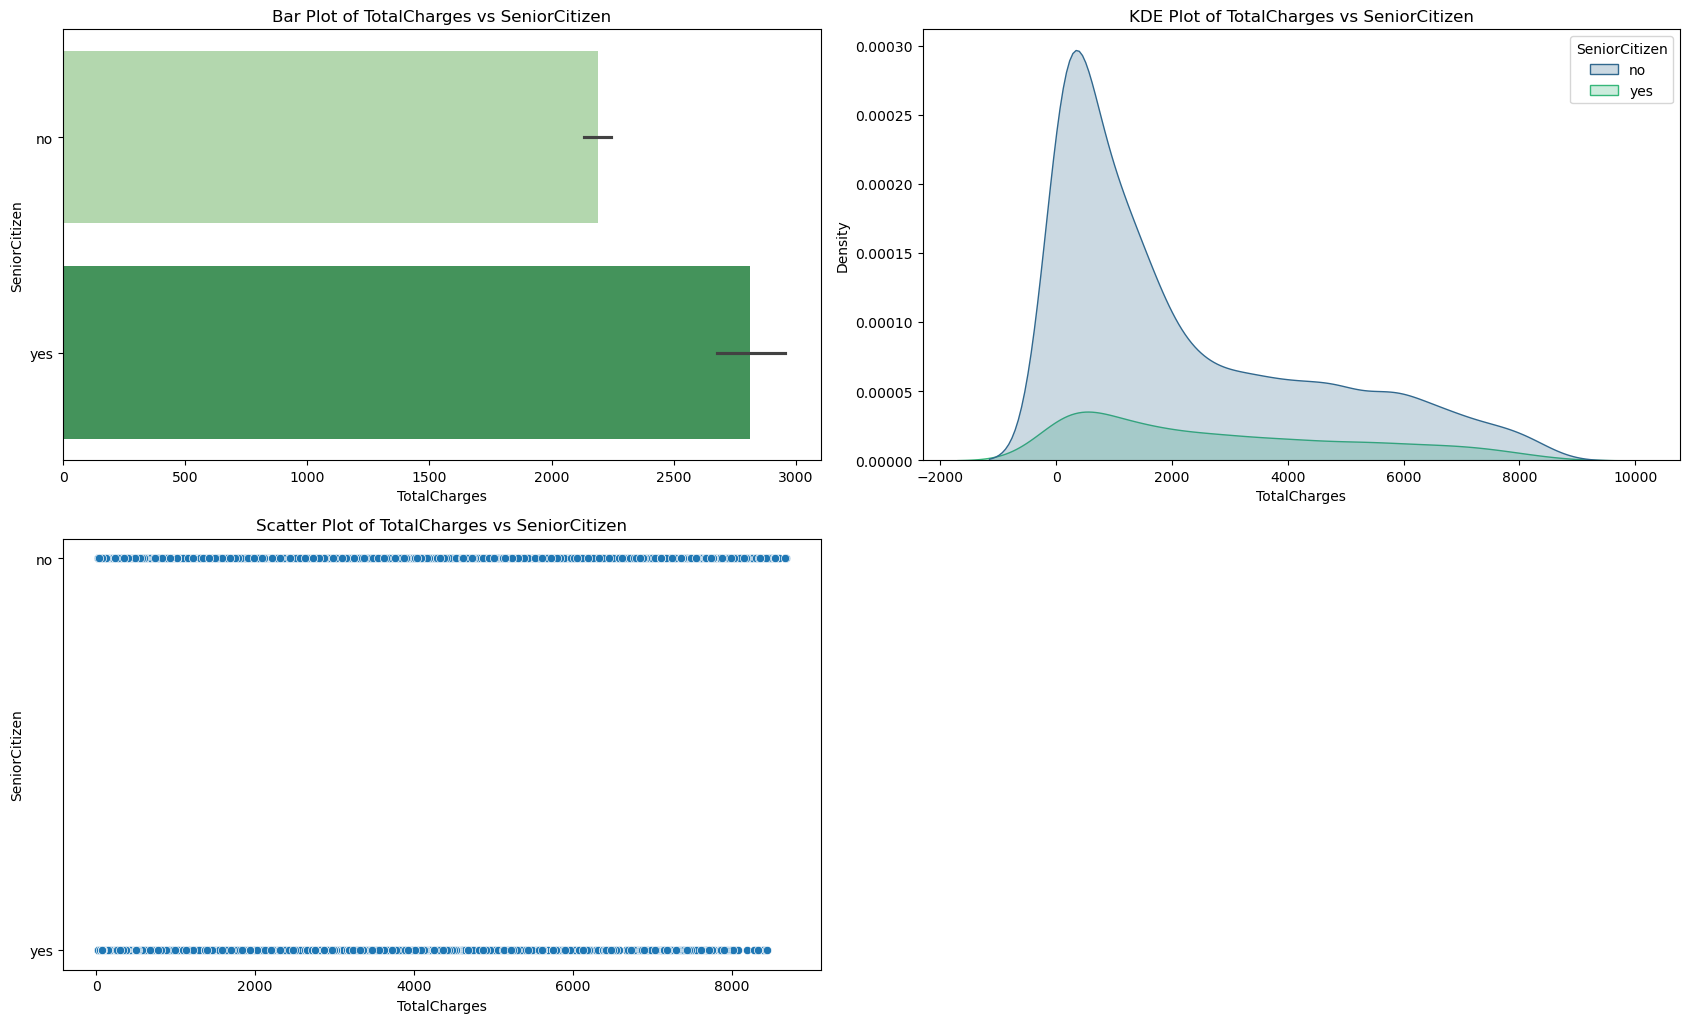

In [56]:
cat_num(df, num_cols, "SeniorCitizen")

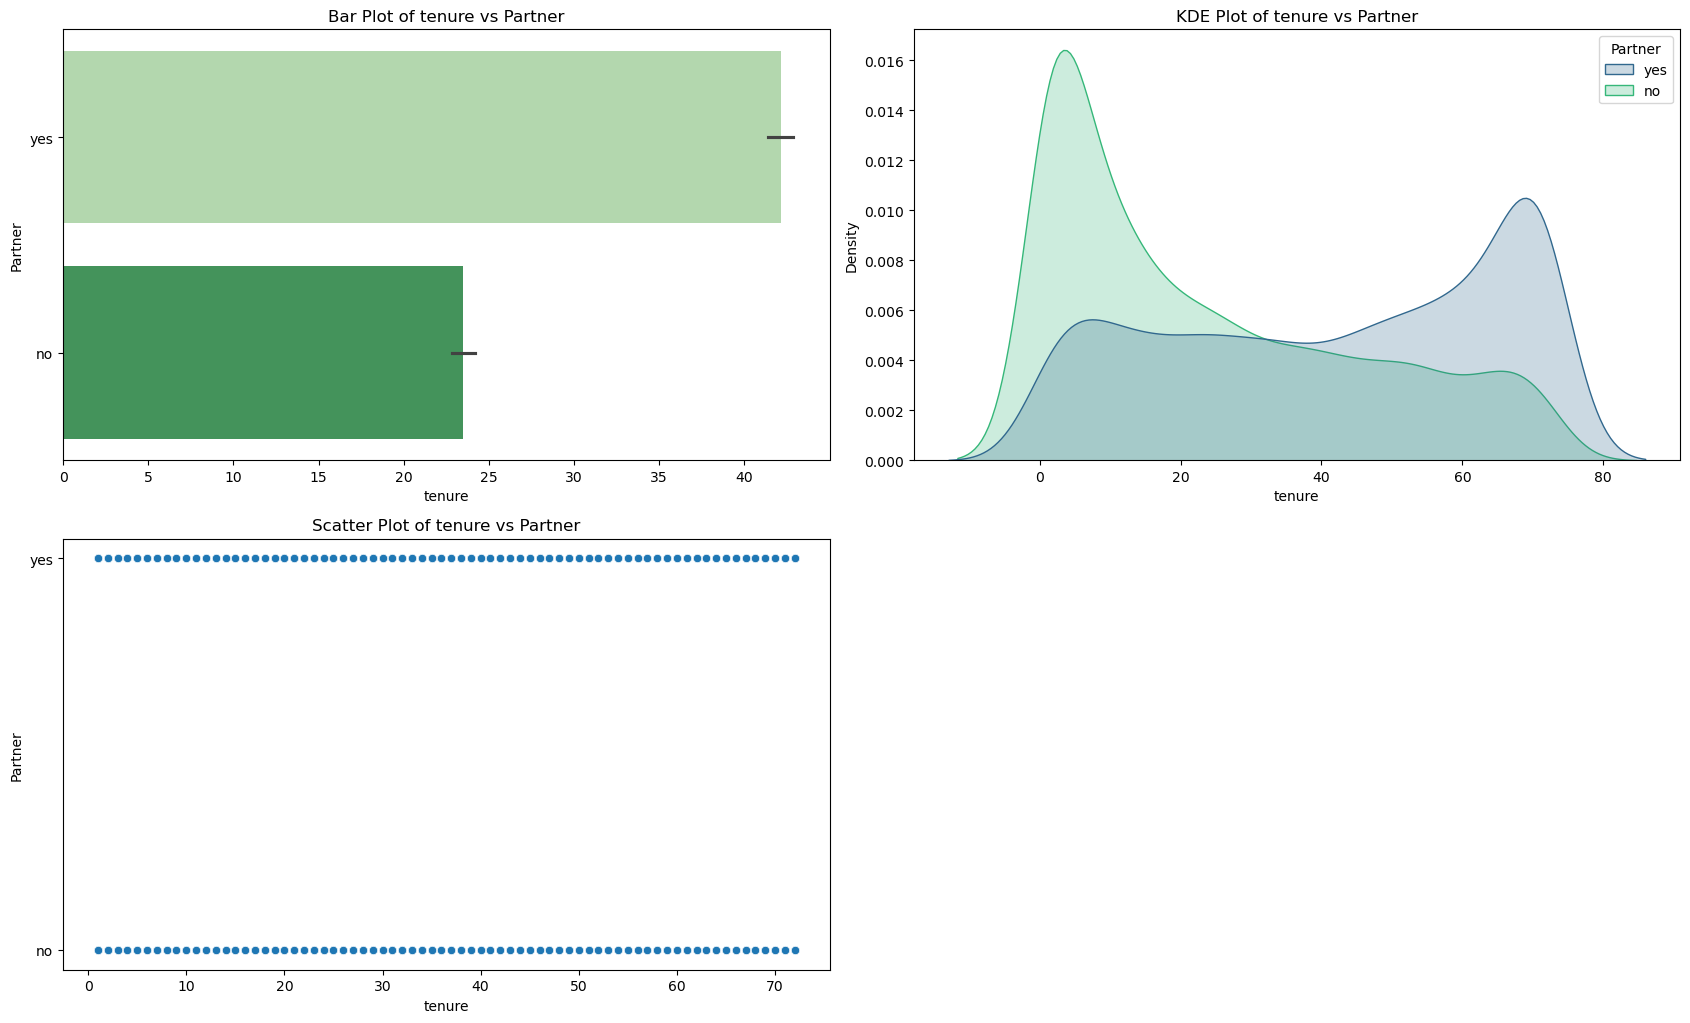

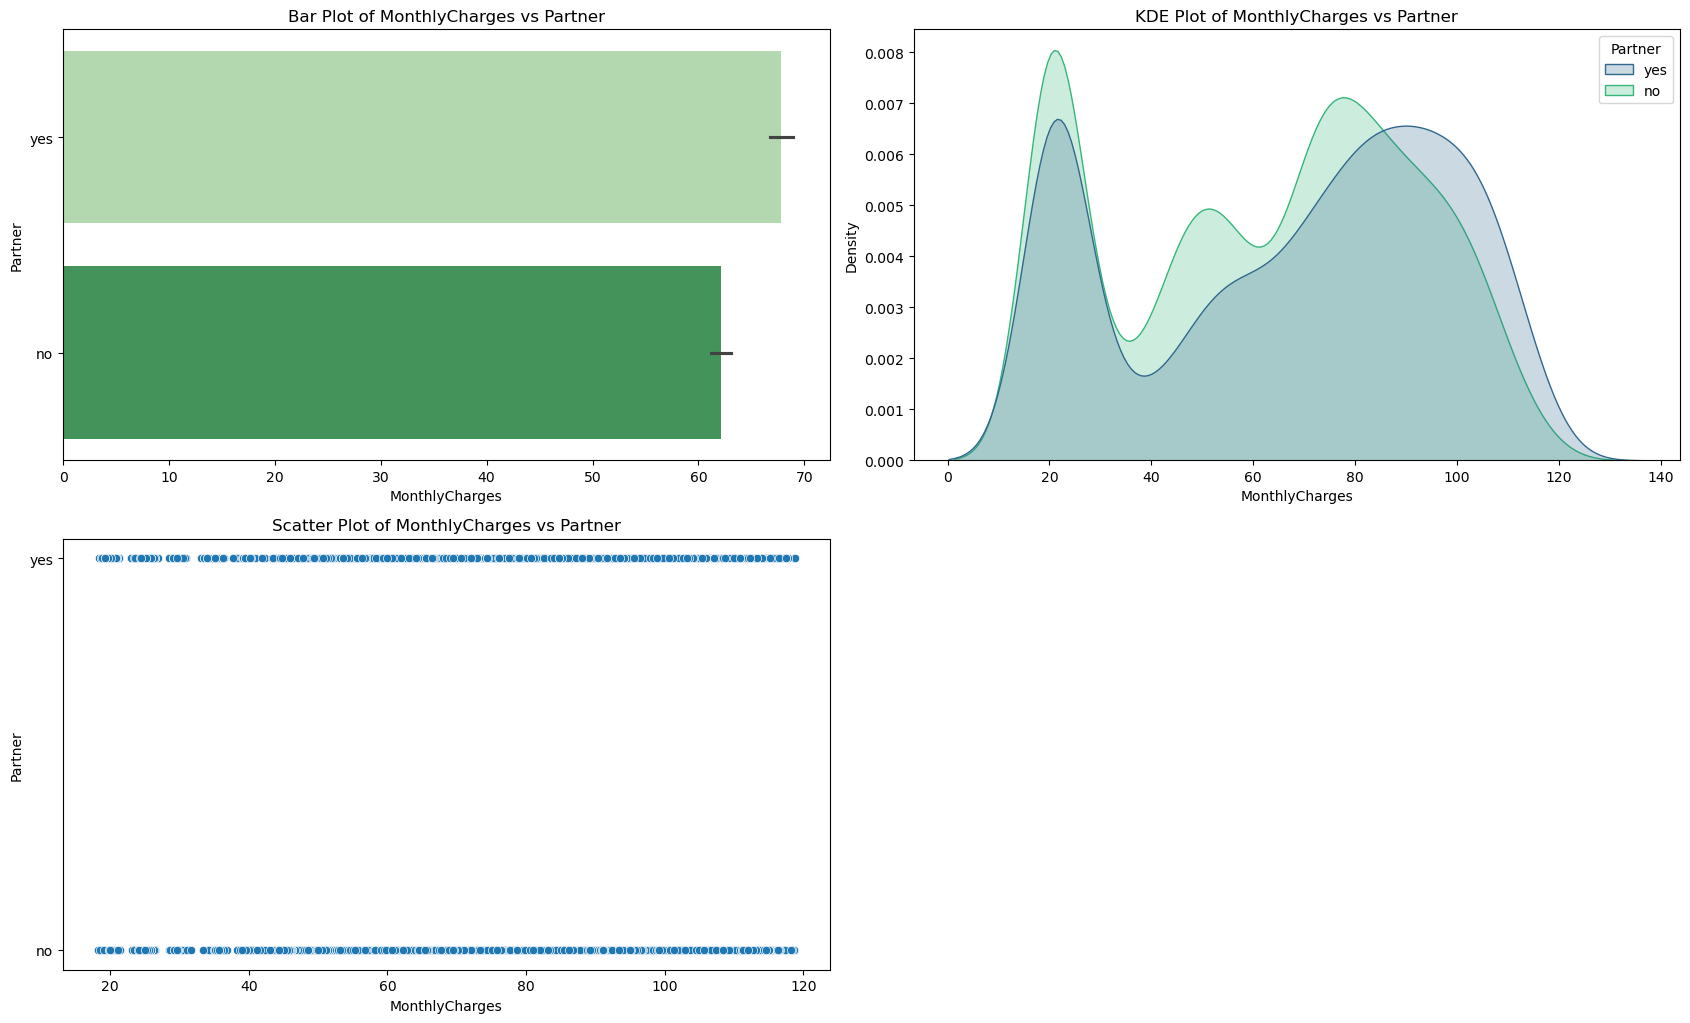

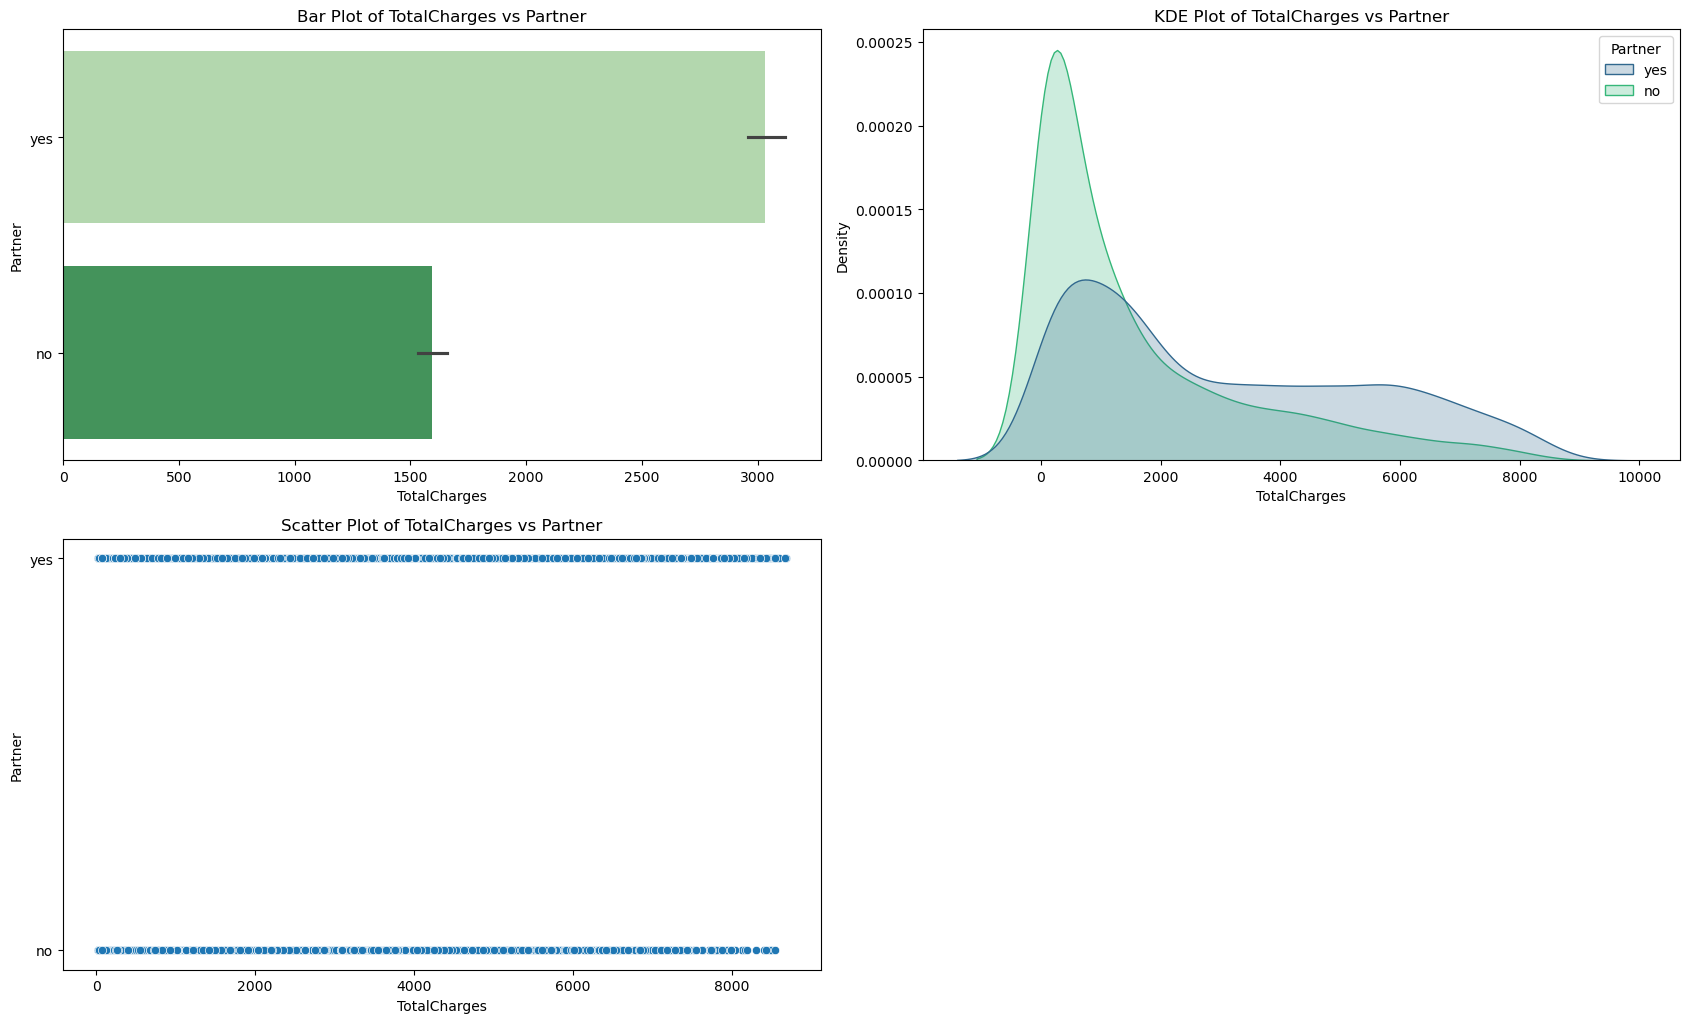

In [57]:
cat_num(df, num_cols, "Partner")

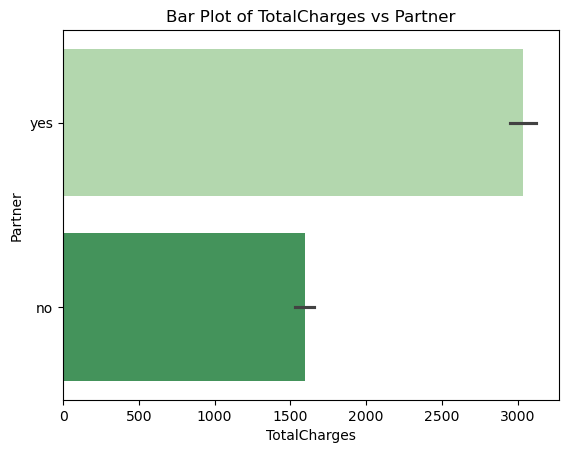

In [58]:
top10_categories = df["Partner"].value_counts(ascending= False).index[:10]
top10_df = df[df["Partner"].isin(top10_categories)]

sns.barplot(data = top10_df , x = "TotalCharges" , y = "Partner", palette="Greens")
plt.title('Bar Plot of TotalCharges vs Partner')
plt.show()

## Observation: 
- In above graph we can notice that most of the customers with partners have more expenses than the others which don't have partners

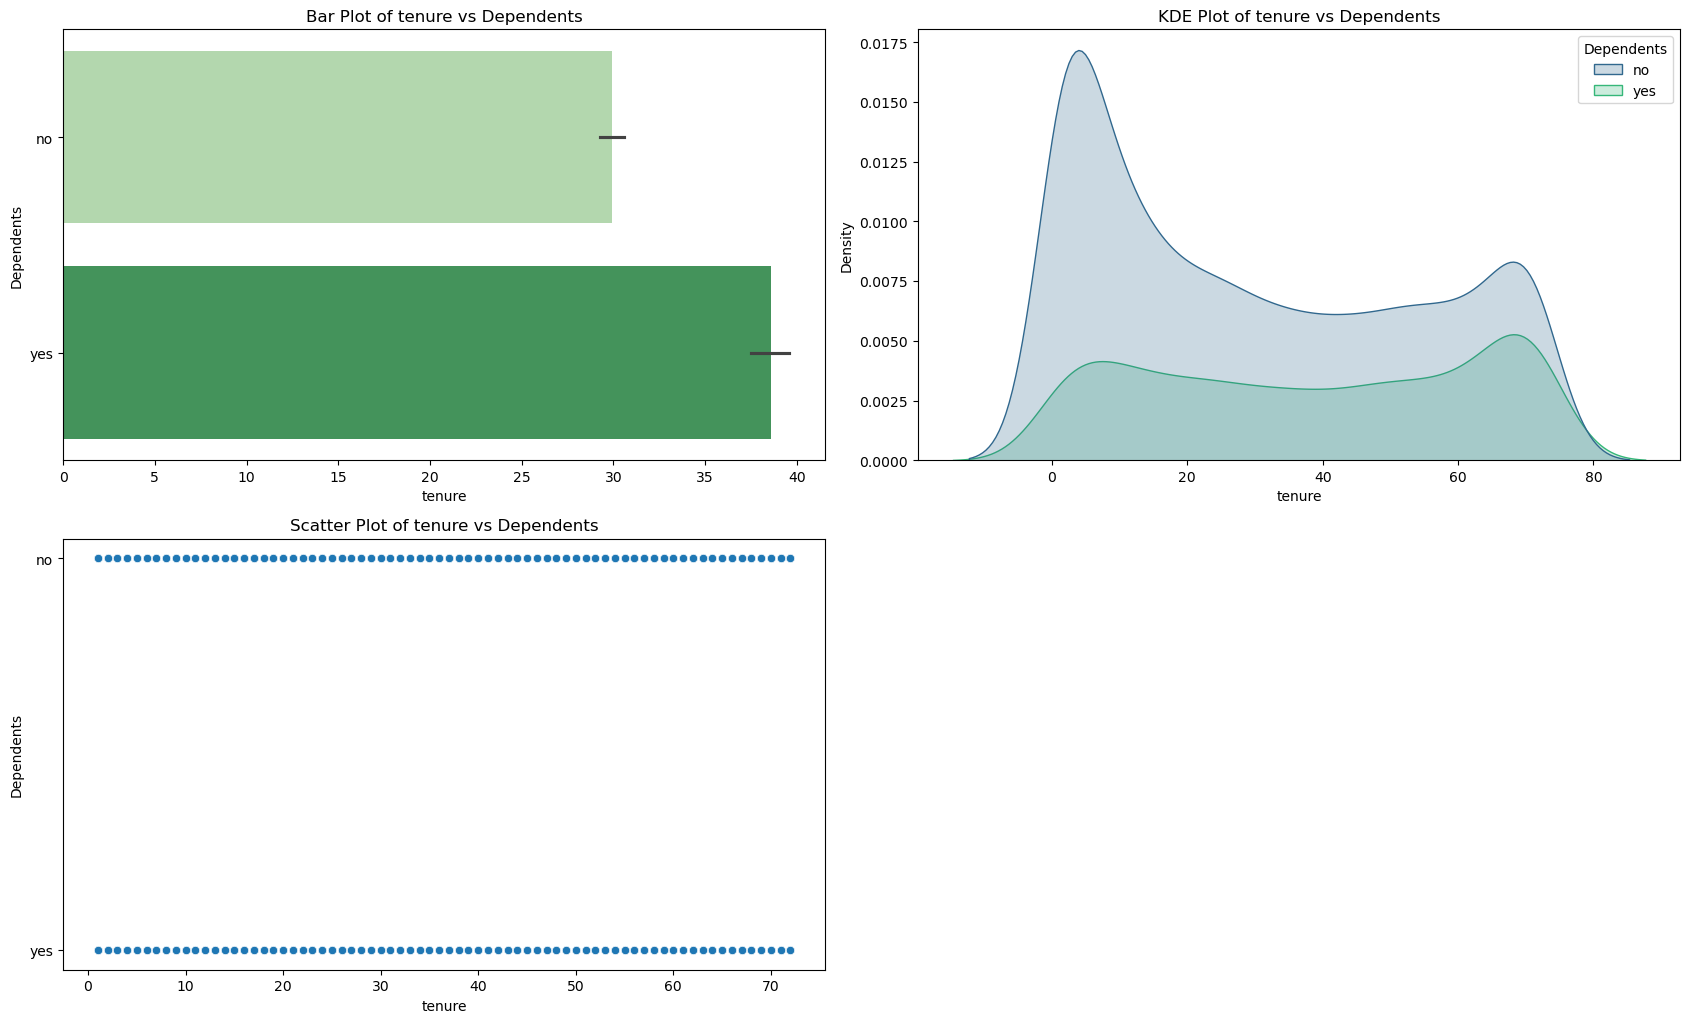

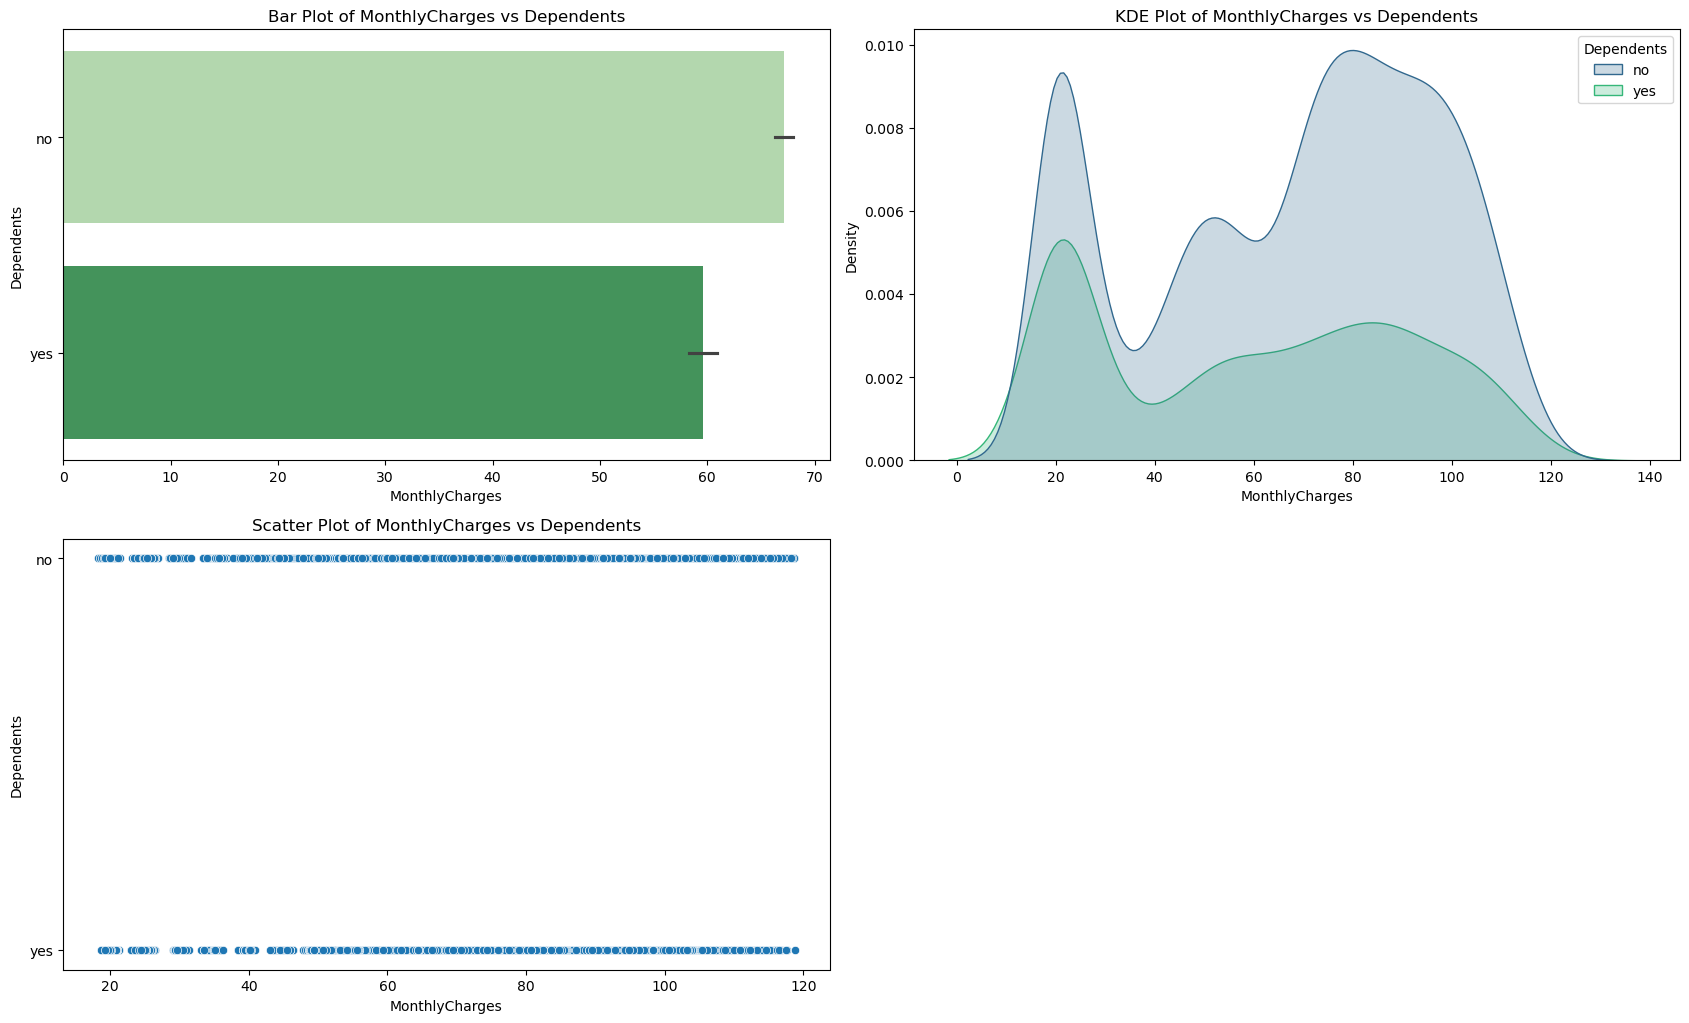

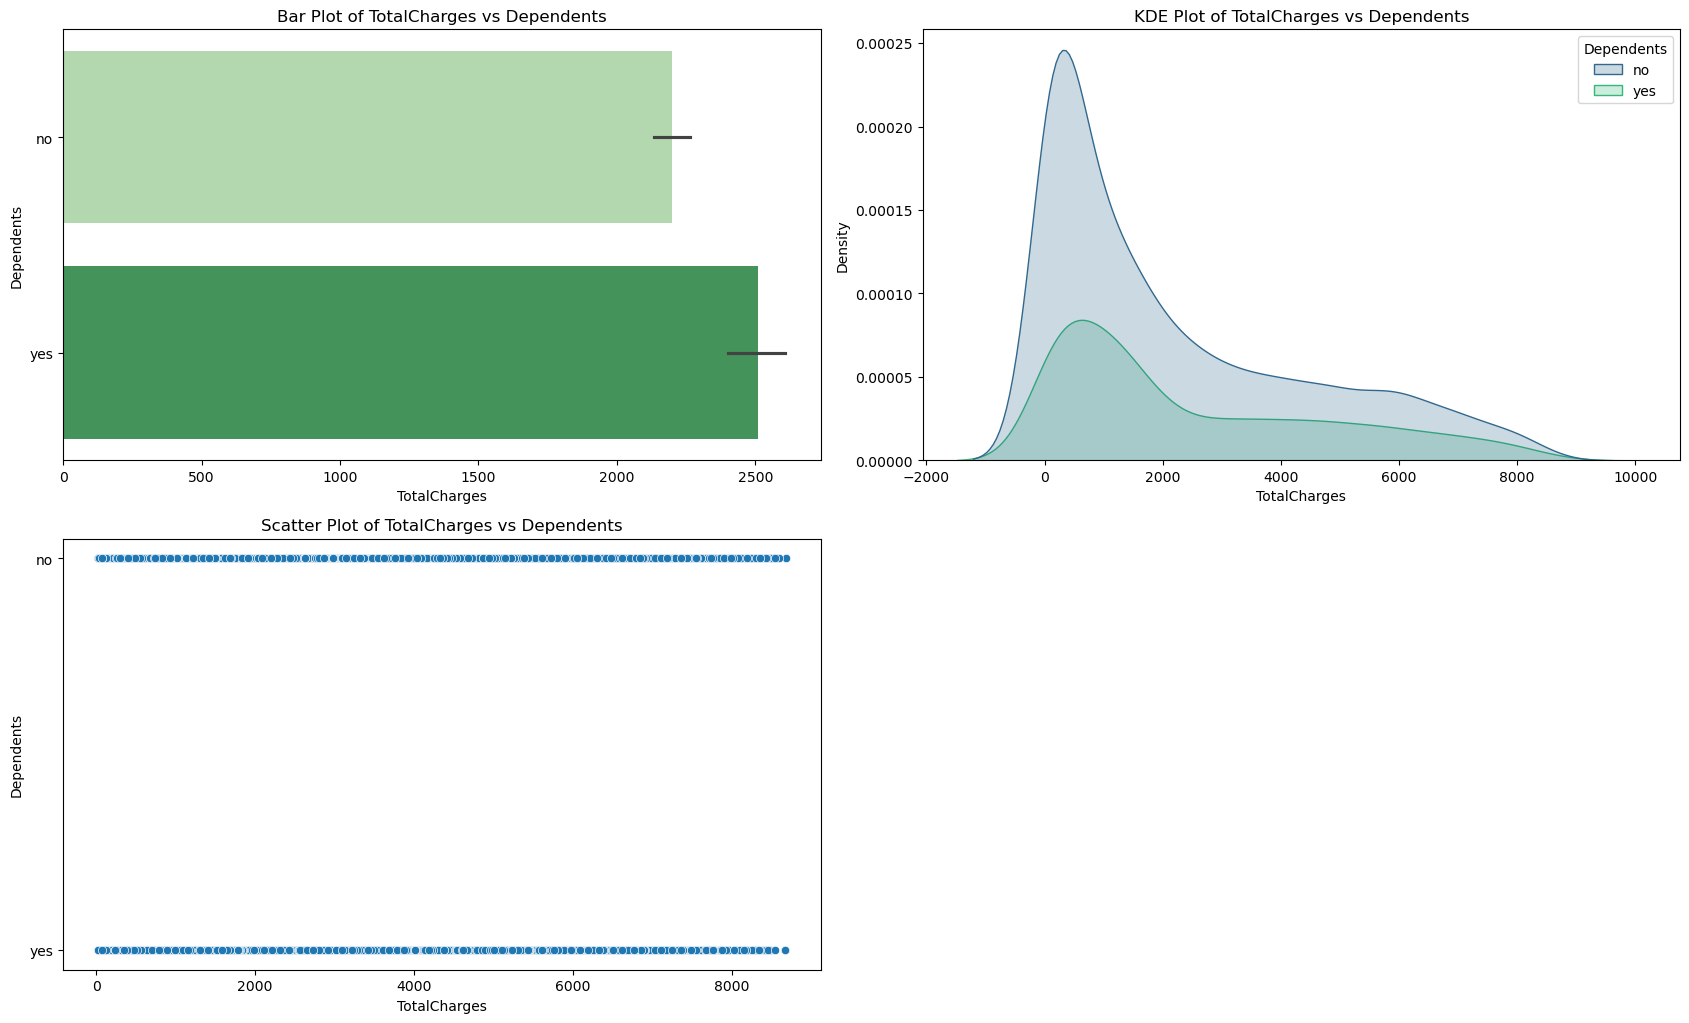

In [59]:
cat_num(df, num_cols, "Dependents")

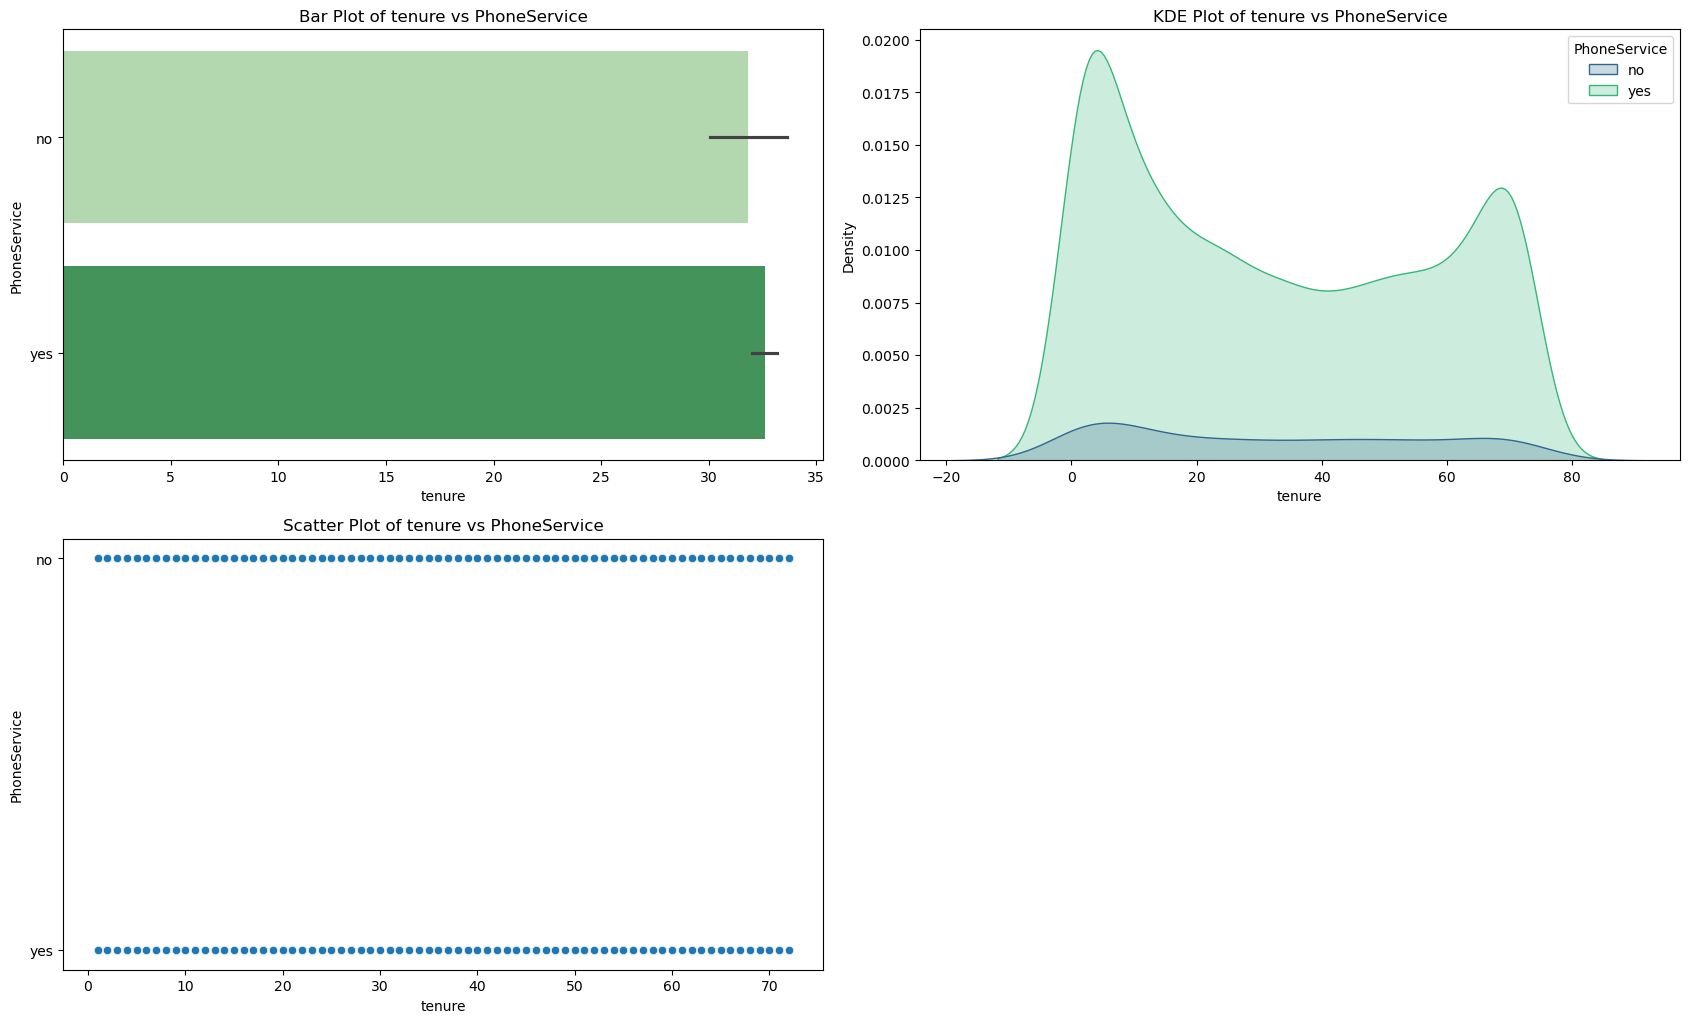

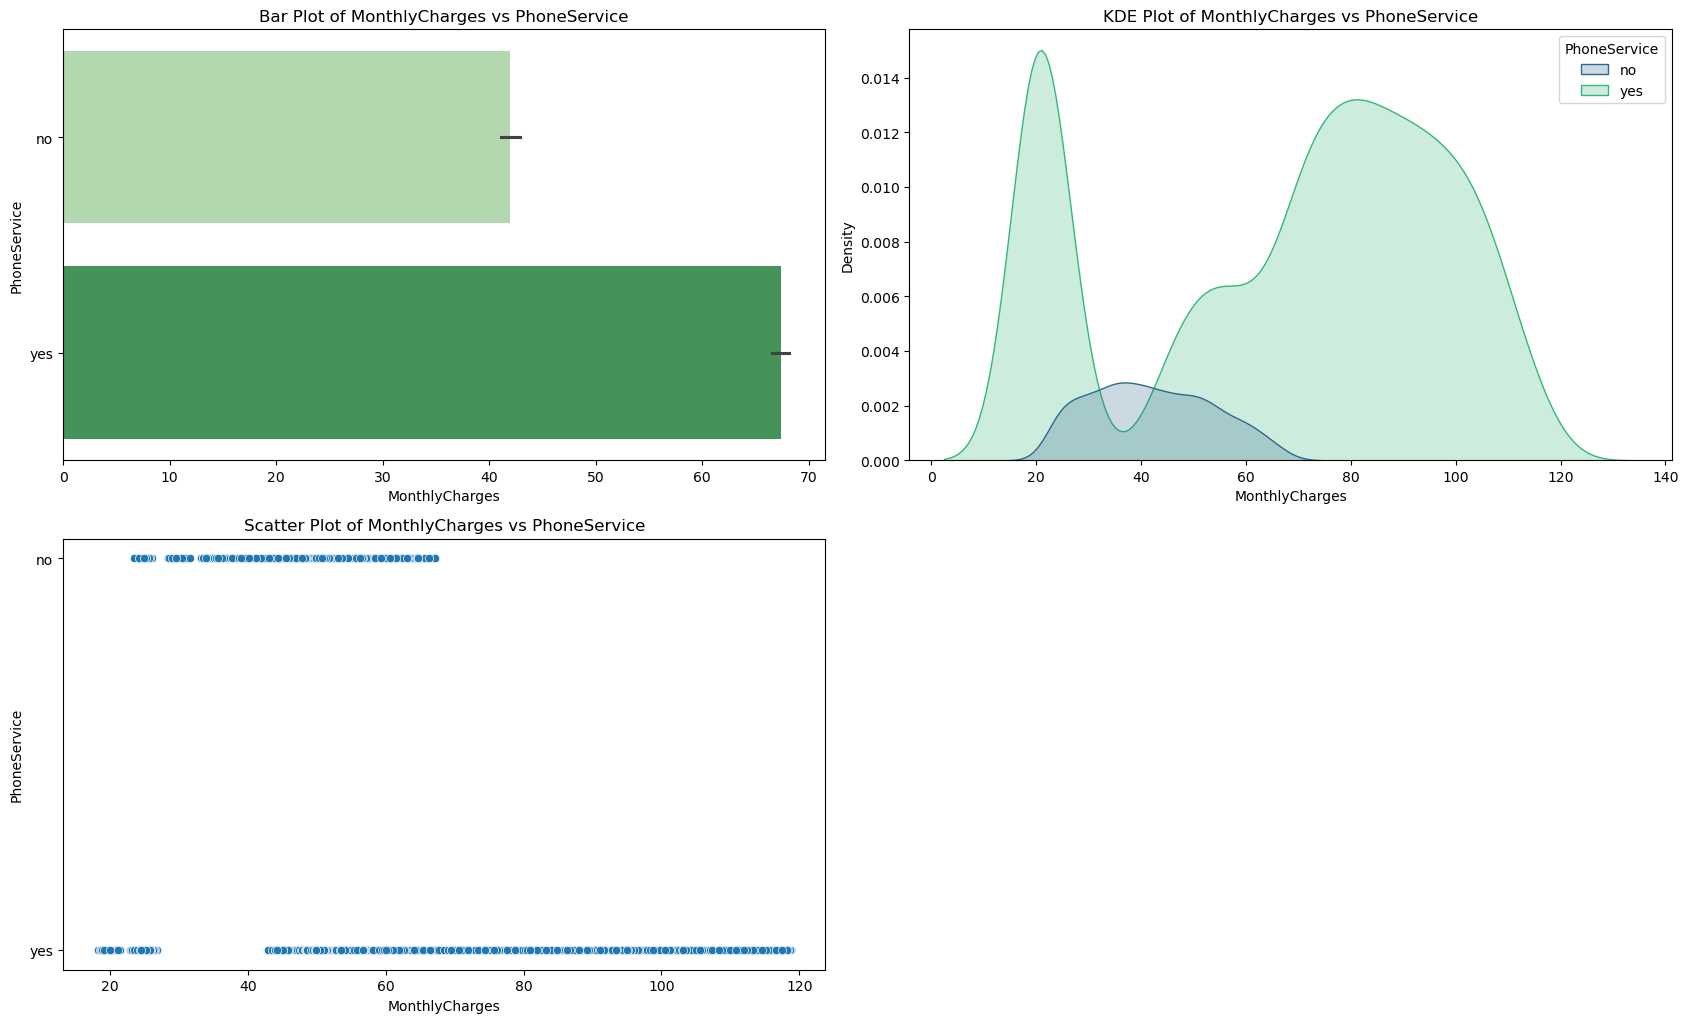

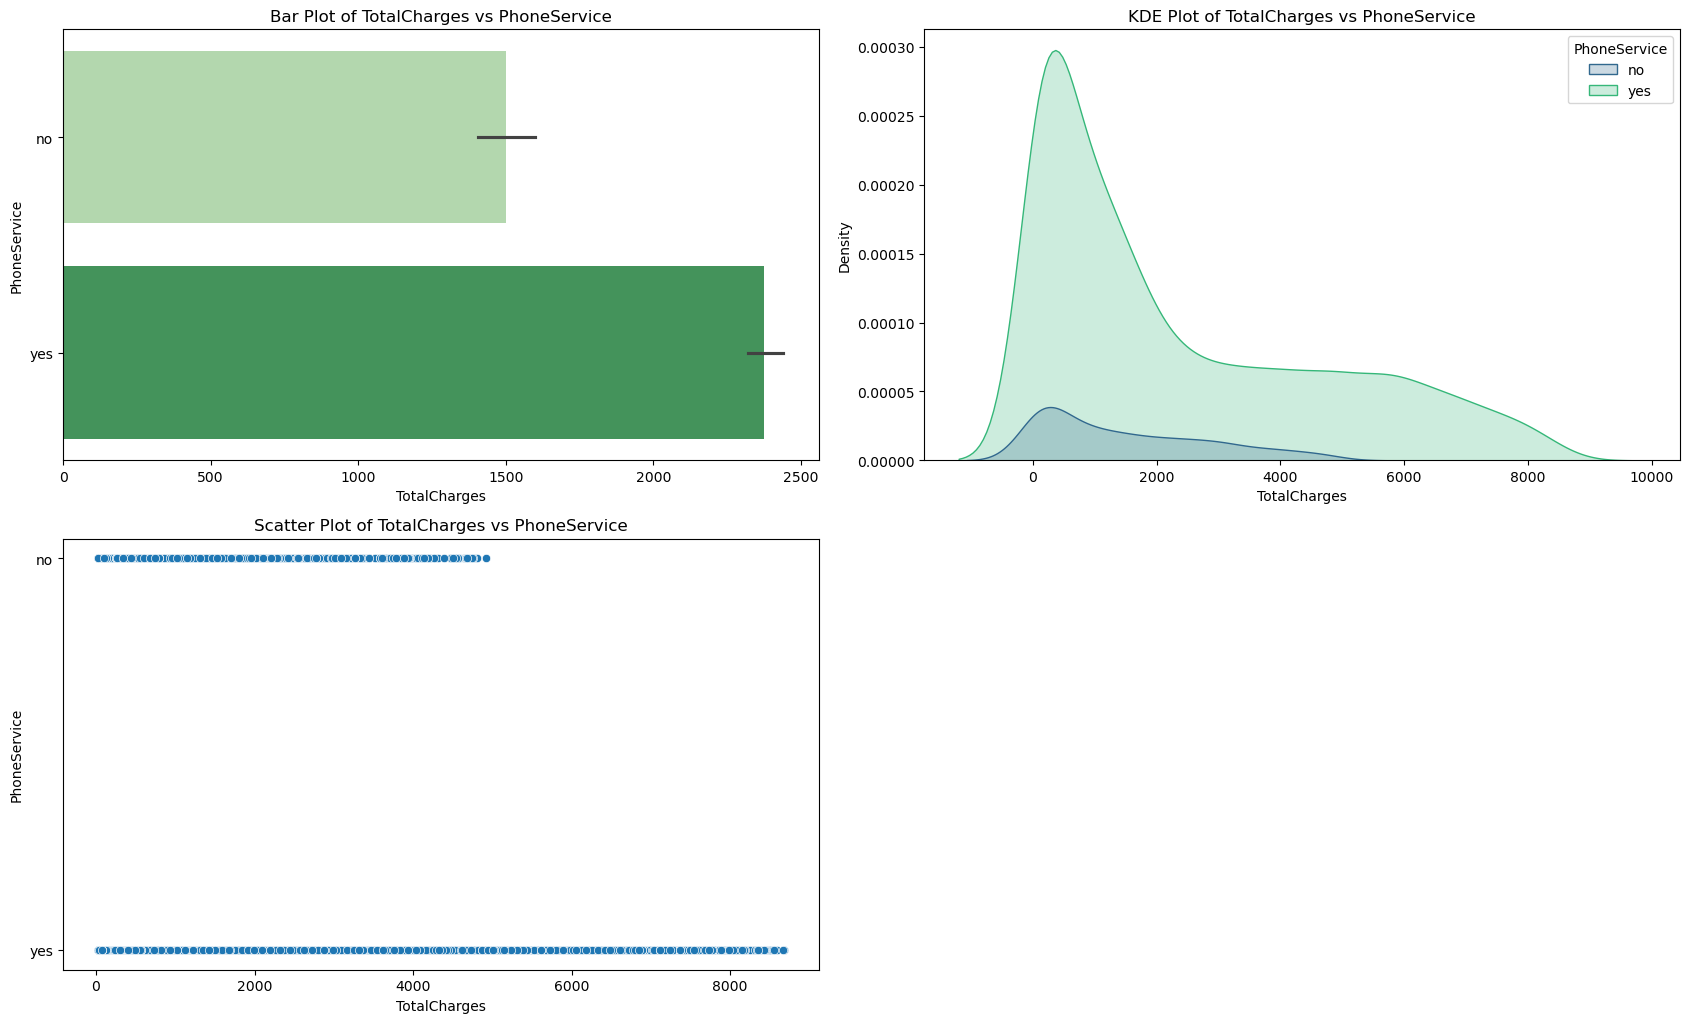

In [60]:
cat_num(df, num_cols, "PhoneService")

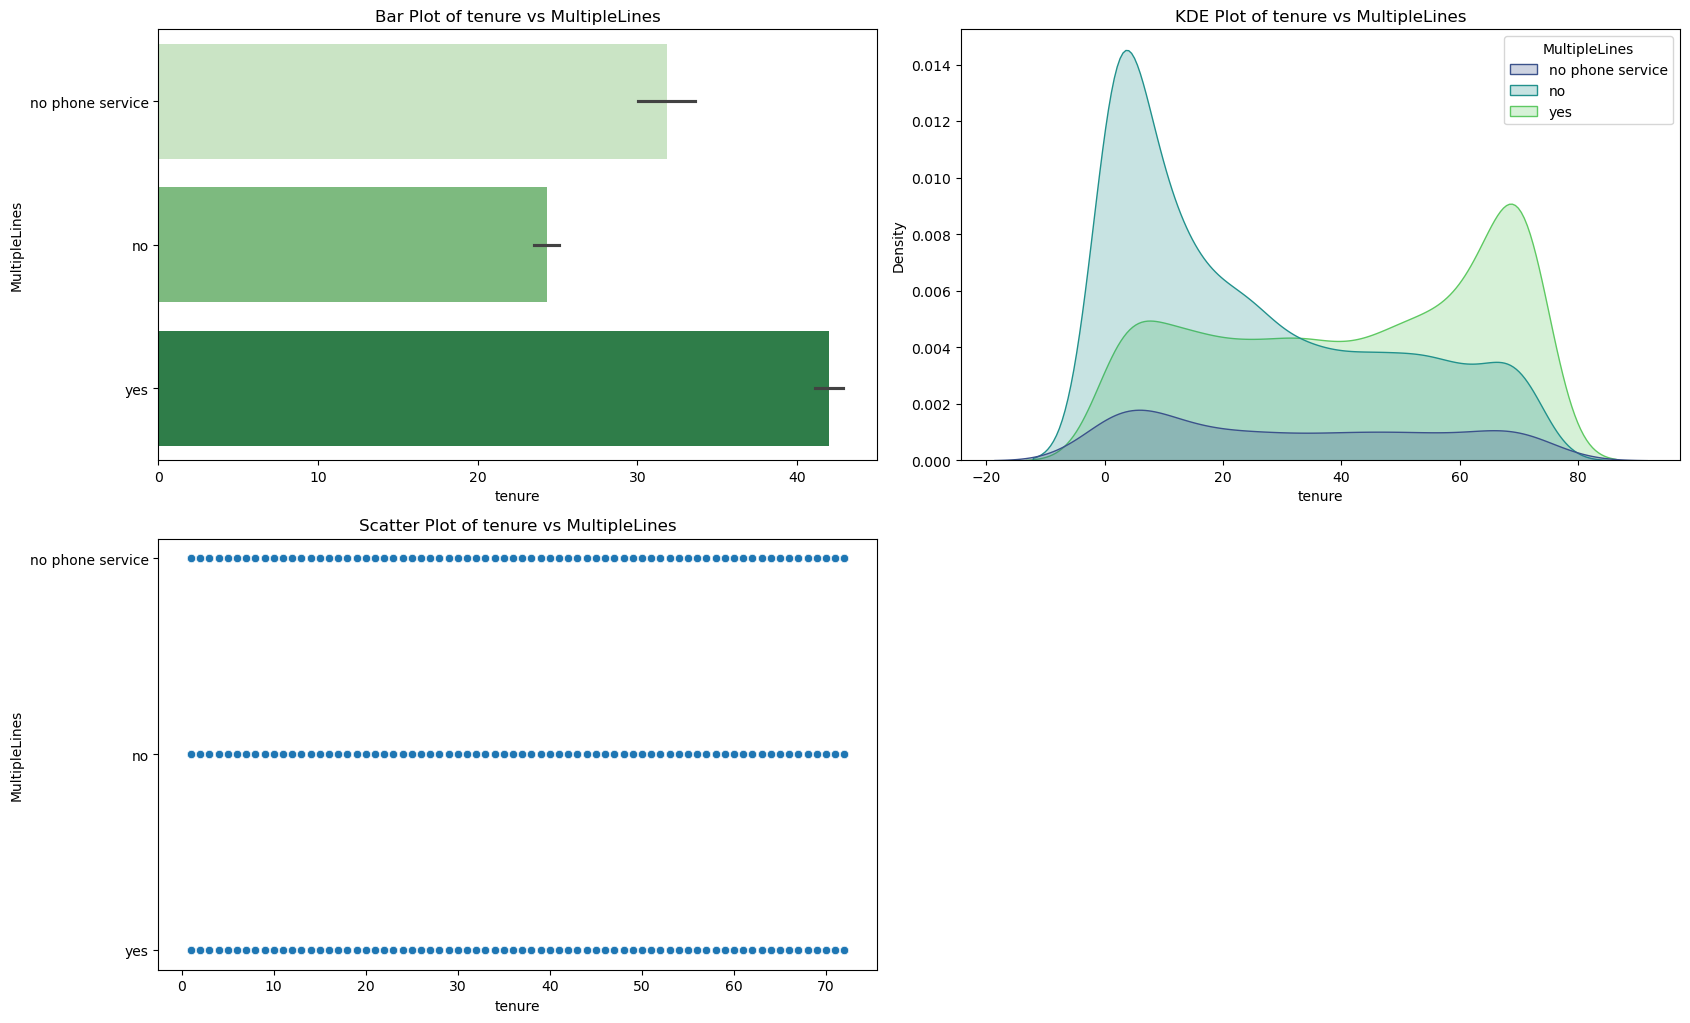

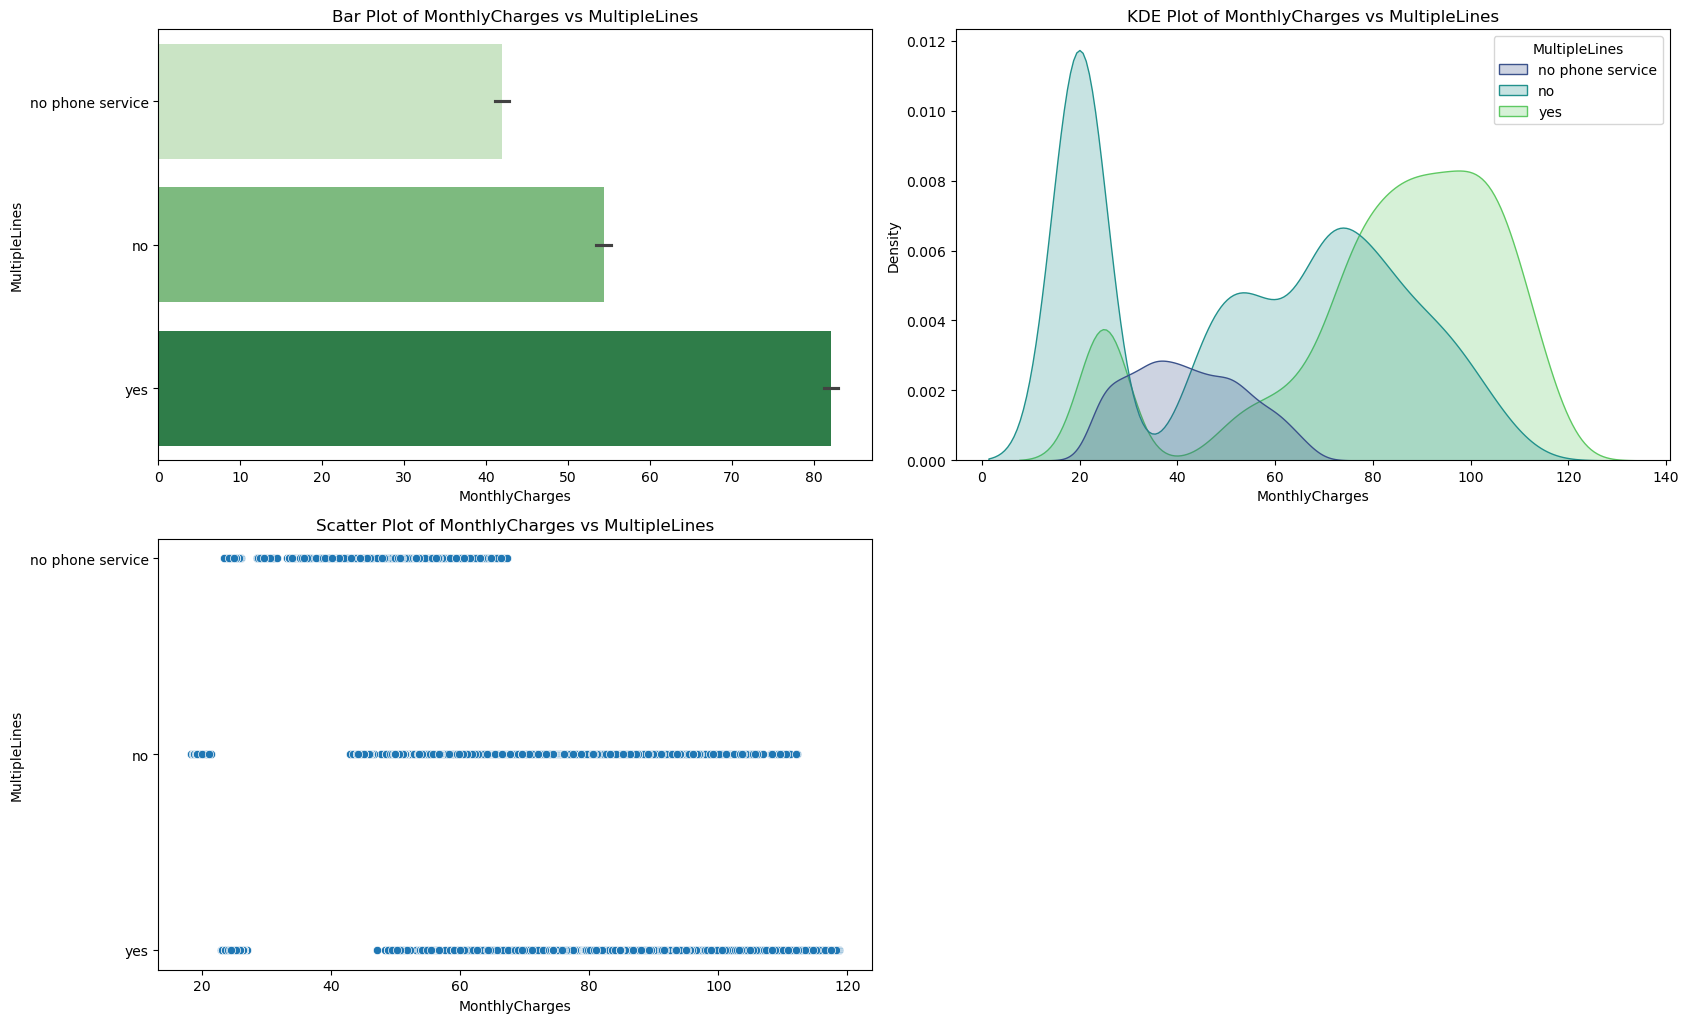

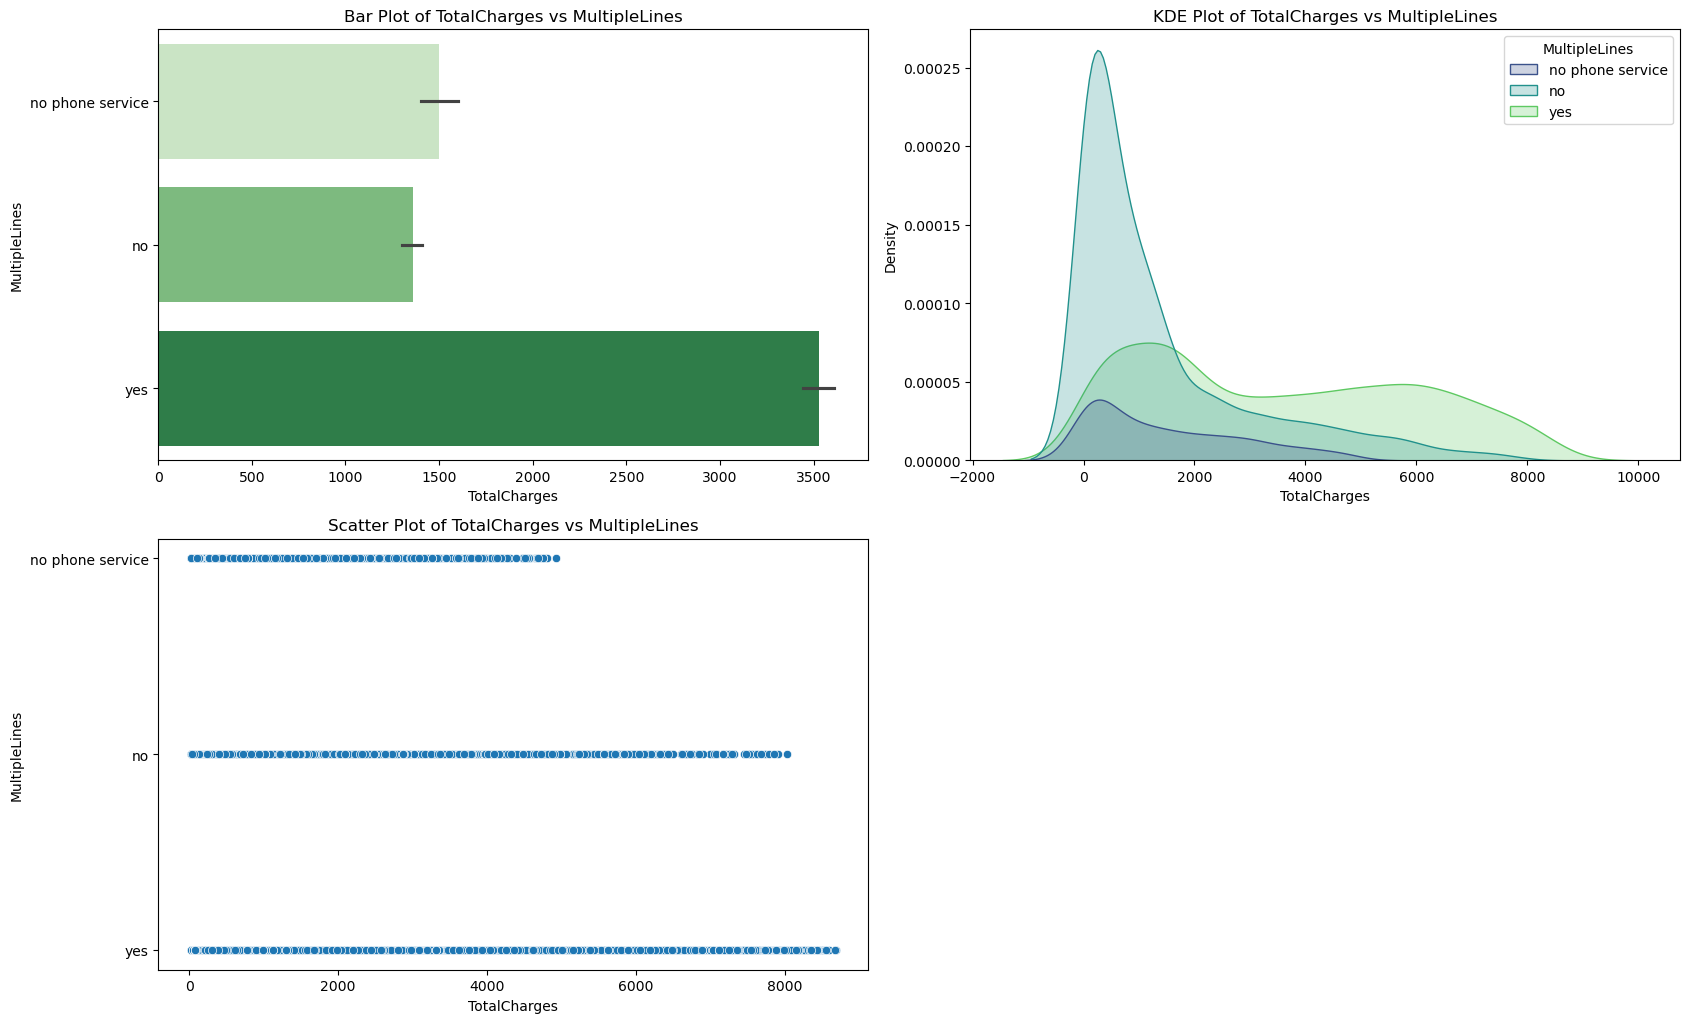

In [61]:
cat_num(df, num_cols, "MultipleLines")

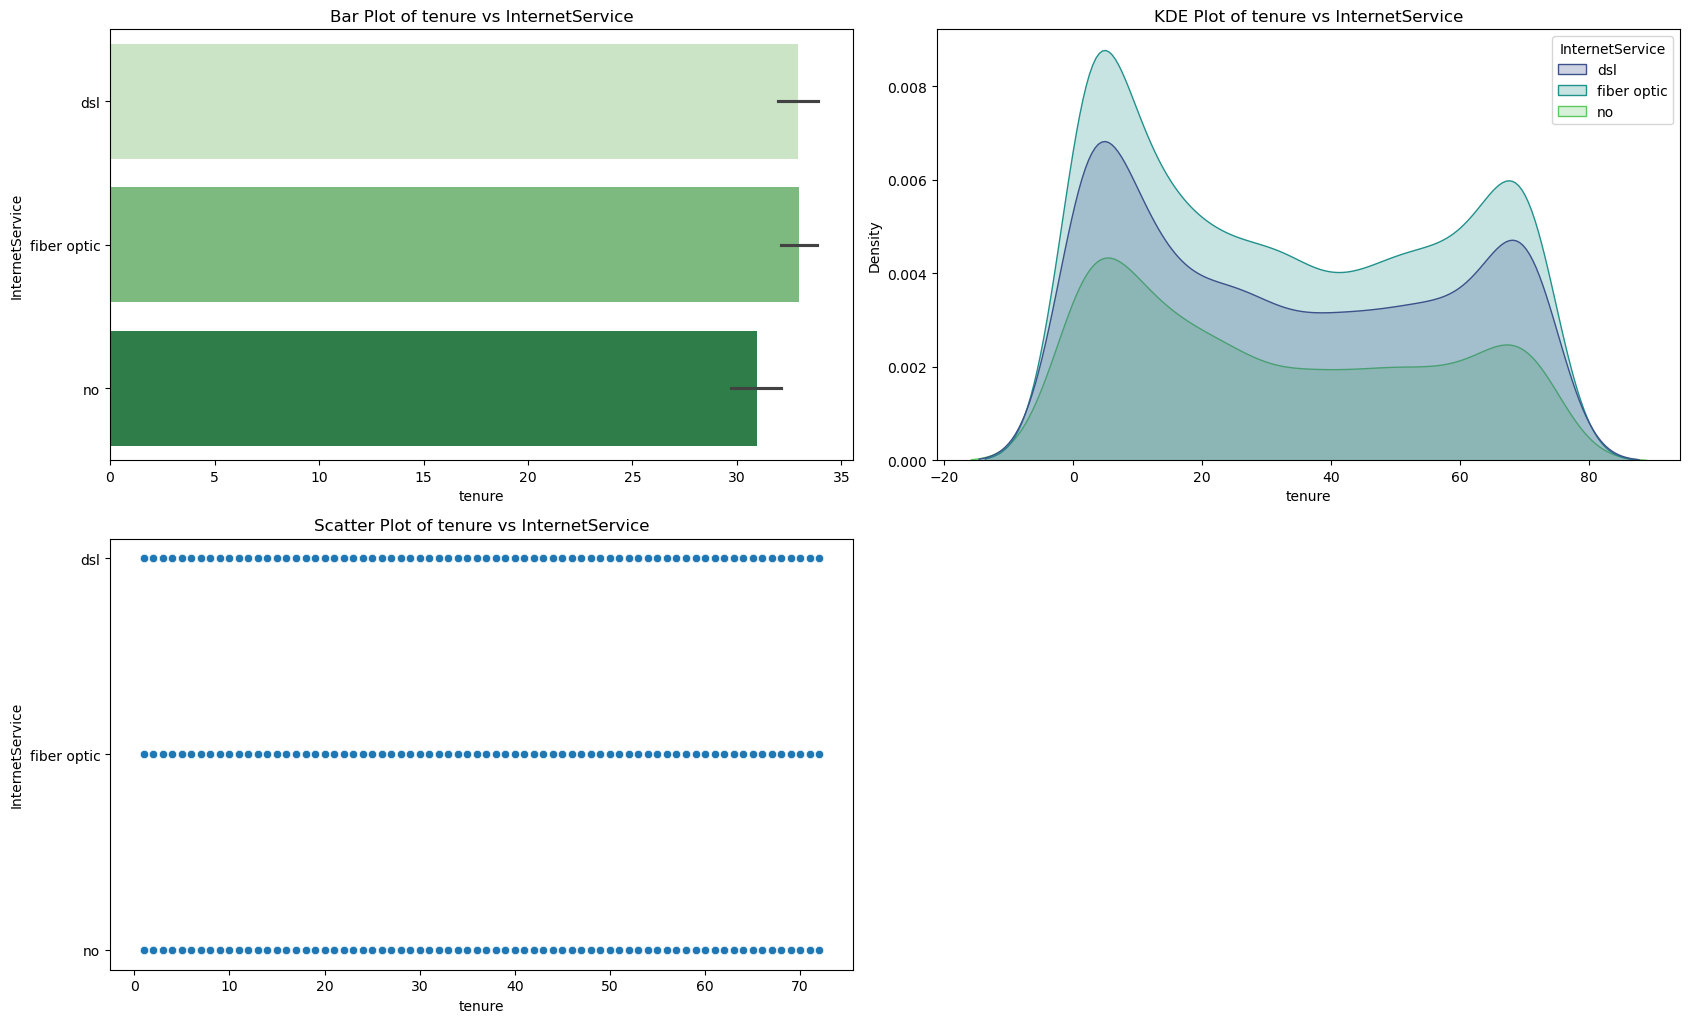

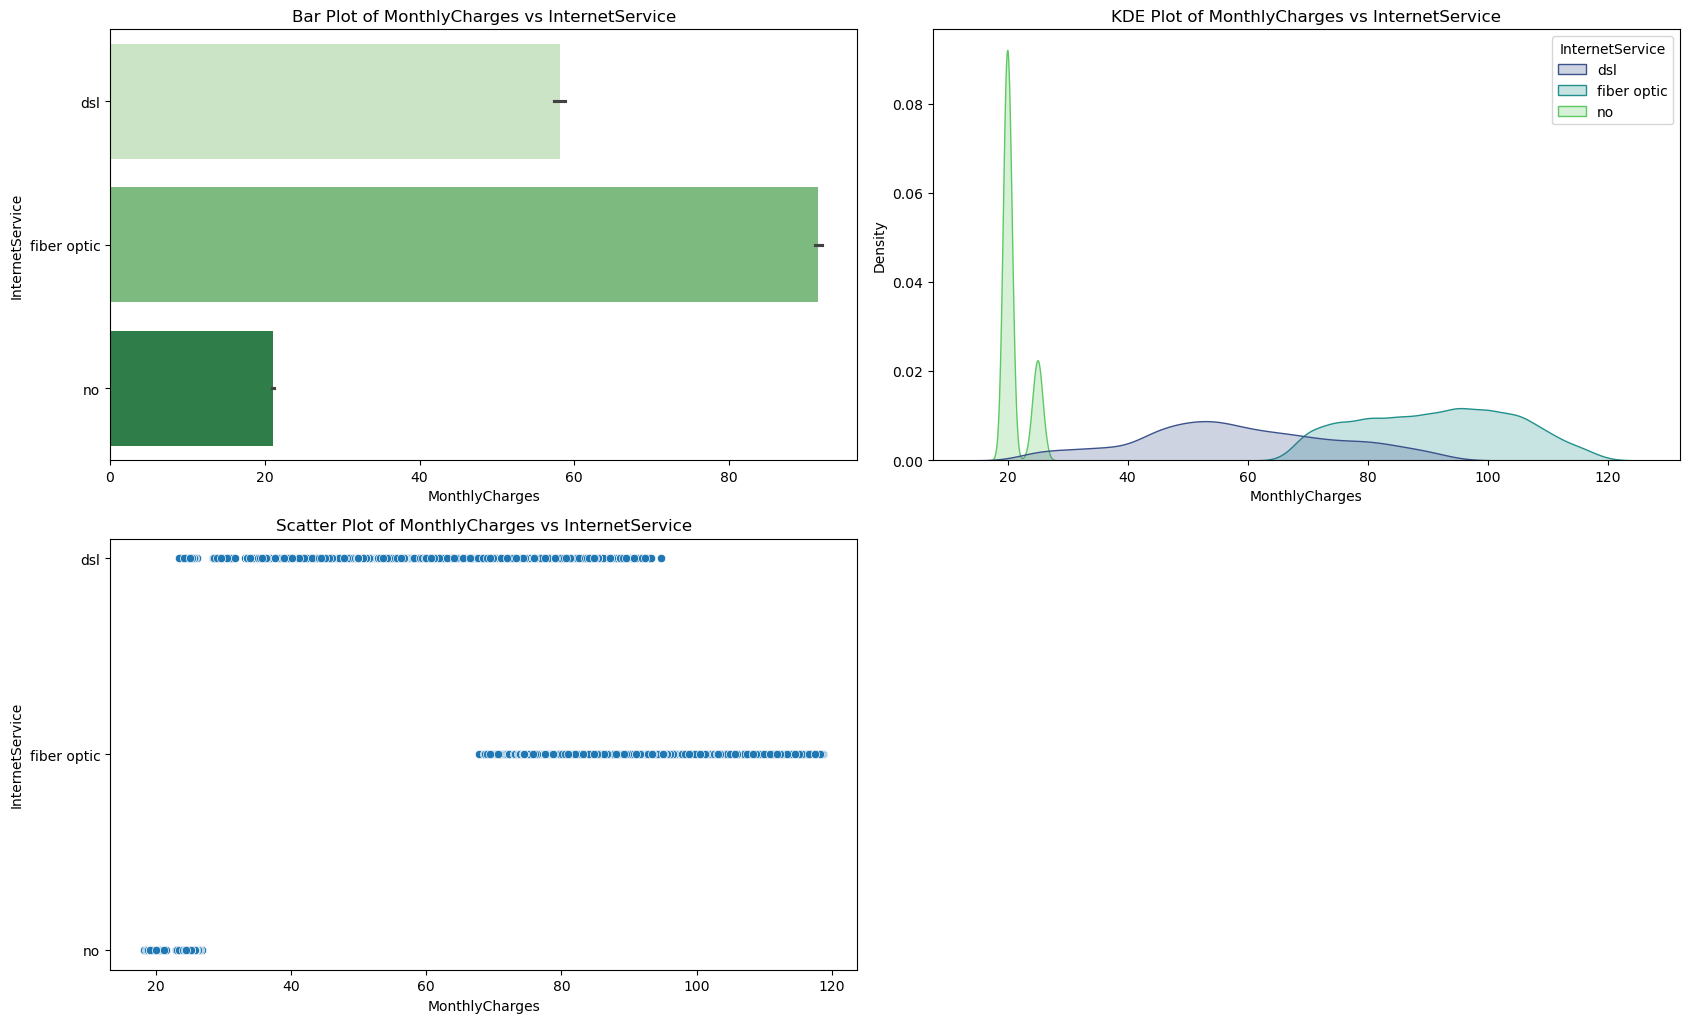

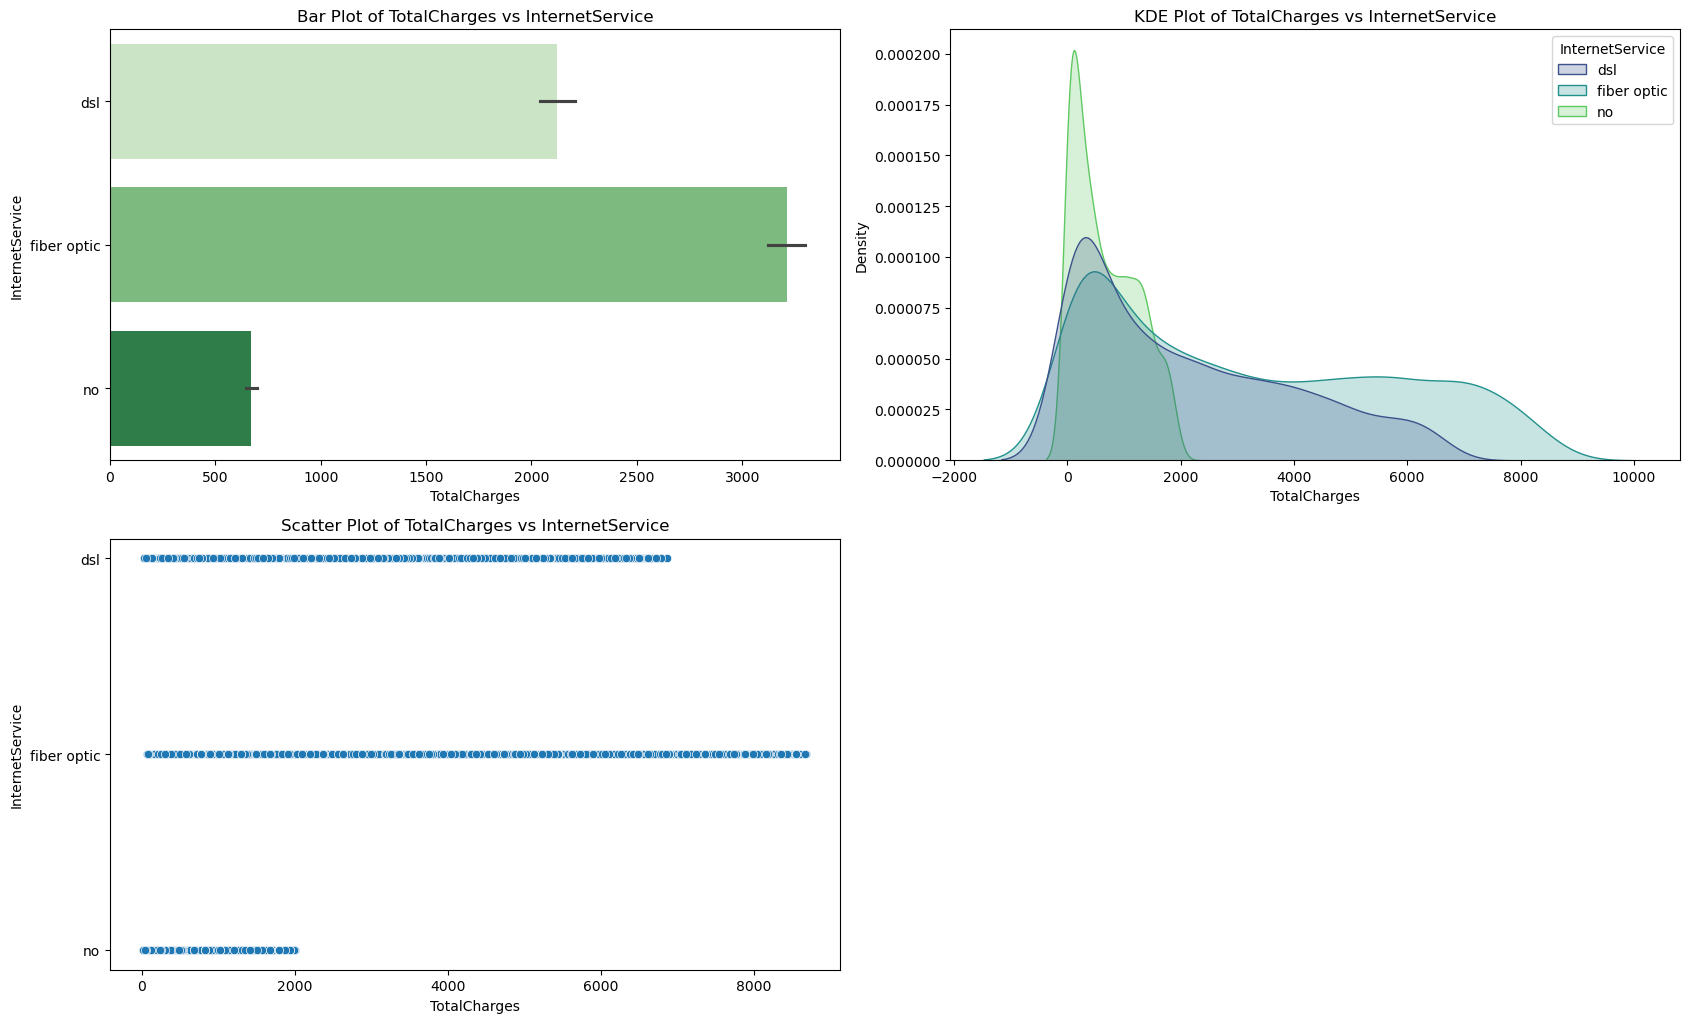

In [62]:
cat_num(df, num_cols, "InternetService")

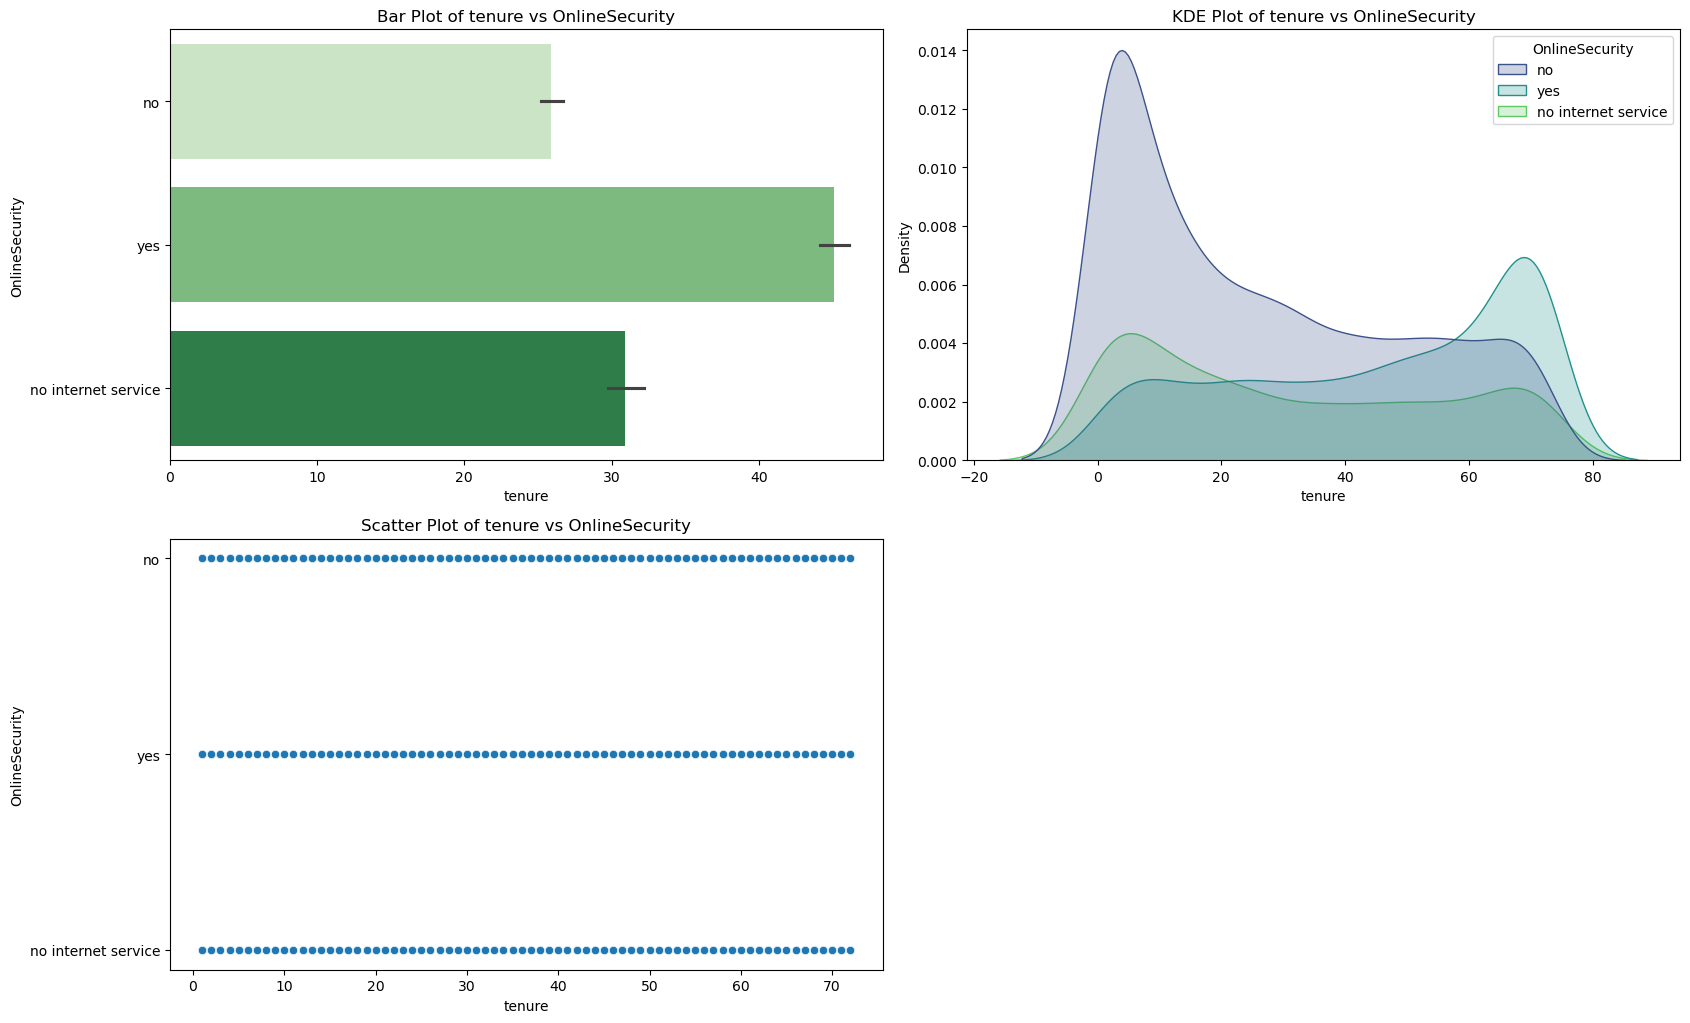

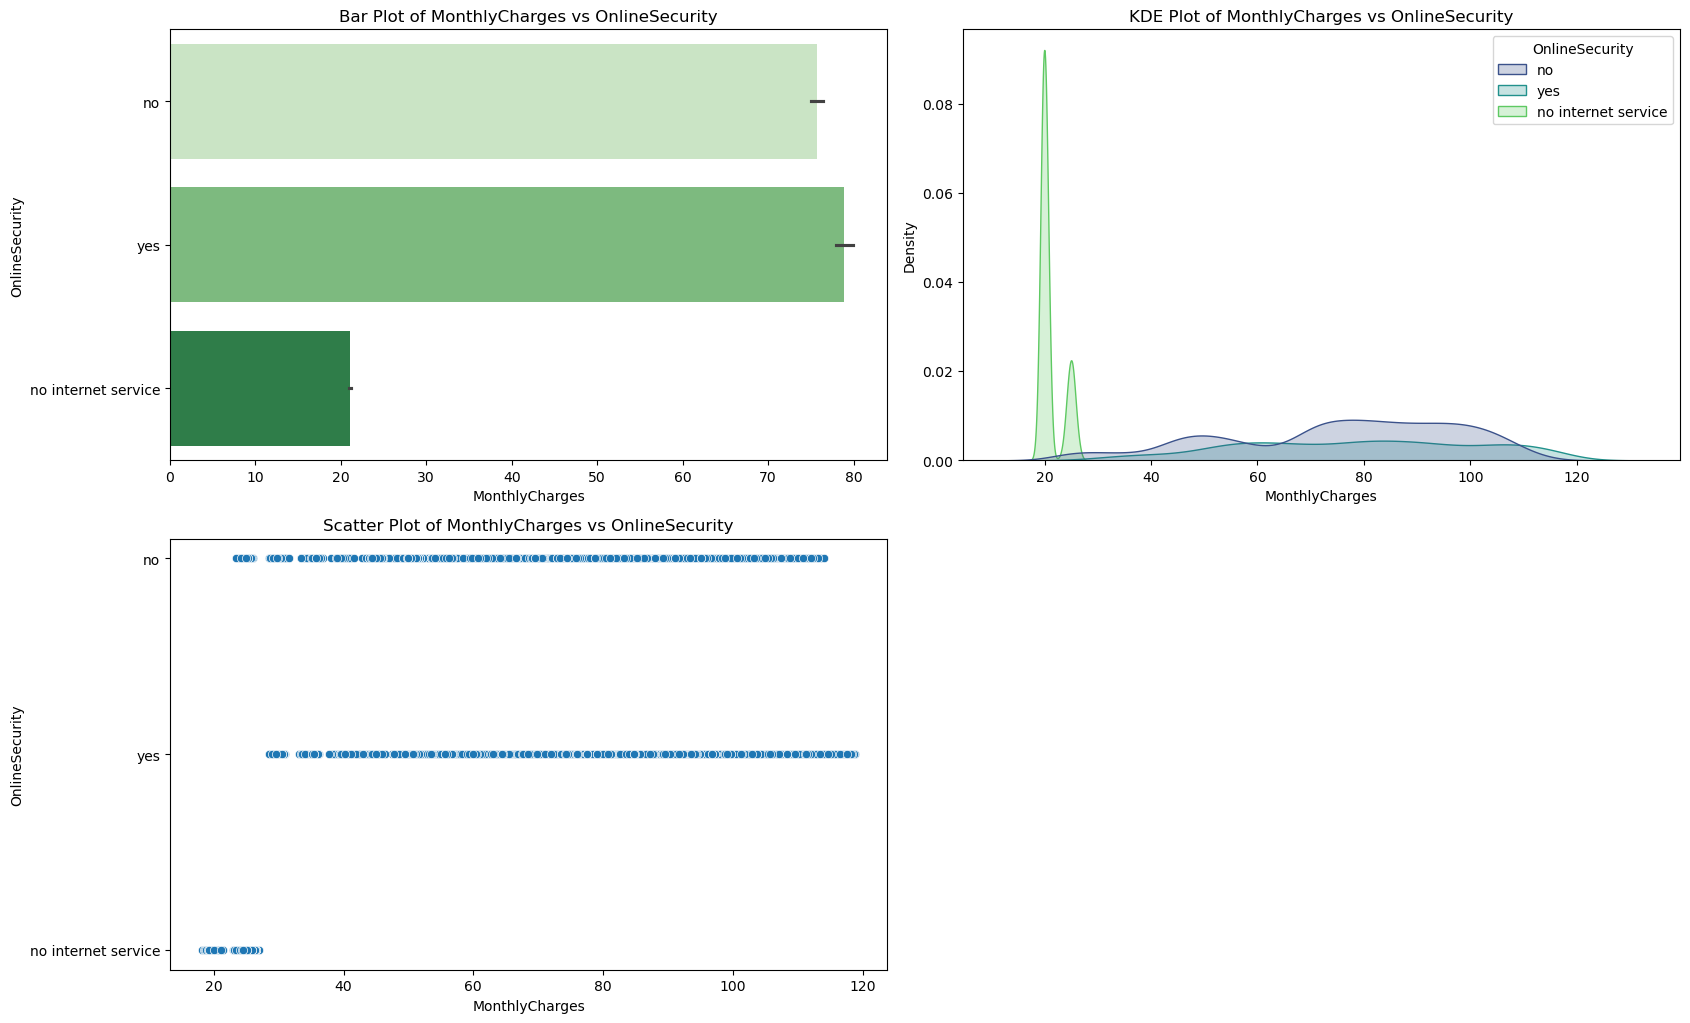

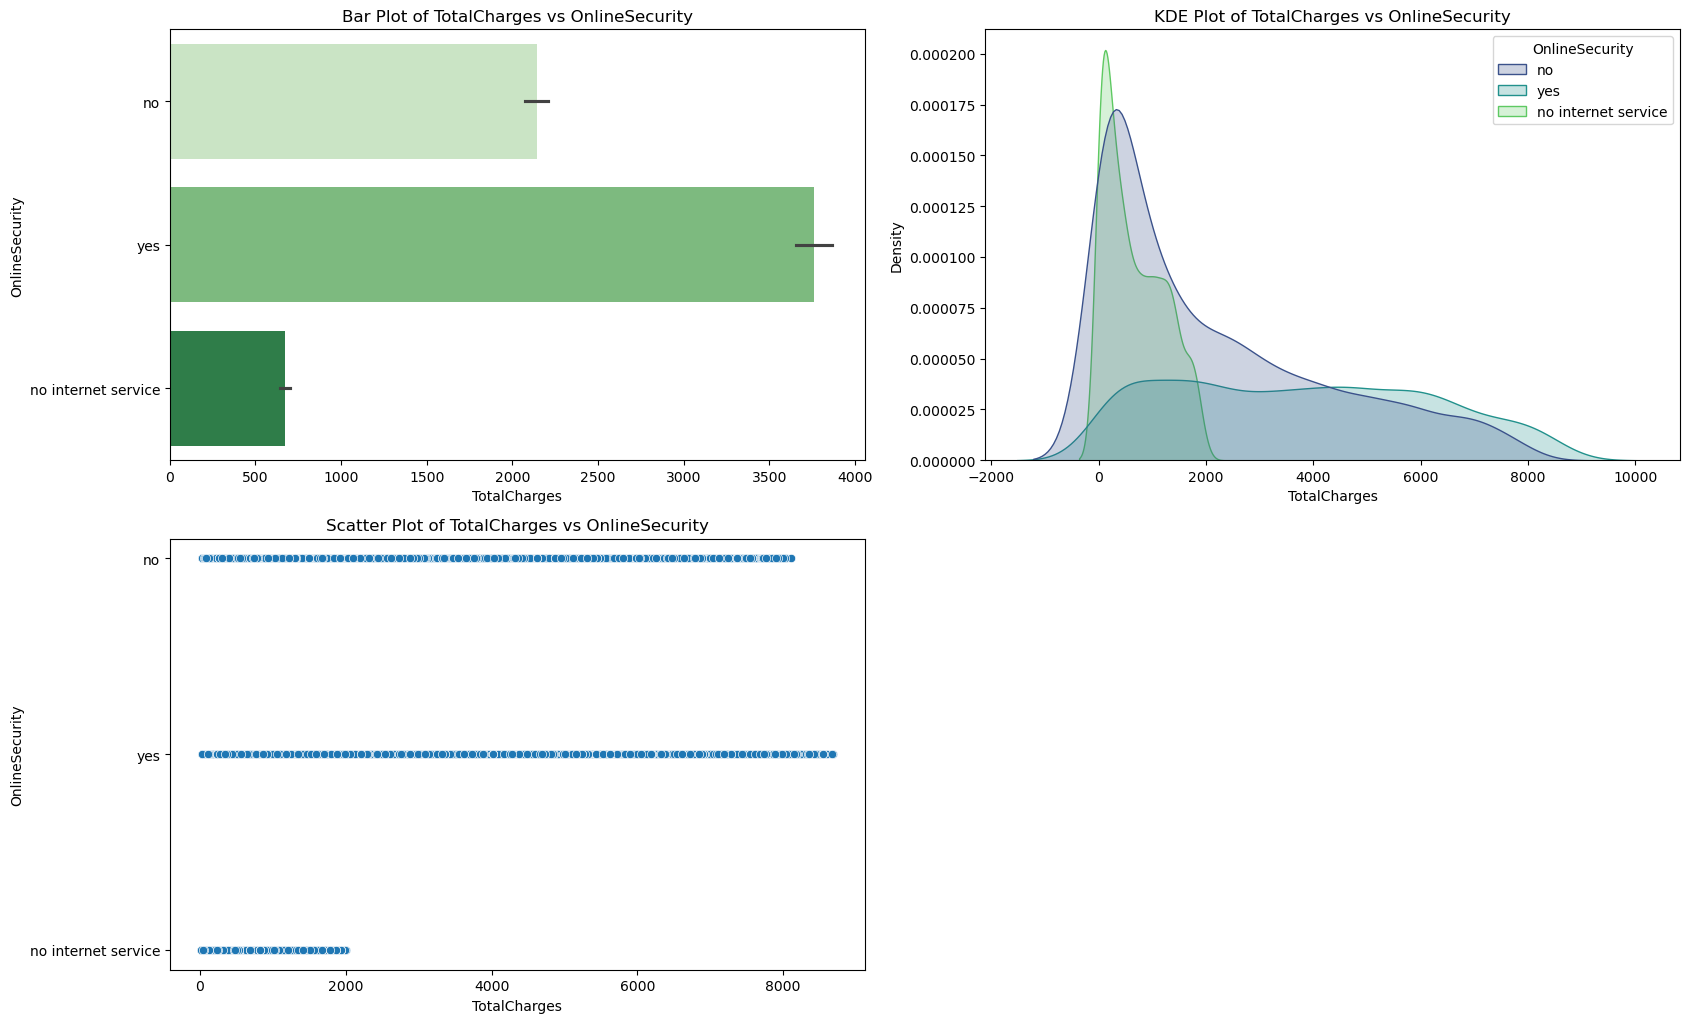

In [63]:
cat_num(df, num_cols, "OnlineSecurity")

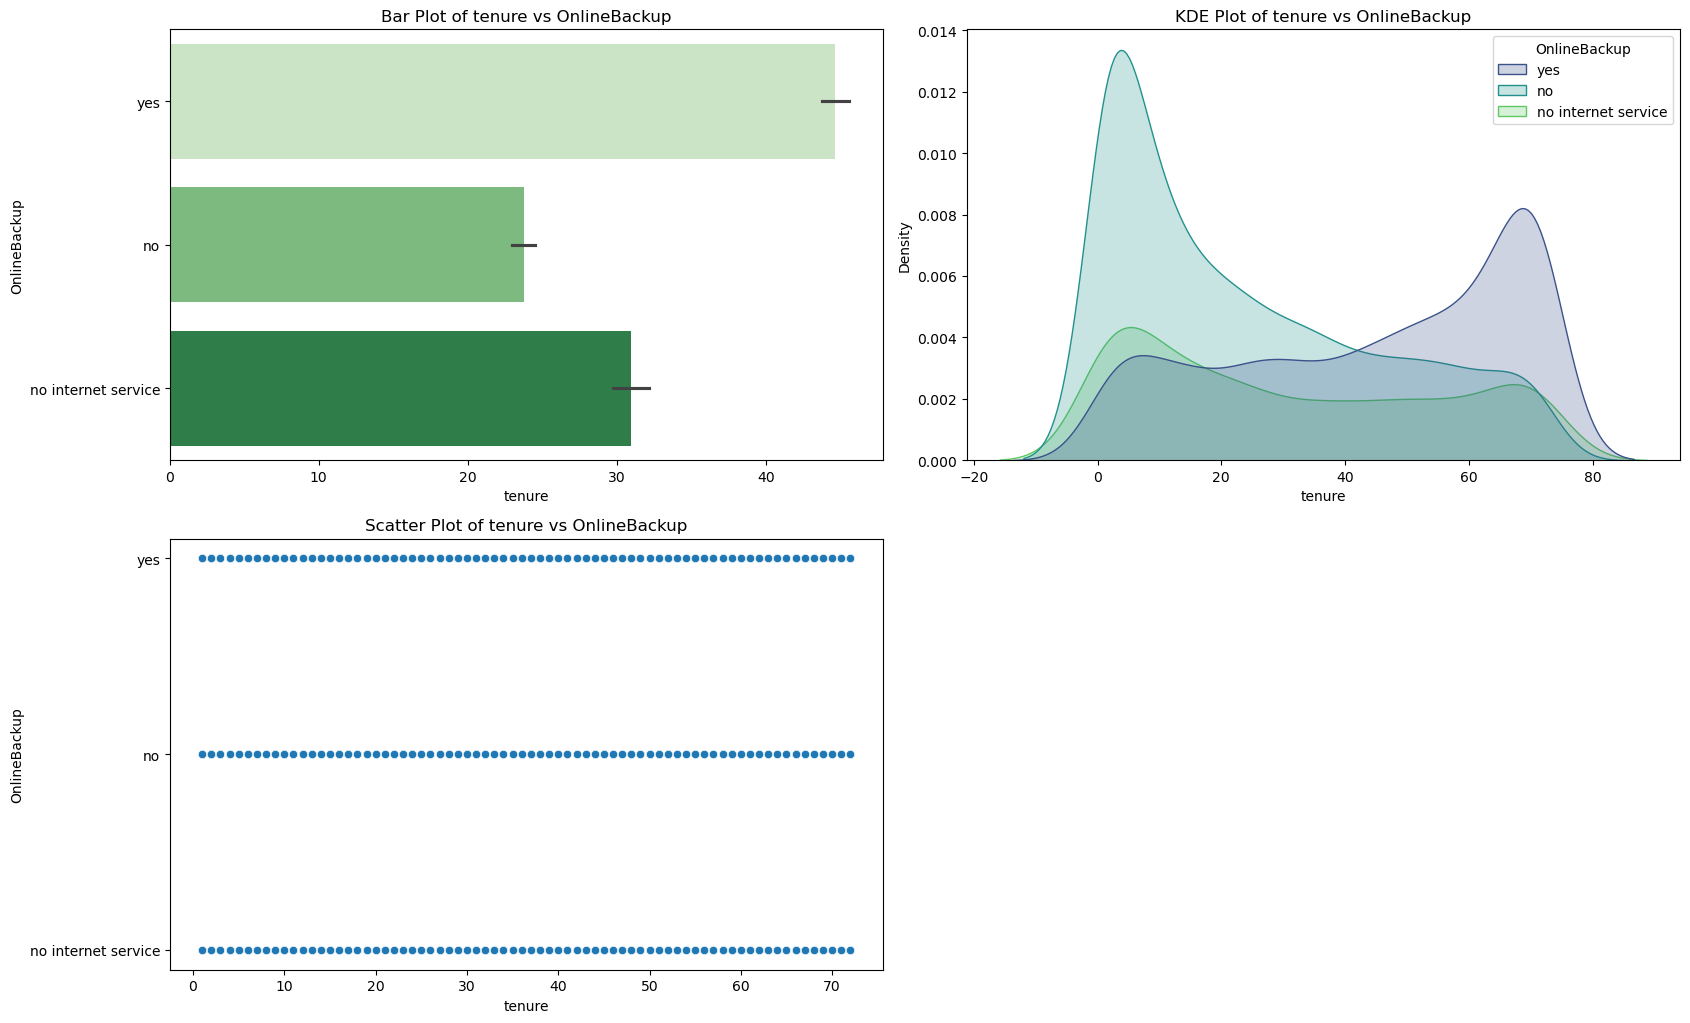

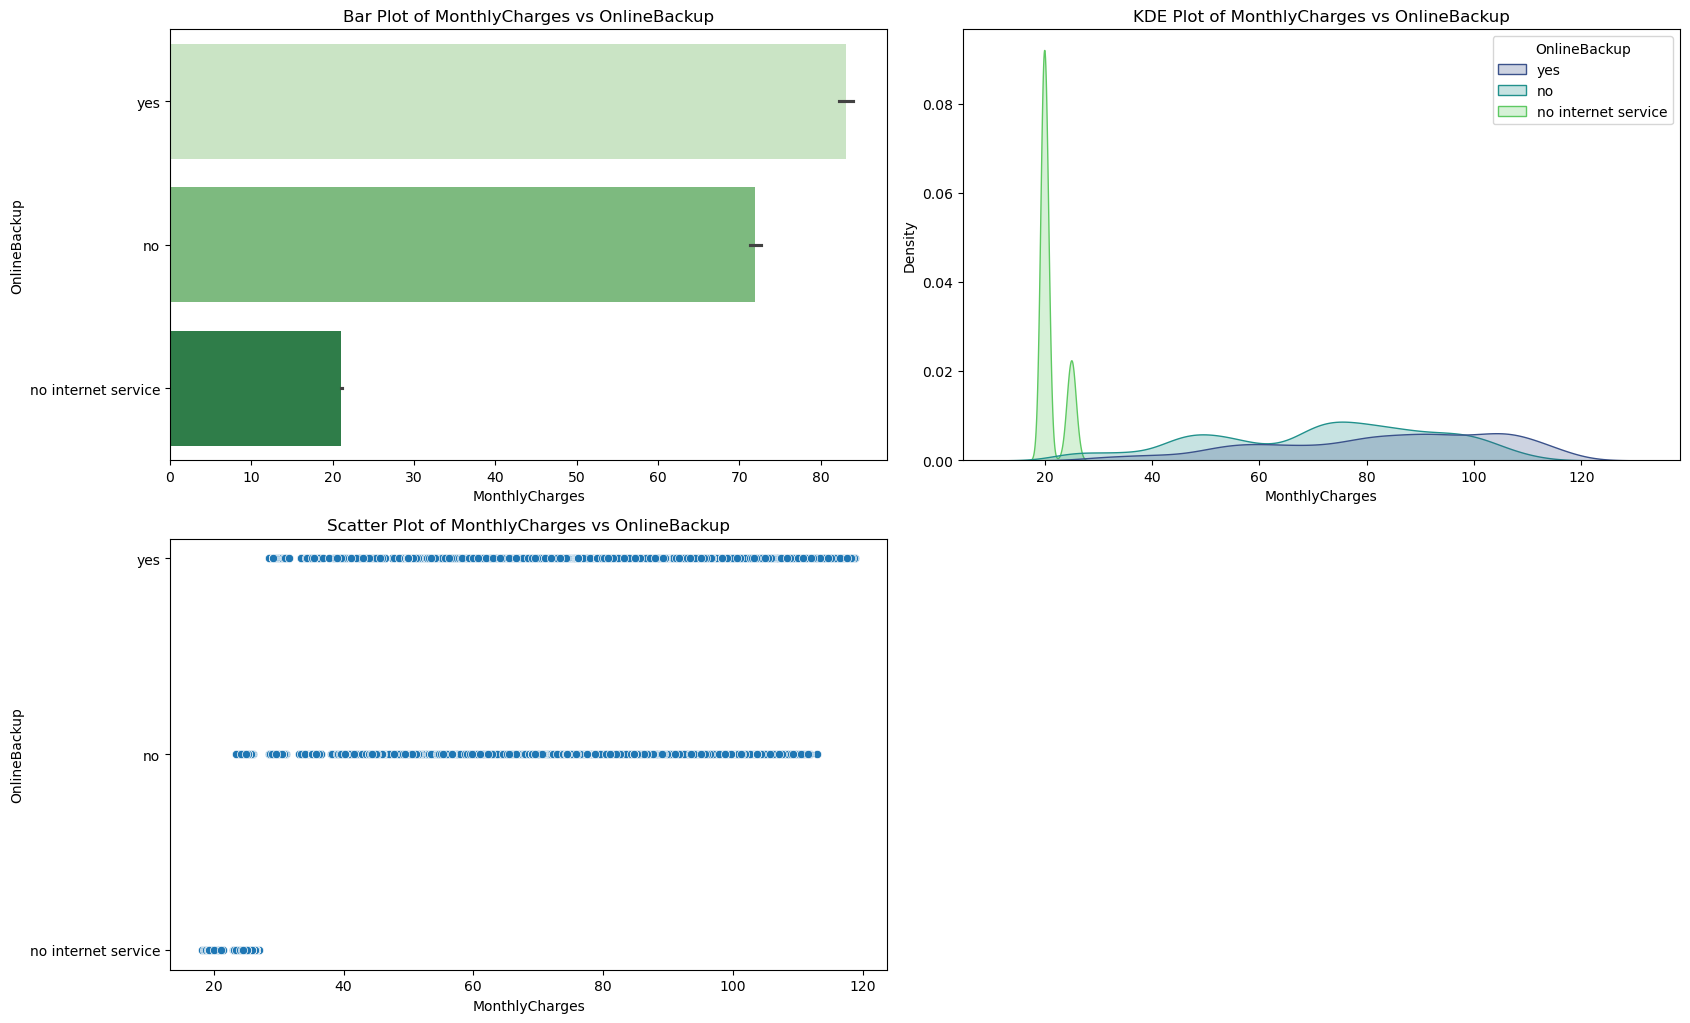

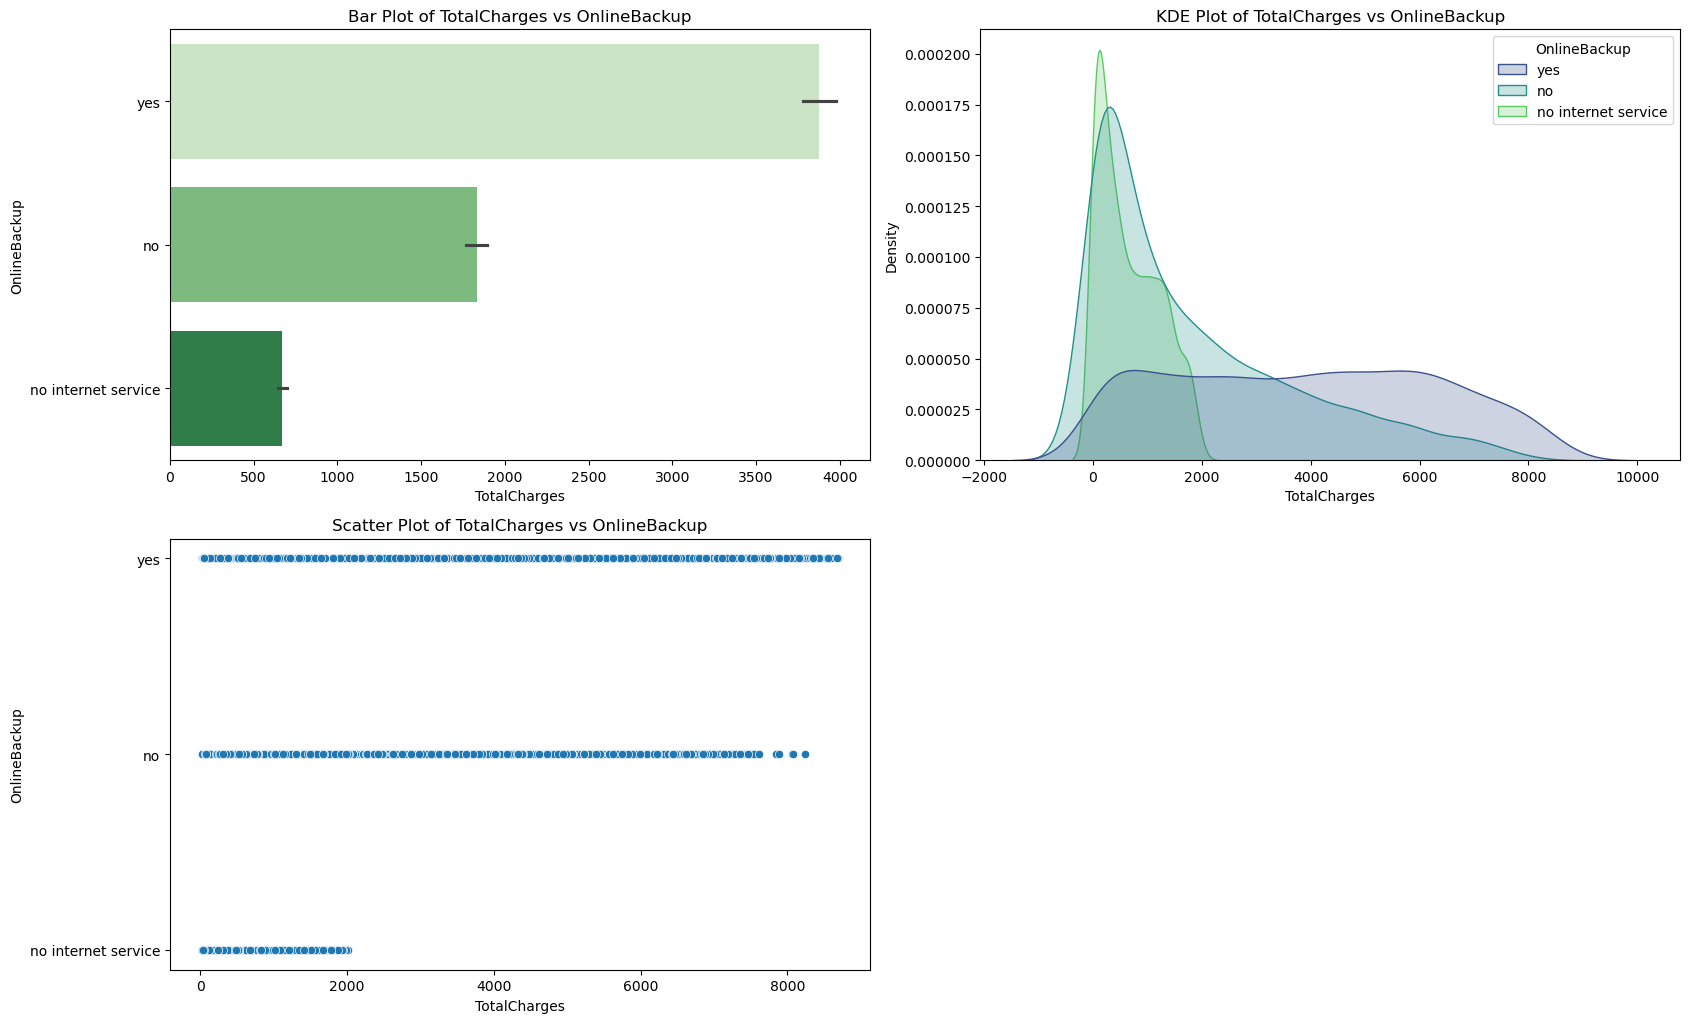

In [64]:
cat_num(df, num_cols, "OnlineBackup")

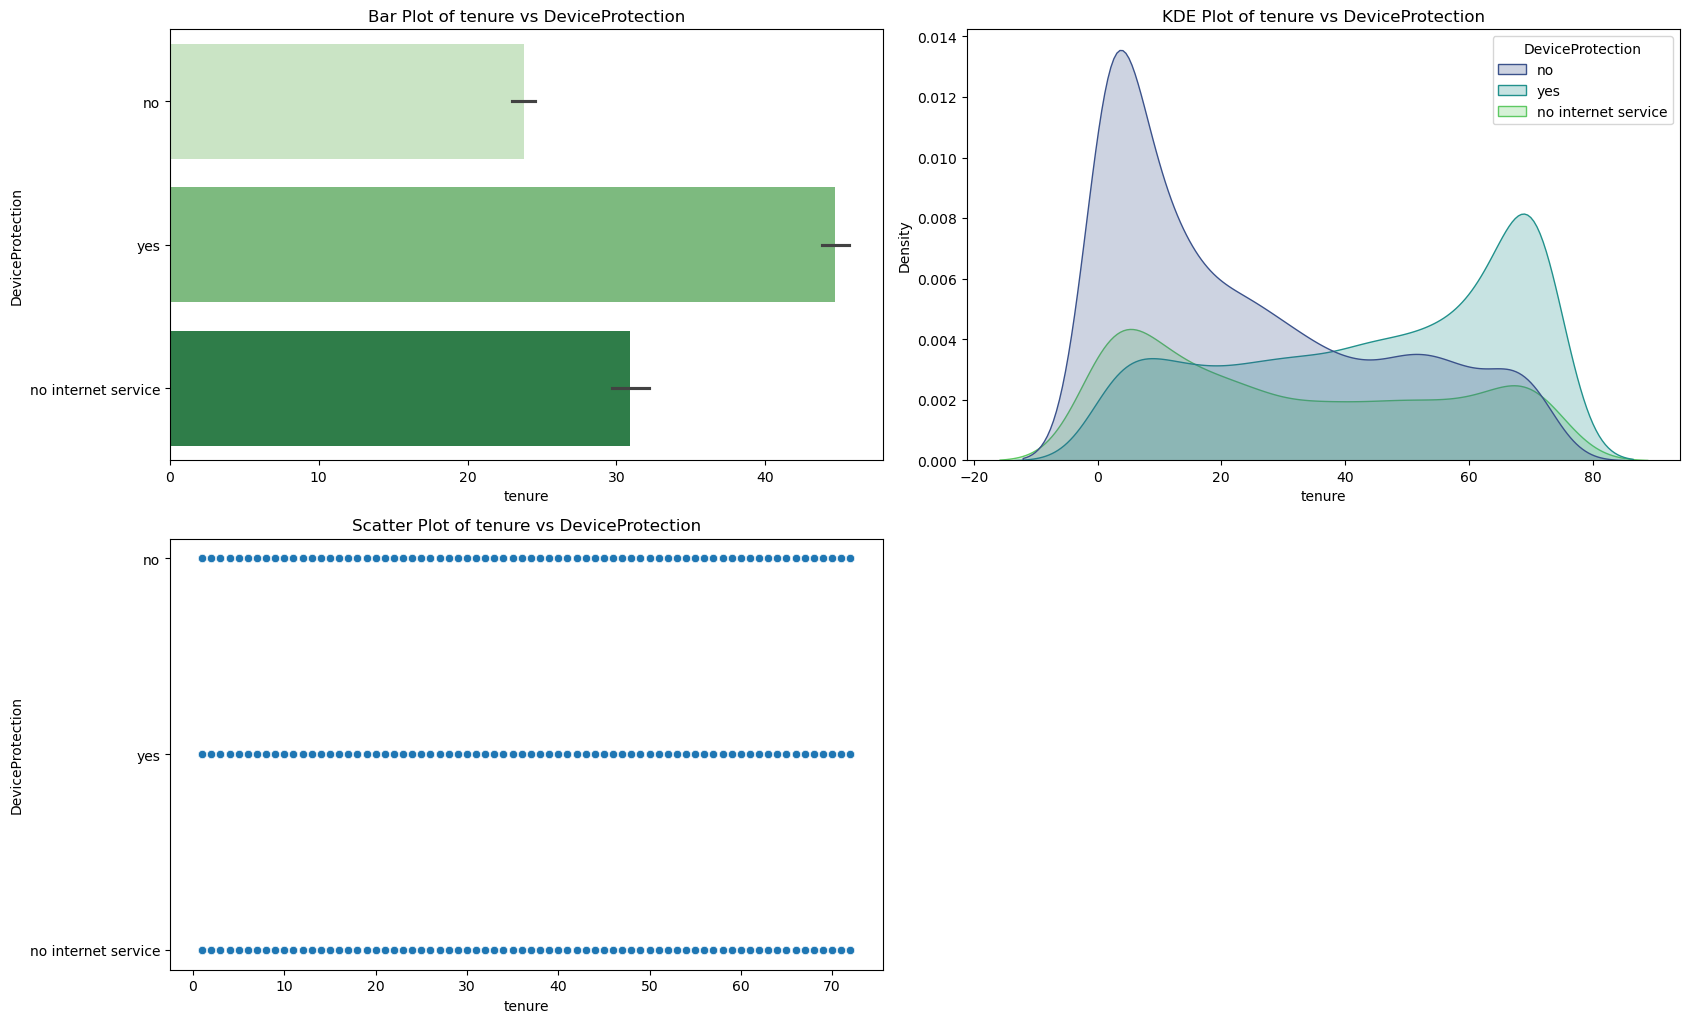

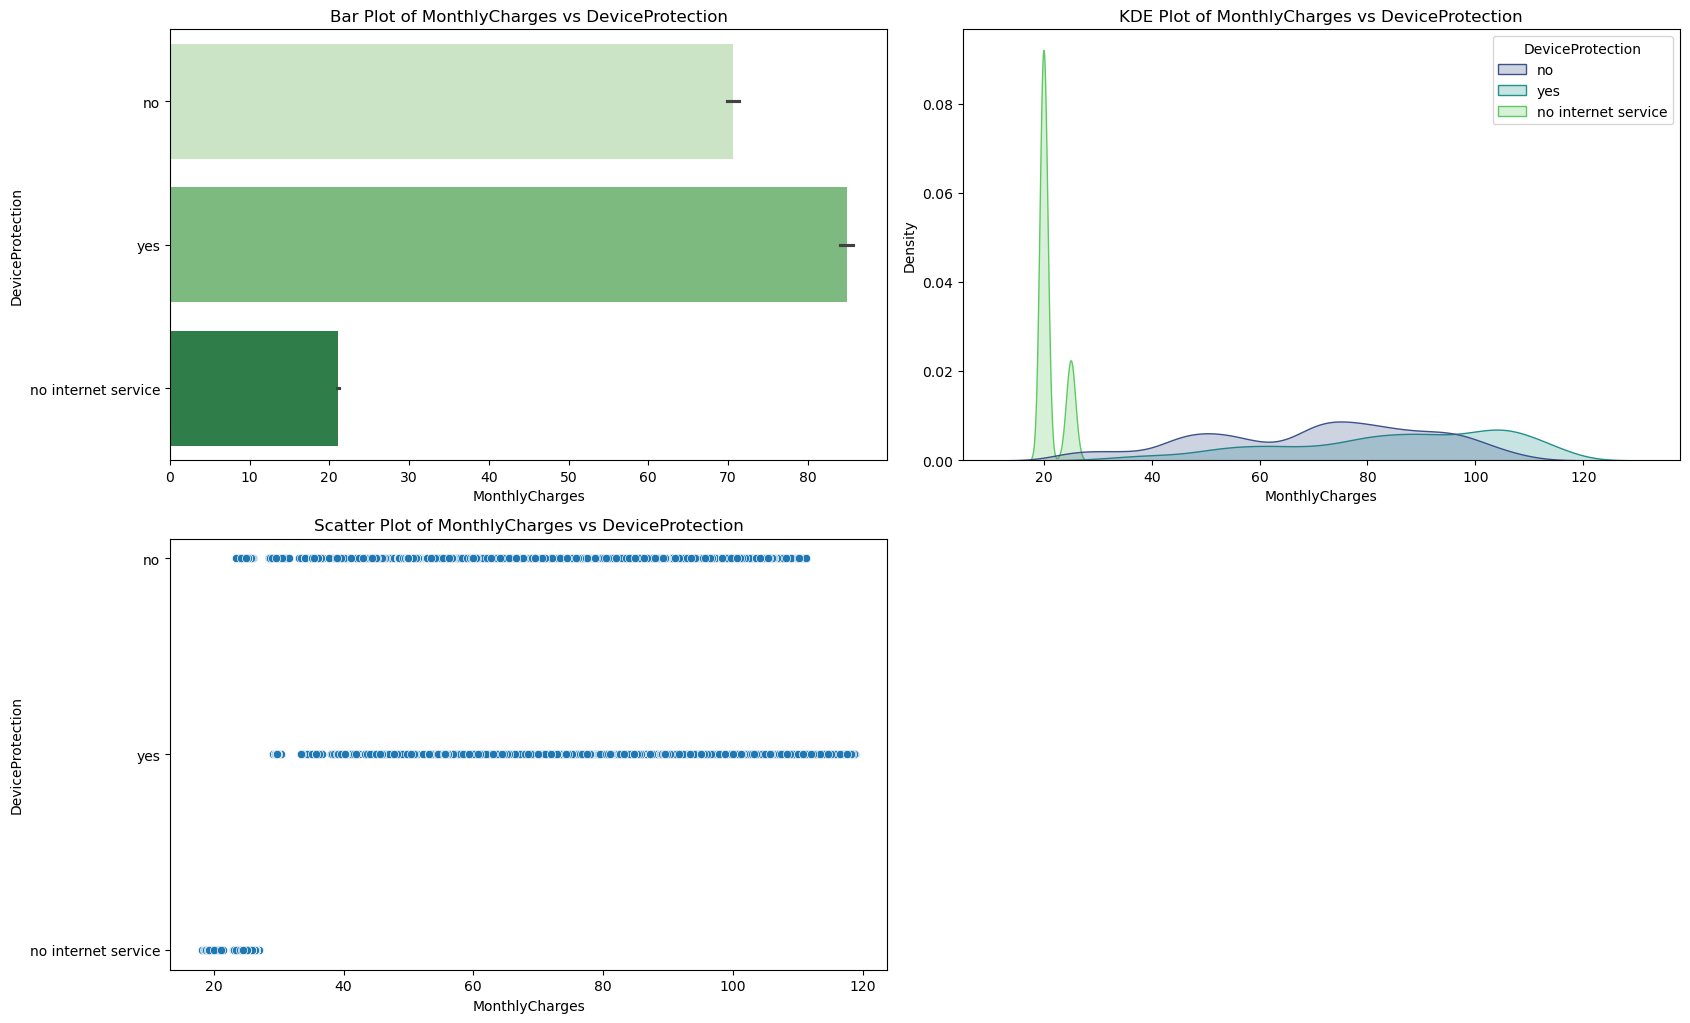

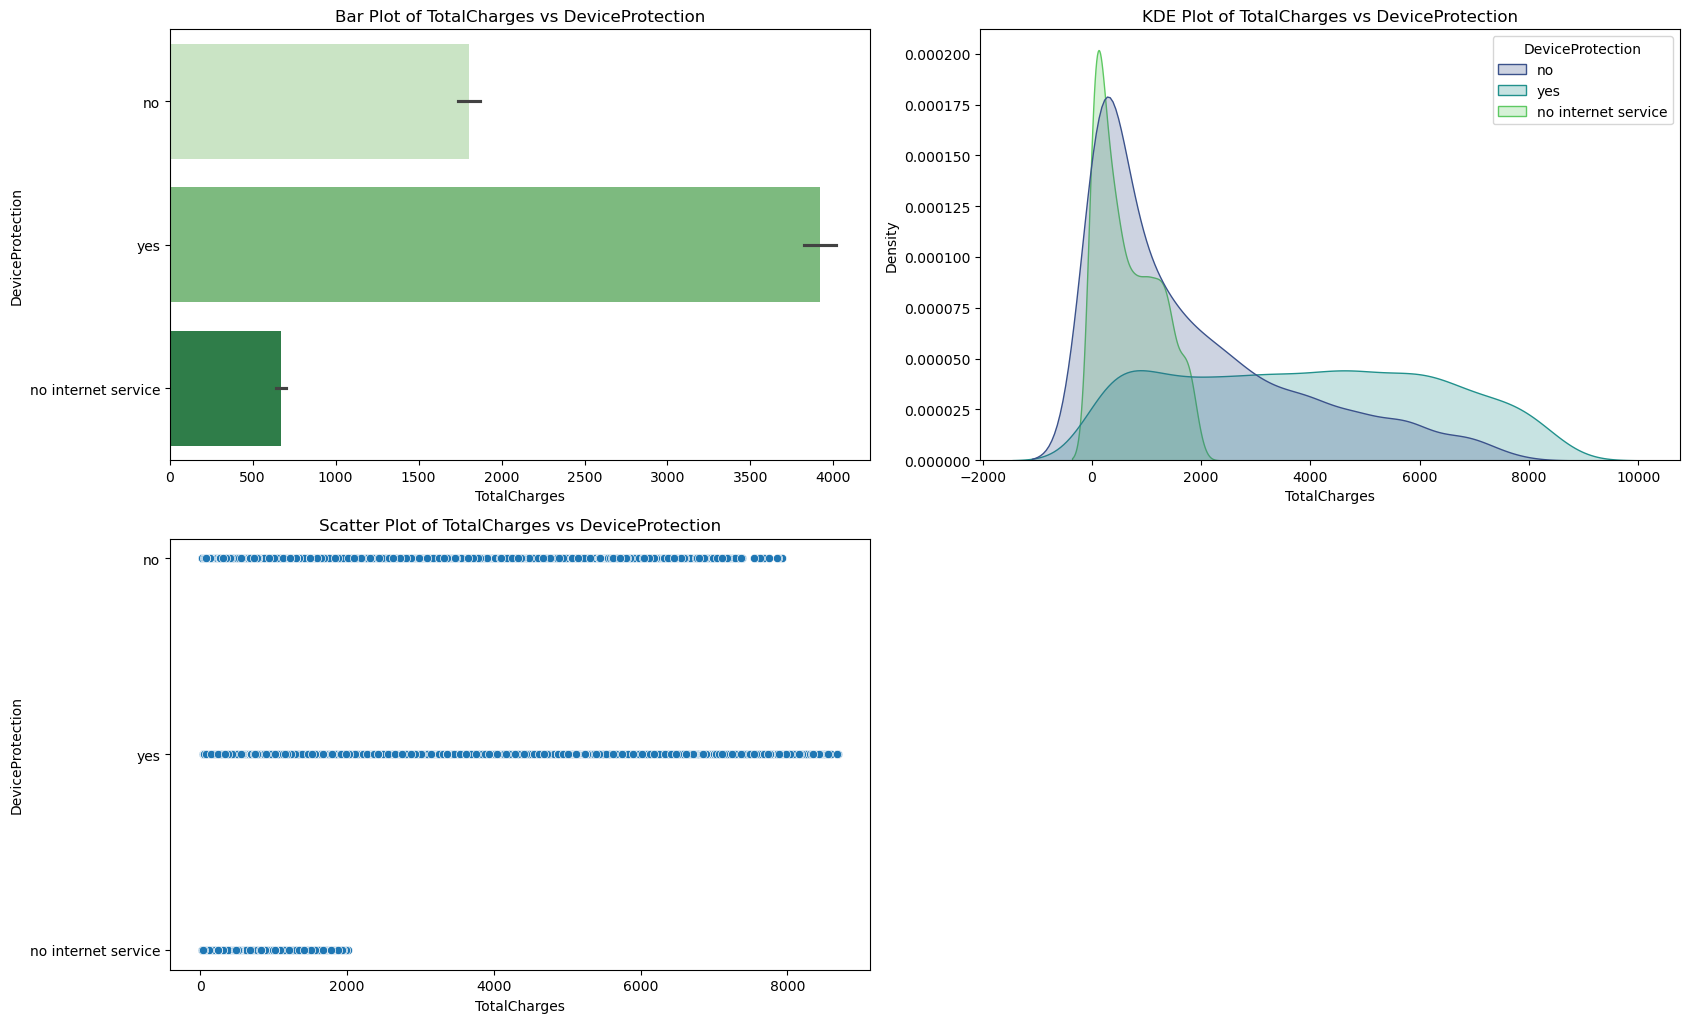

In [65]:
cat_num(df, num_cols, "DeviceProtection")

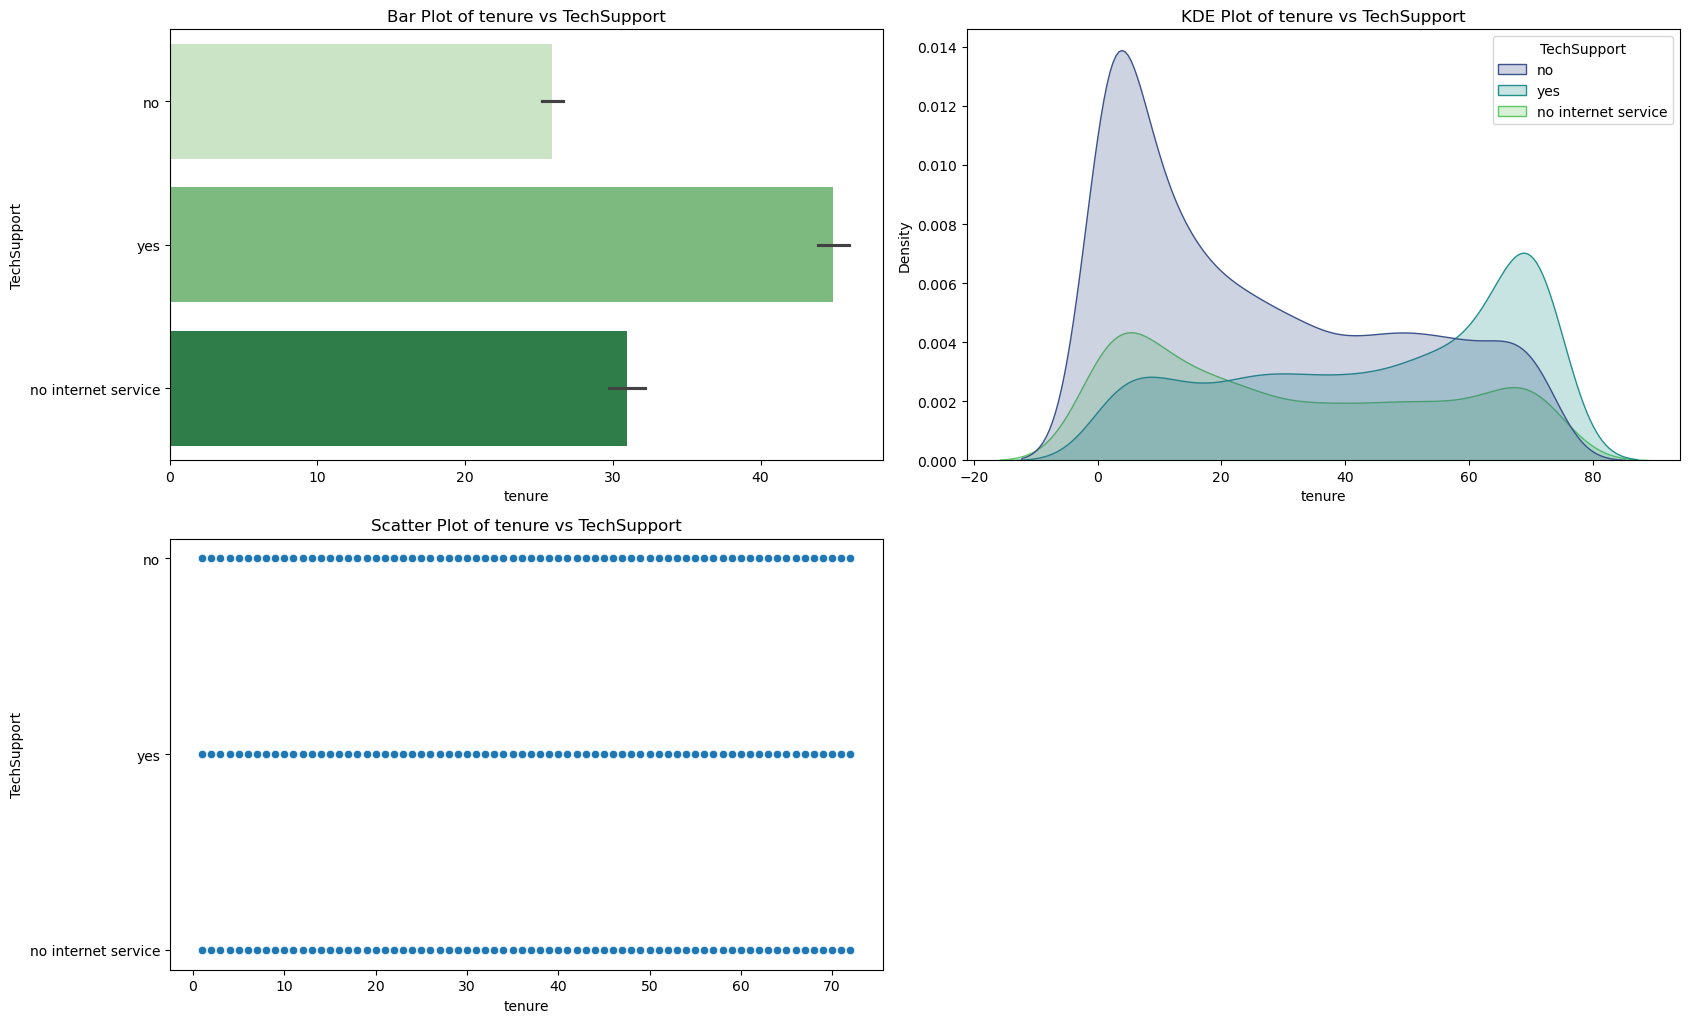

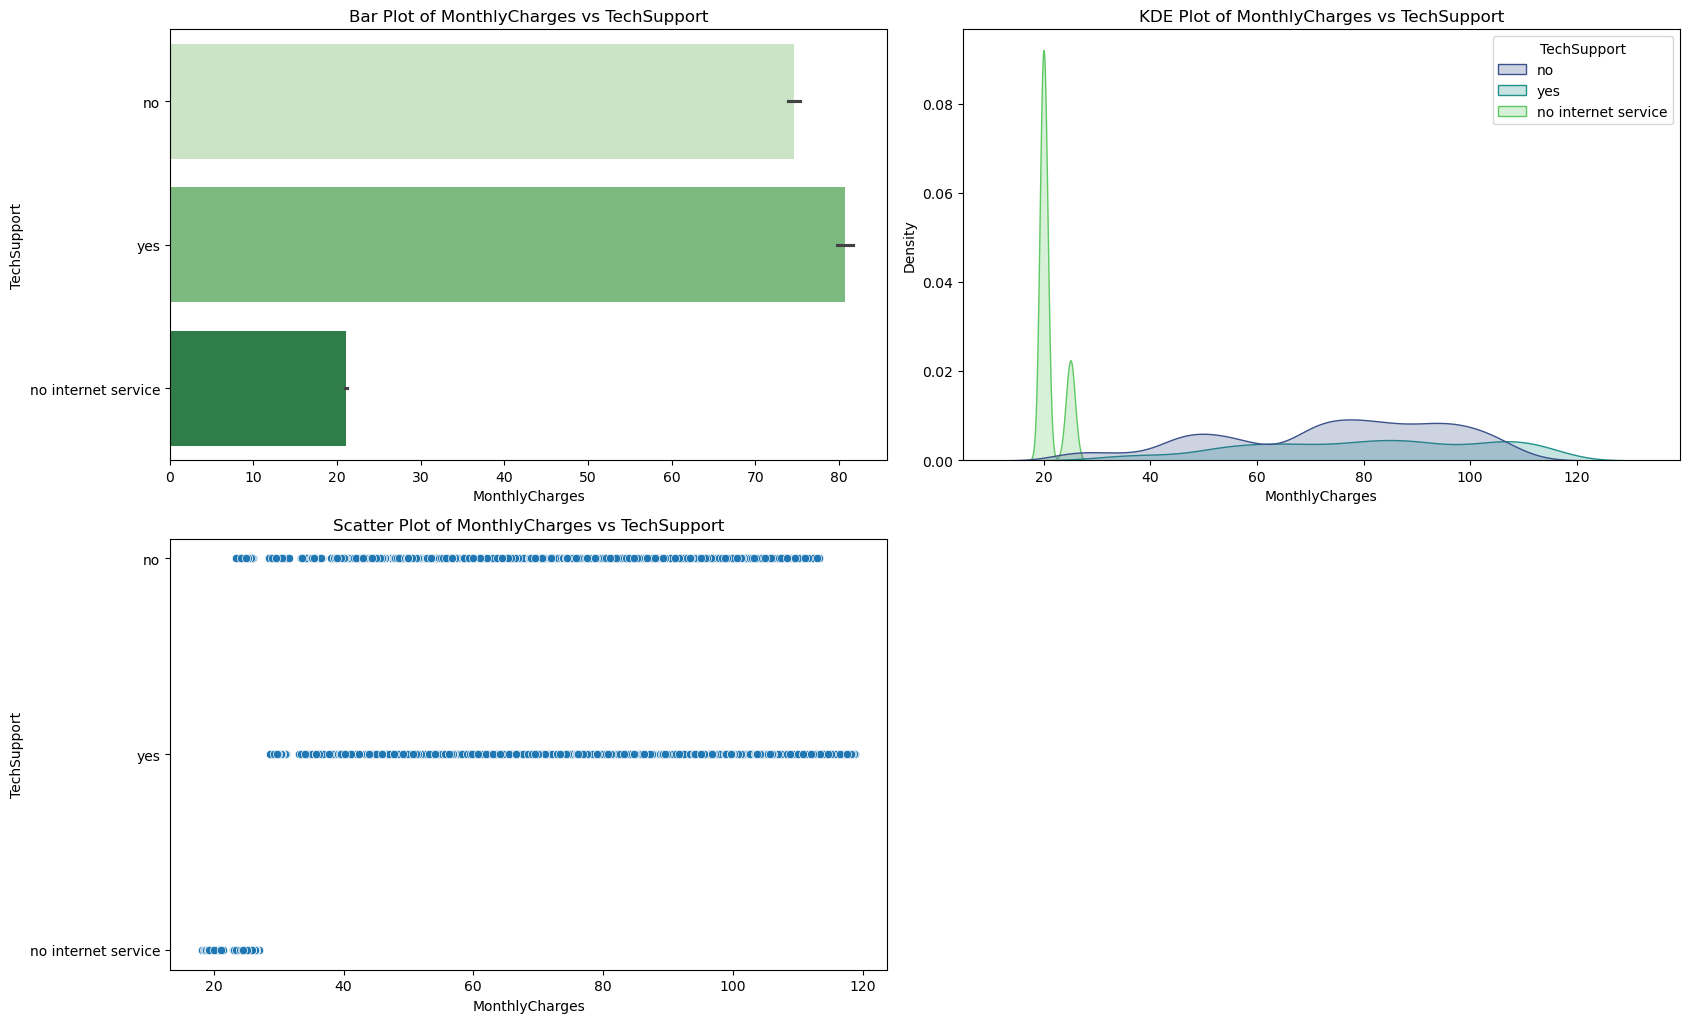

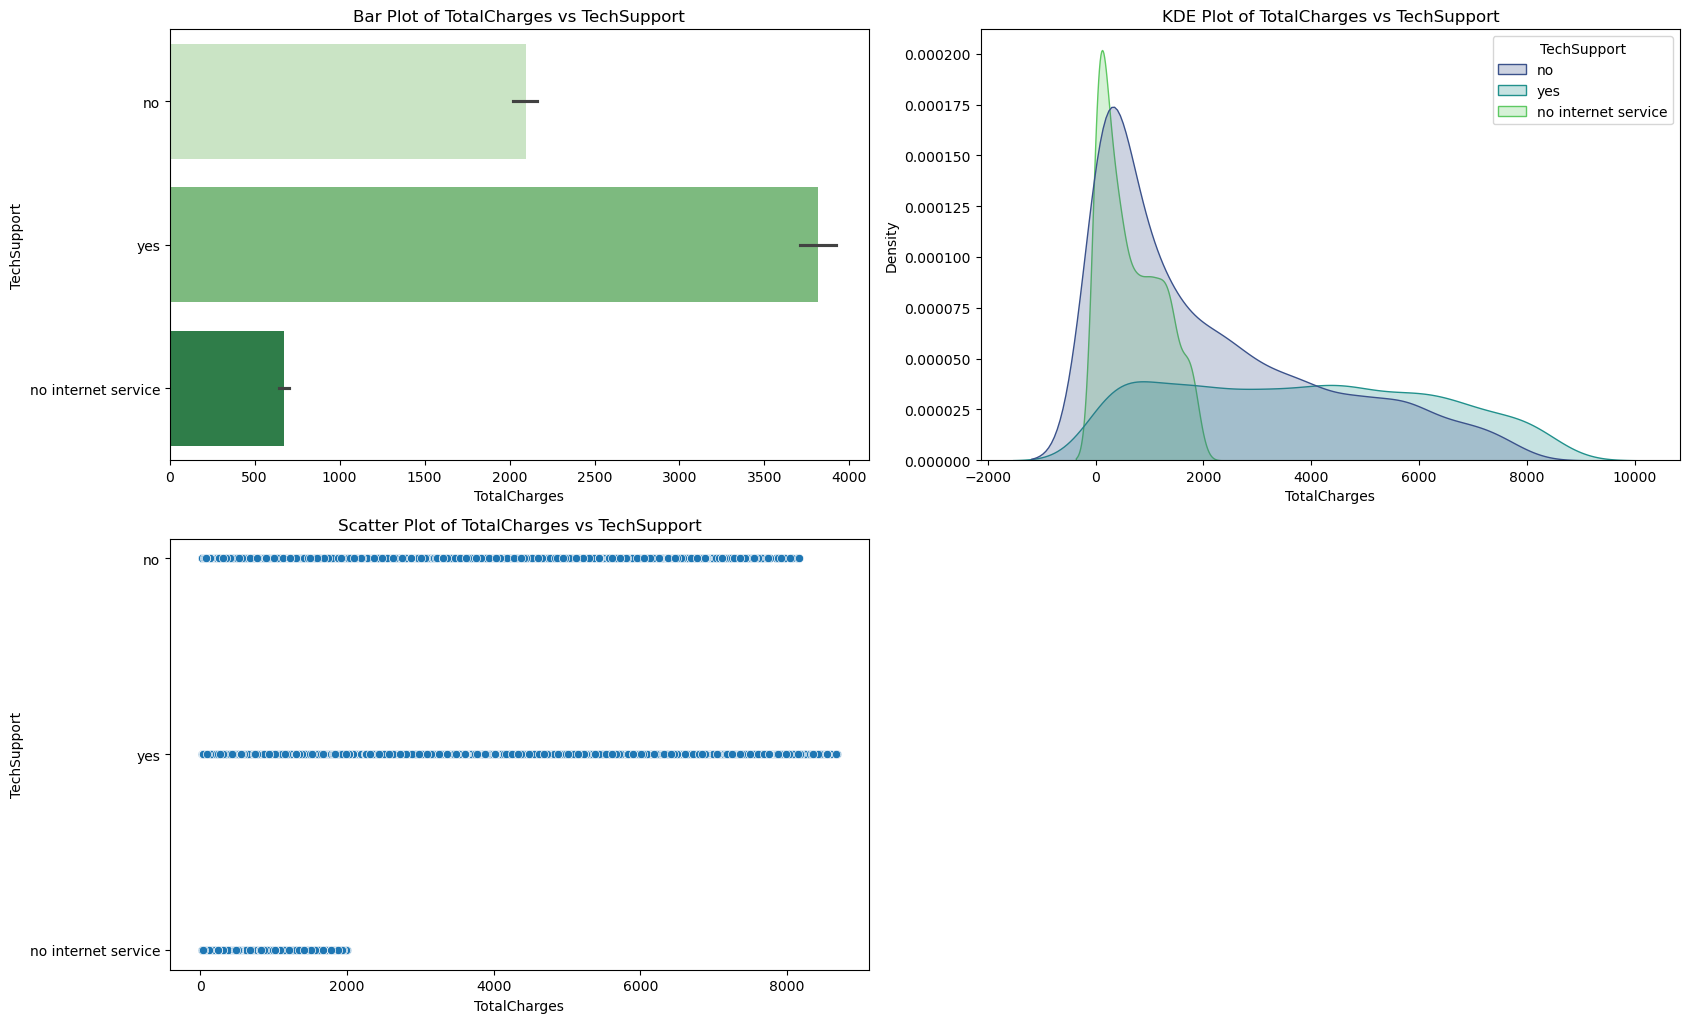

In [66]:
cat_num(df, num_cols, "TechSupport")

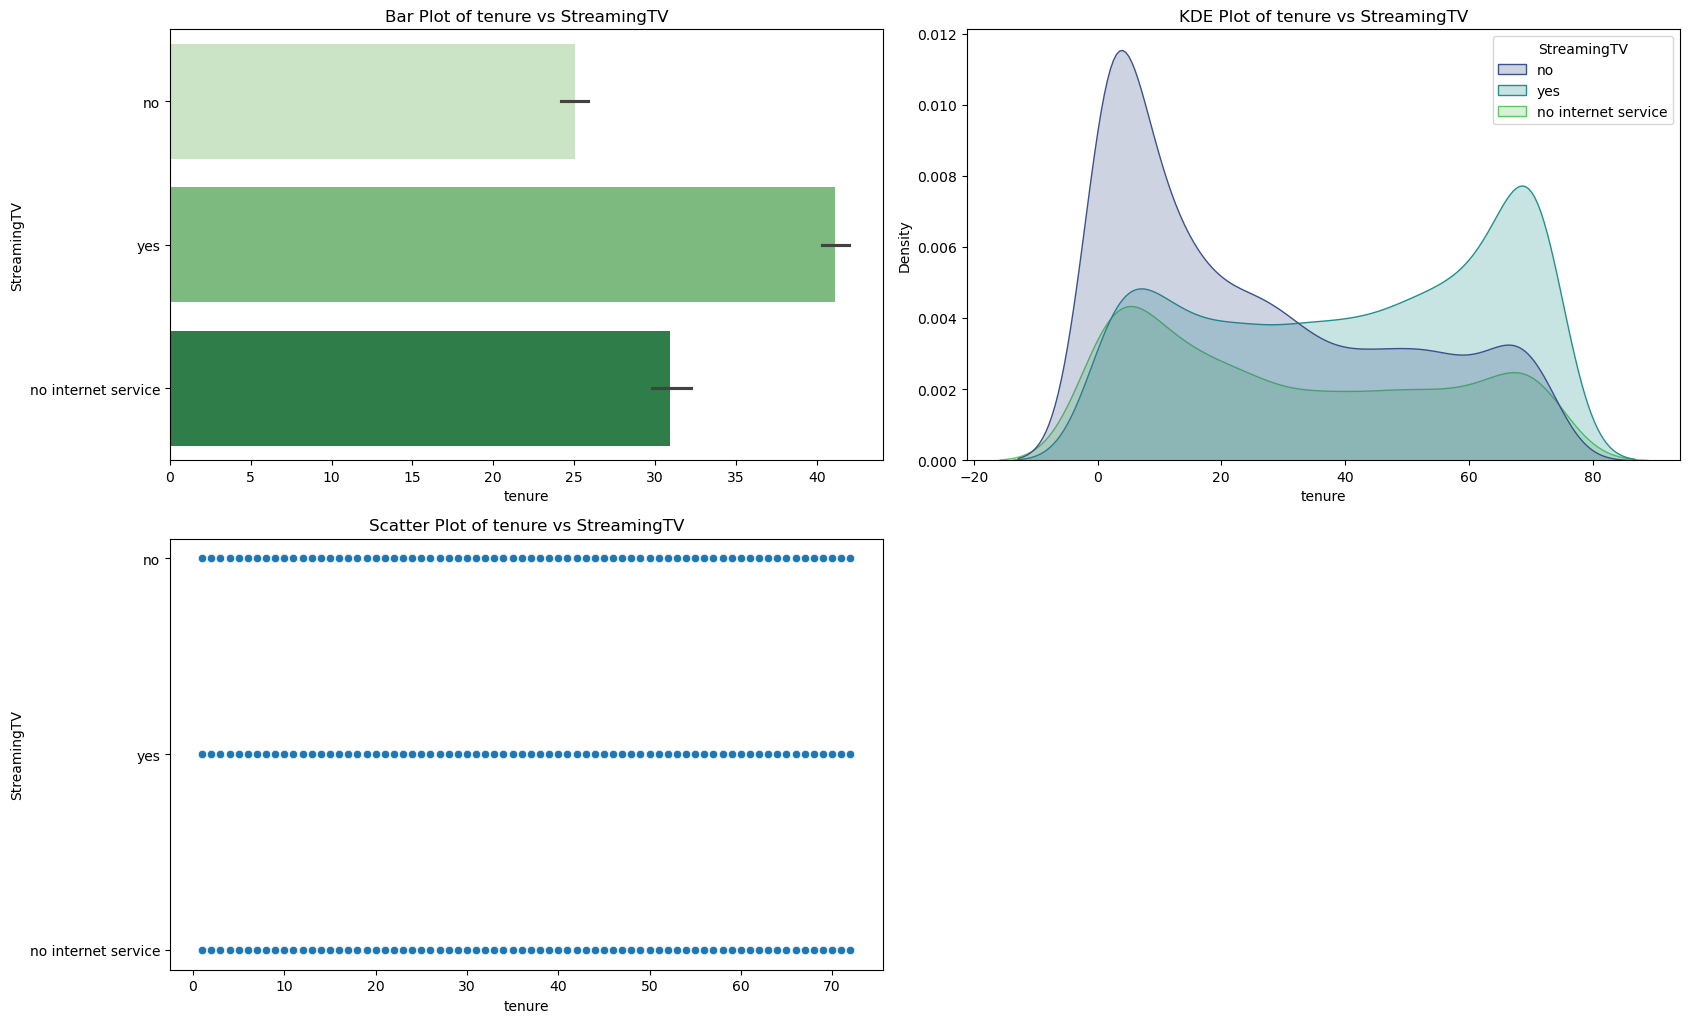

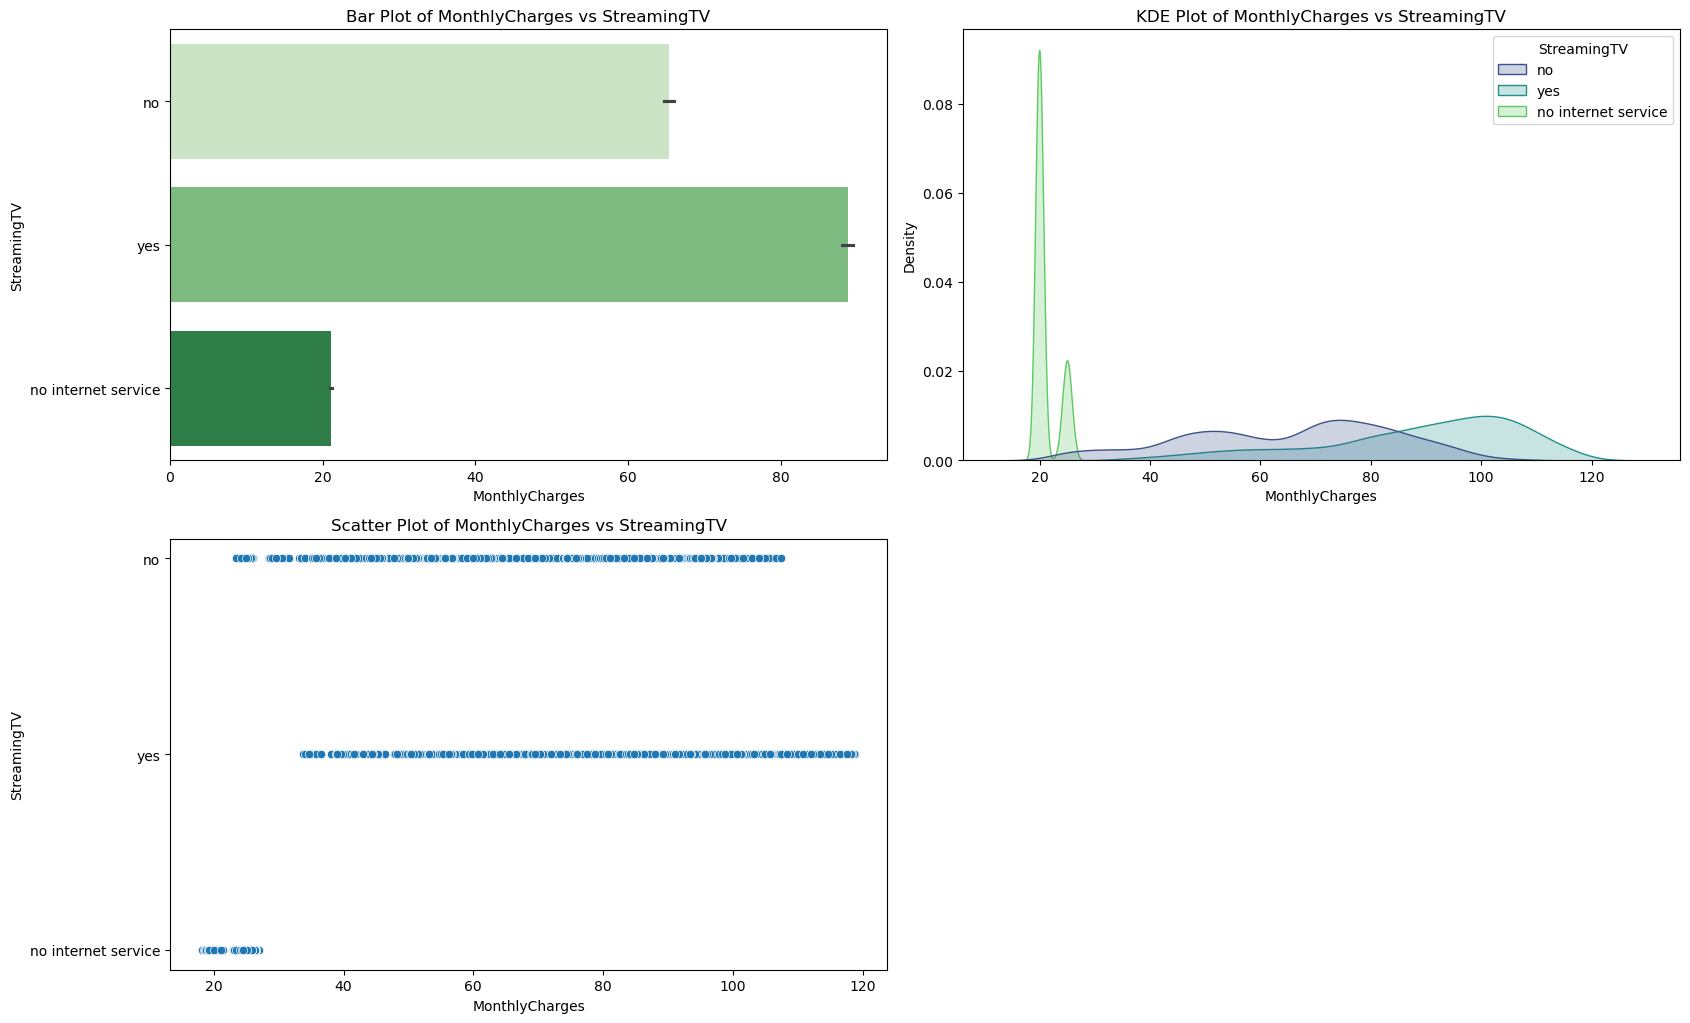

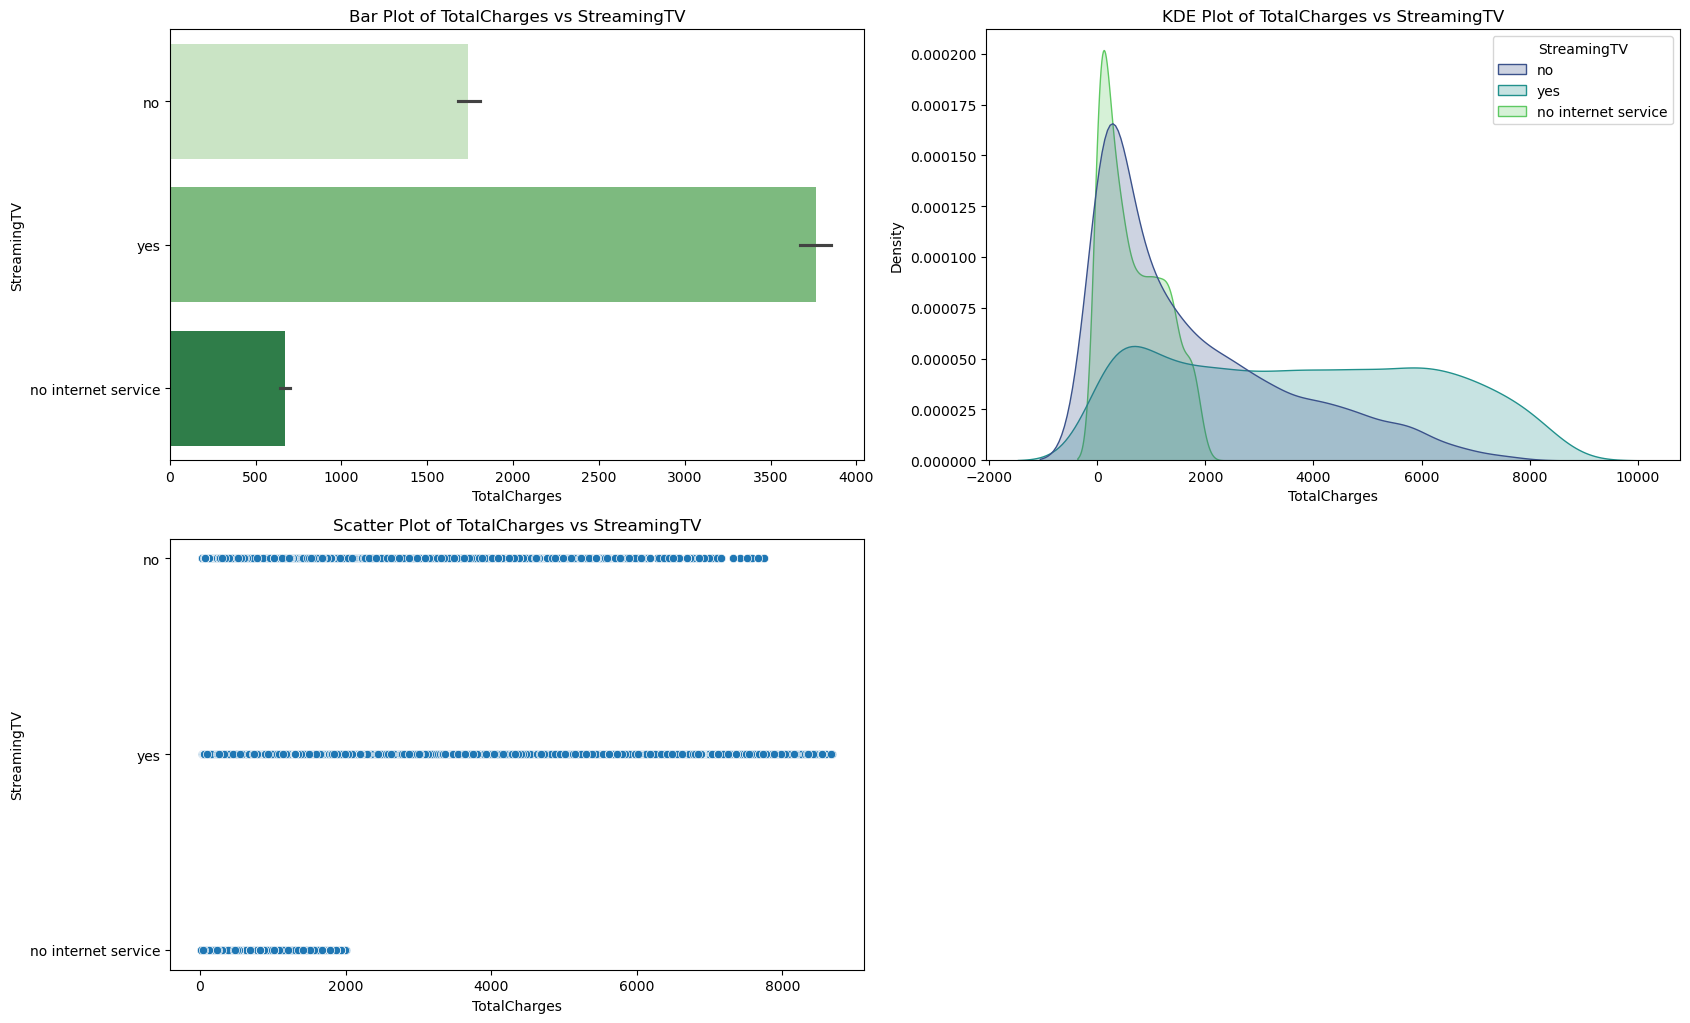

In [67]:
cat_num(df, num_cols, "StreamingTV")

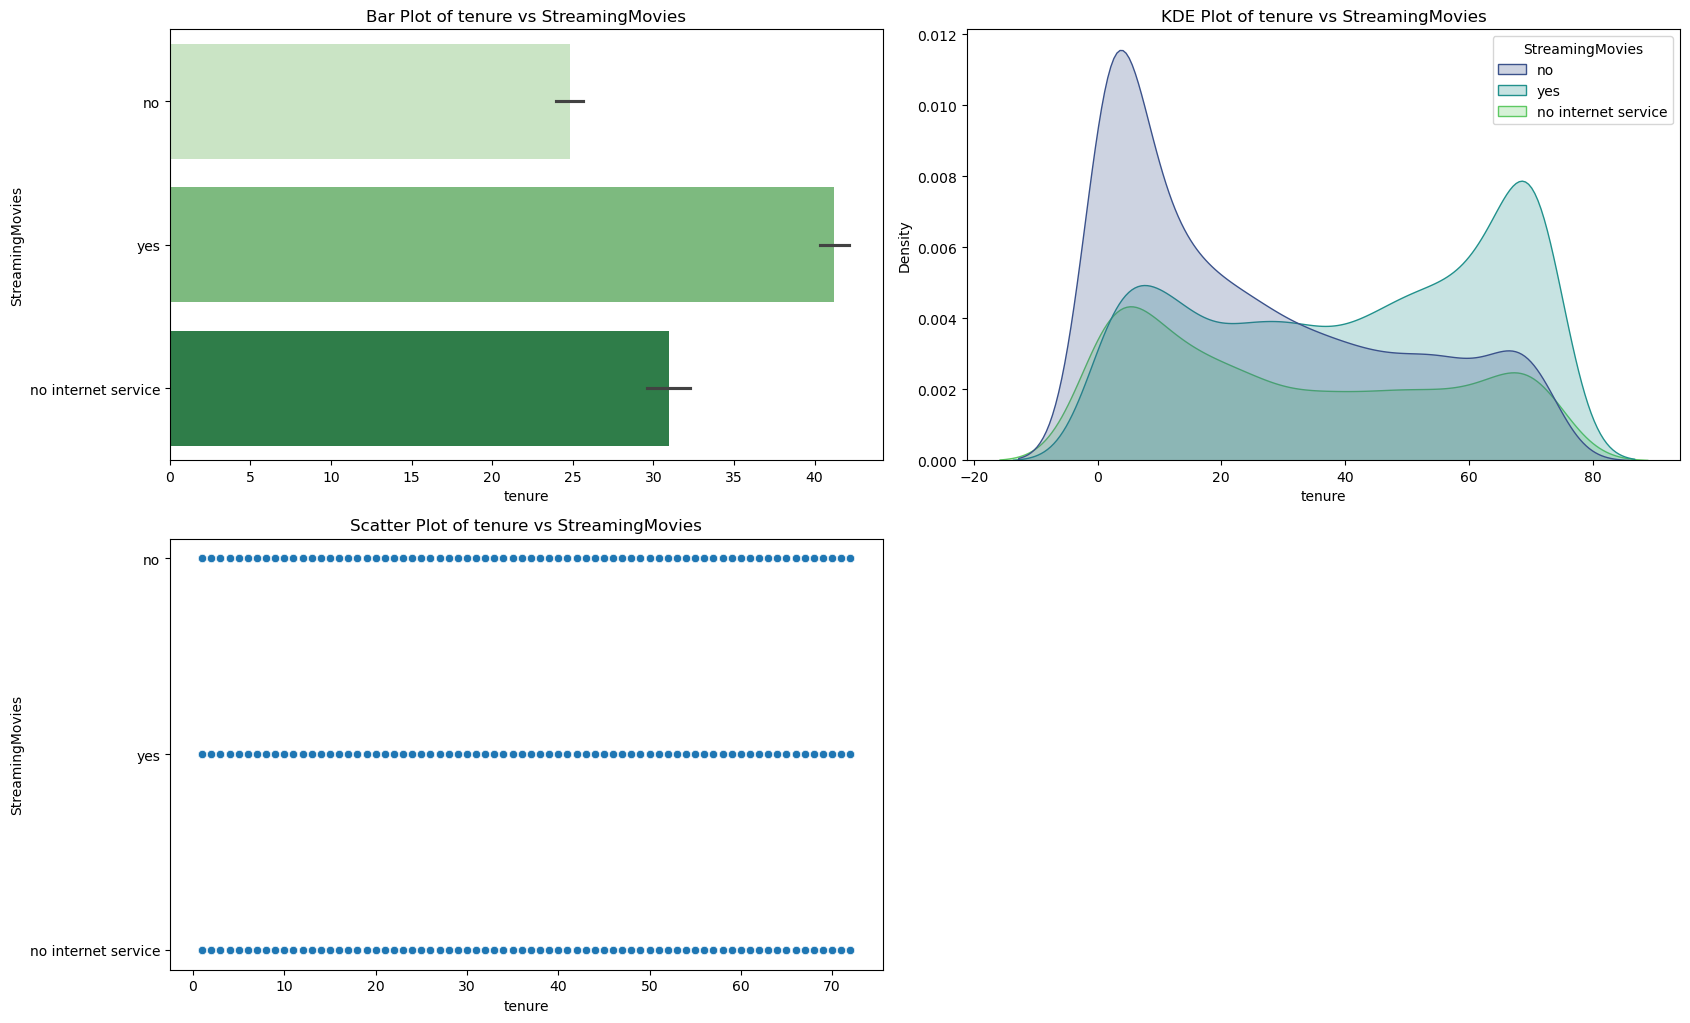

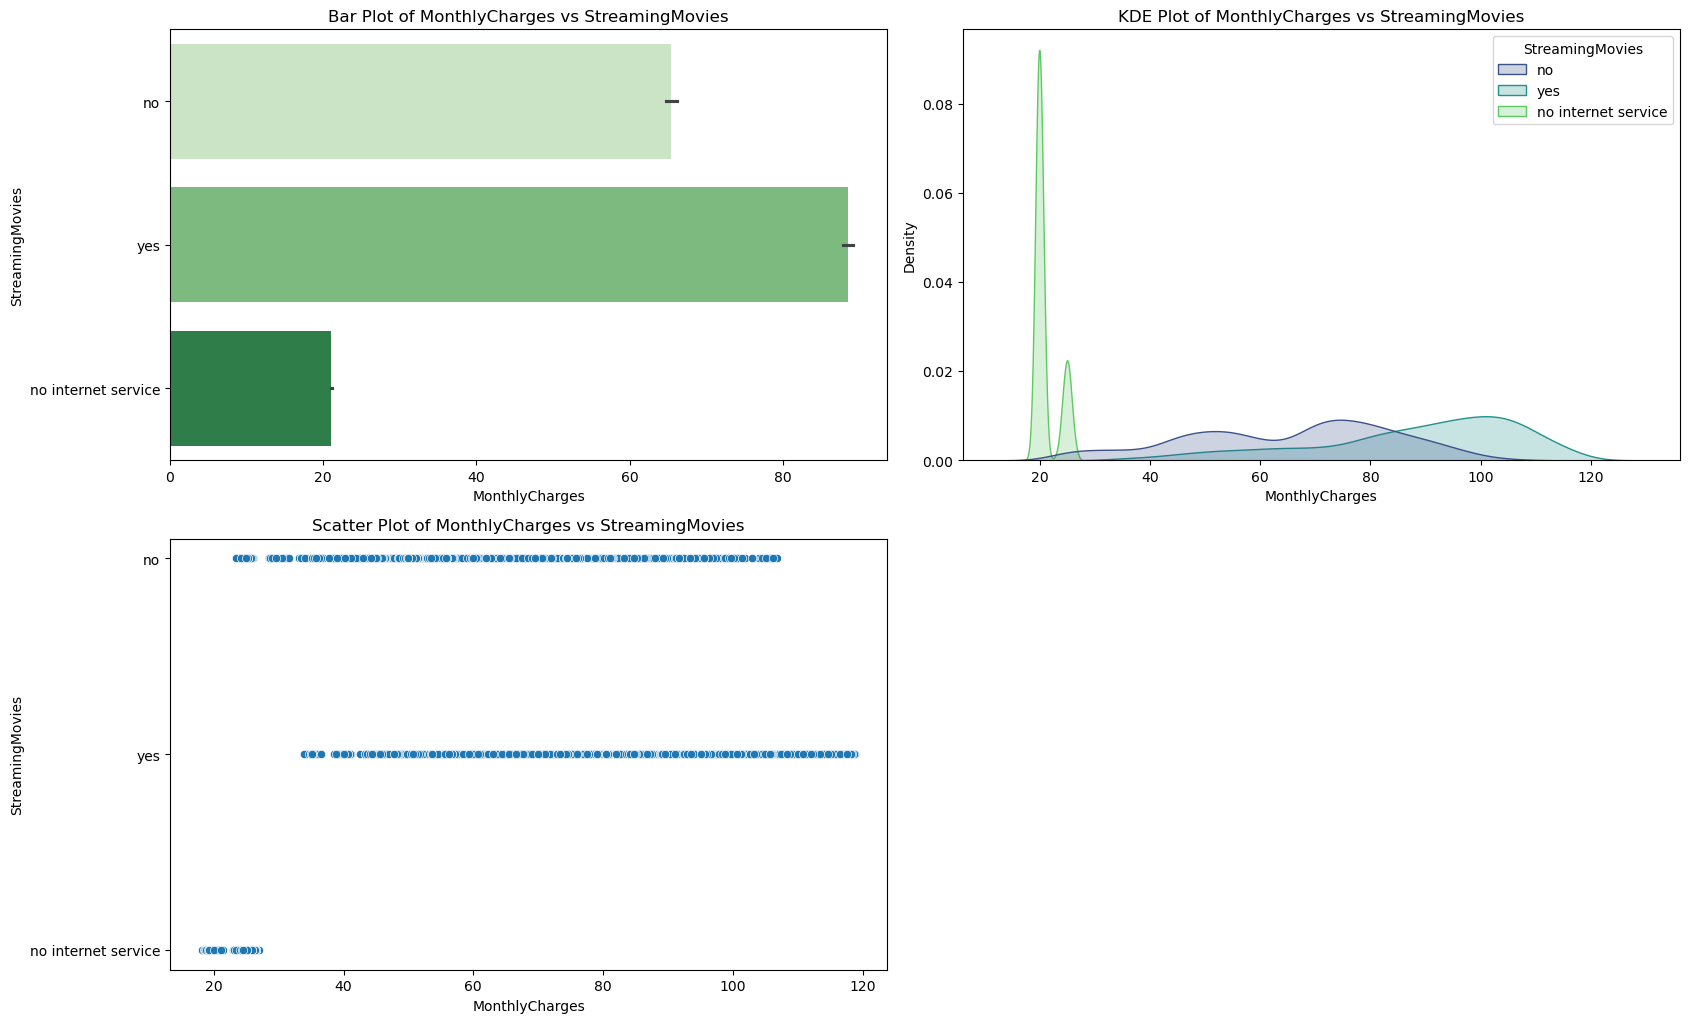

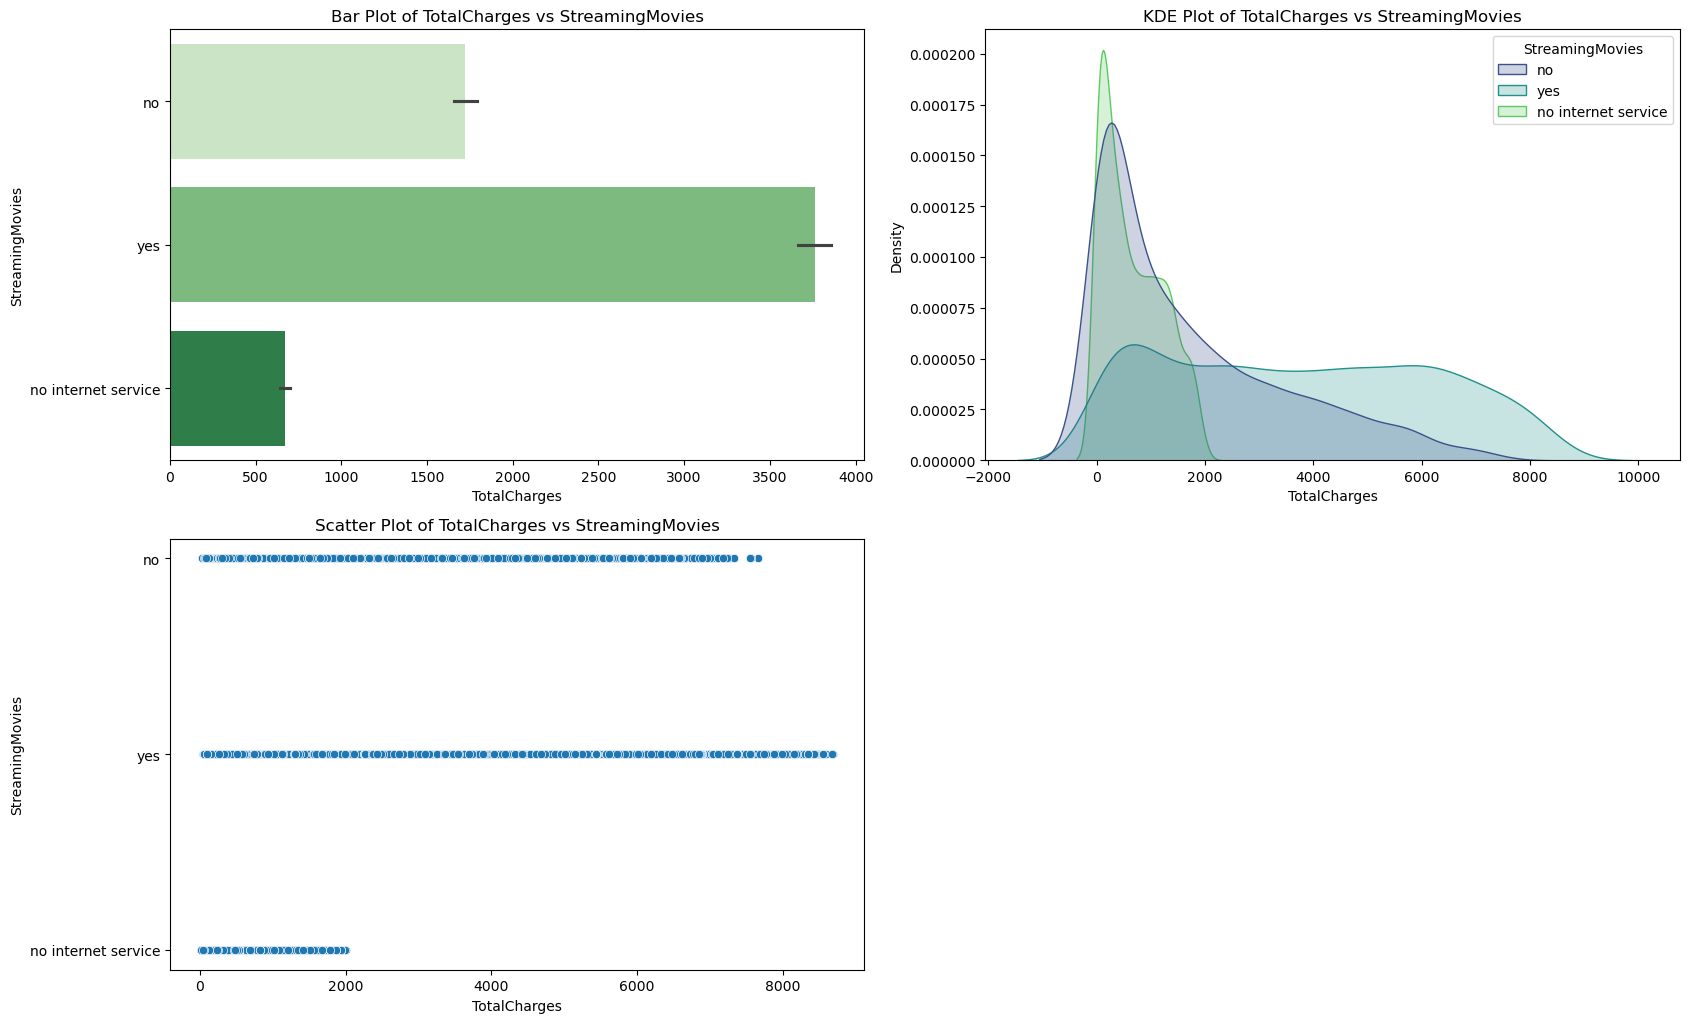

In [68]:
cat_num(df, num_cols, "StreamingMovies")

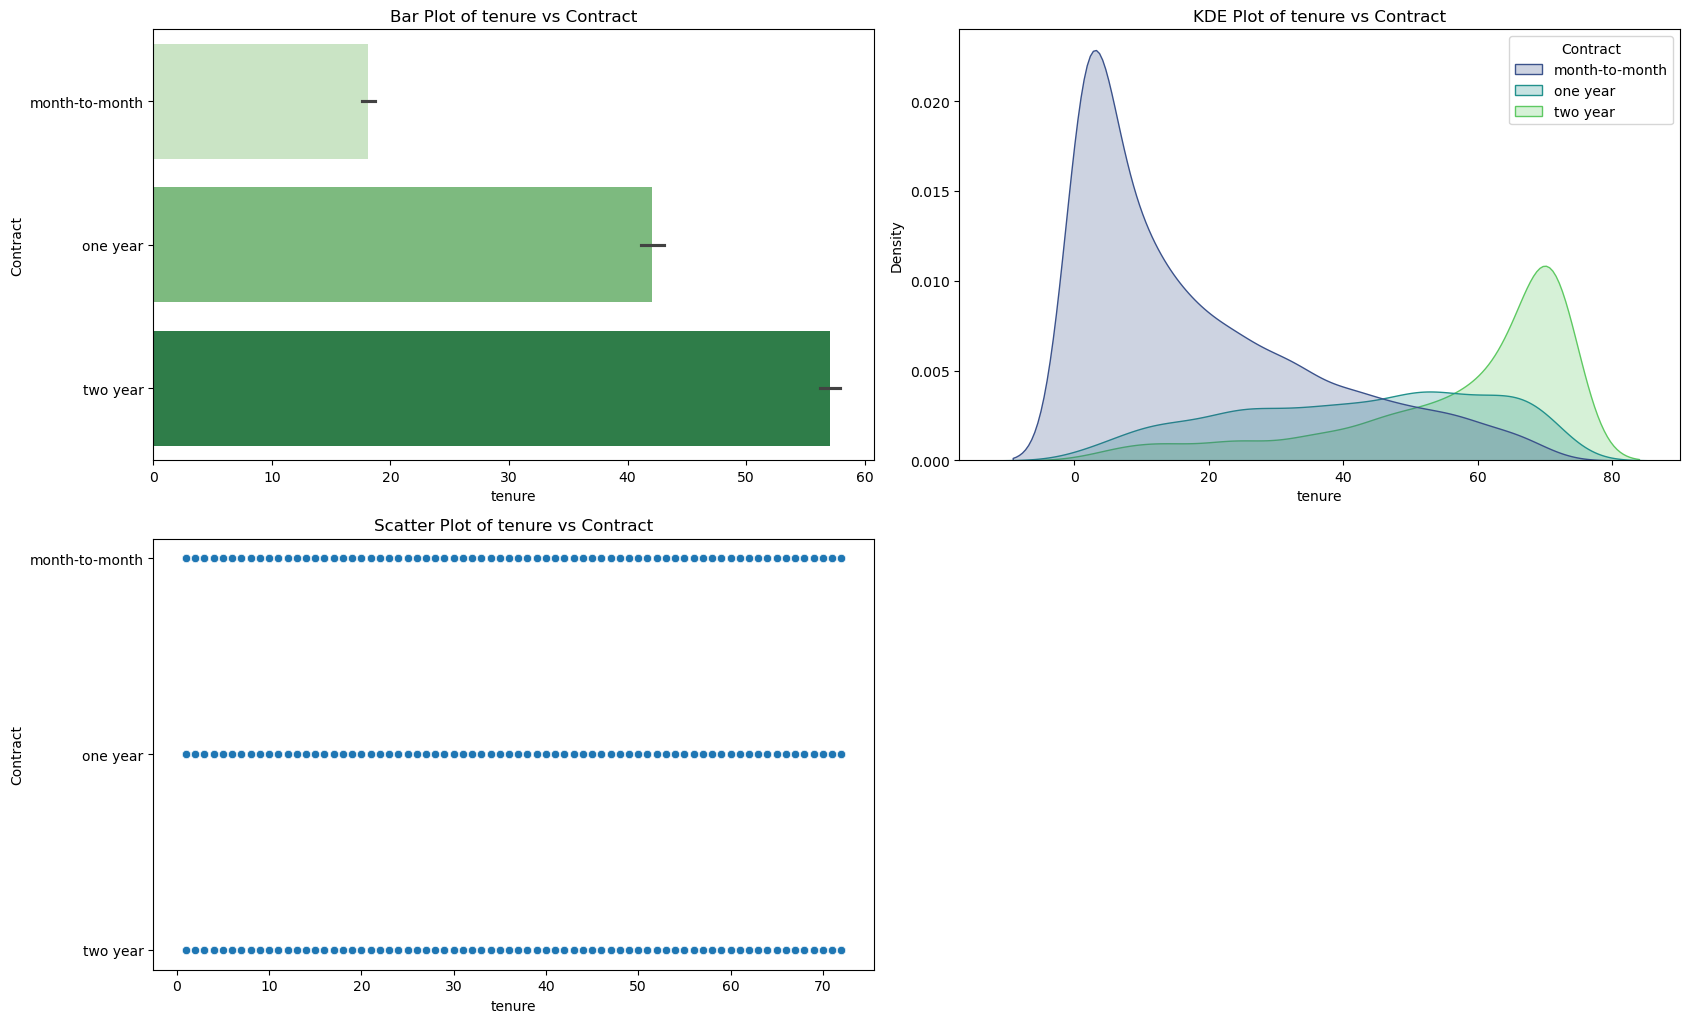

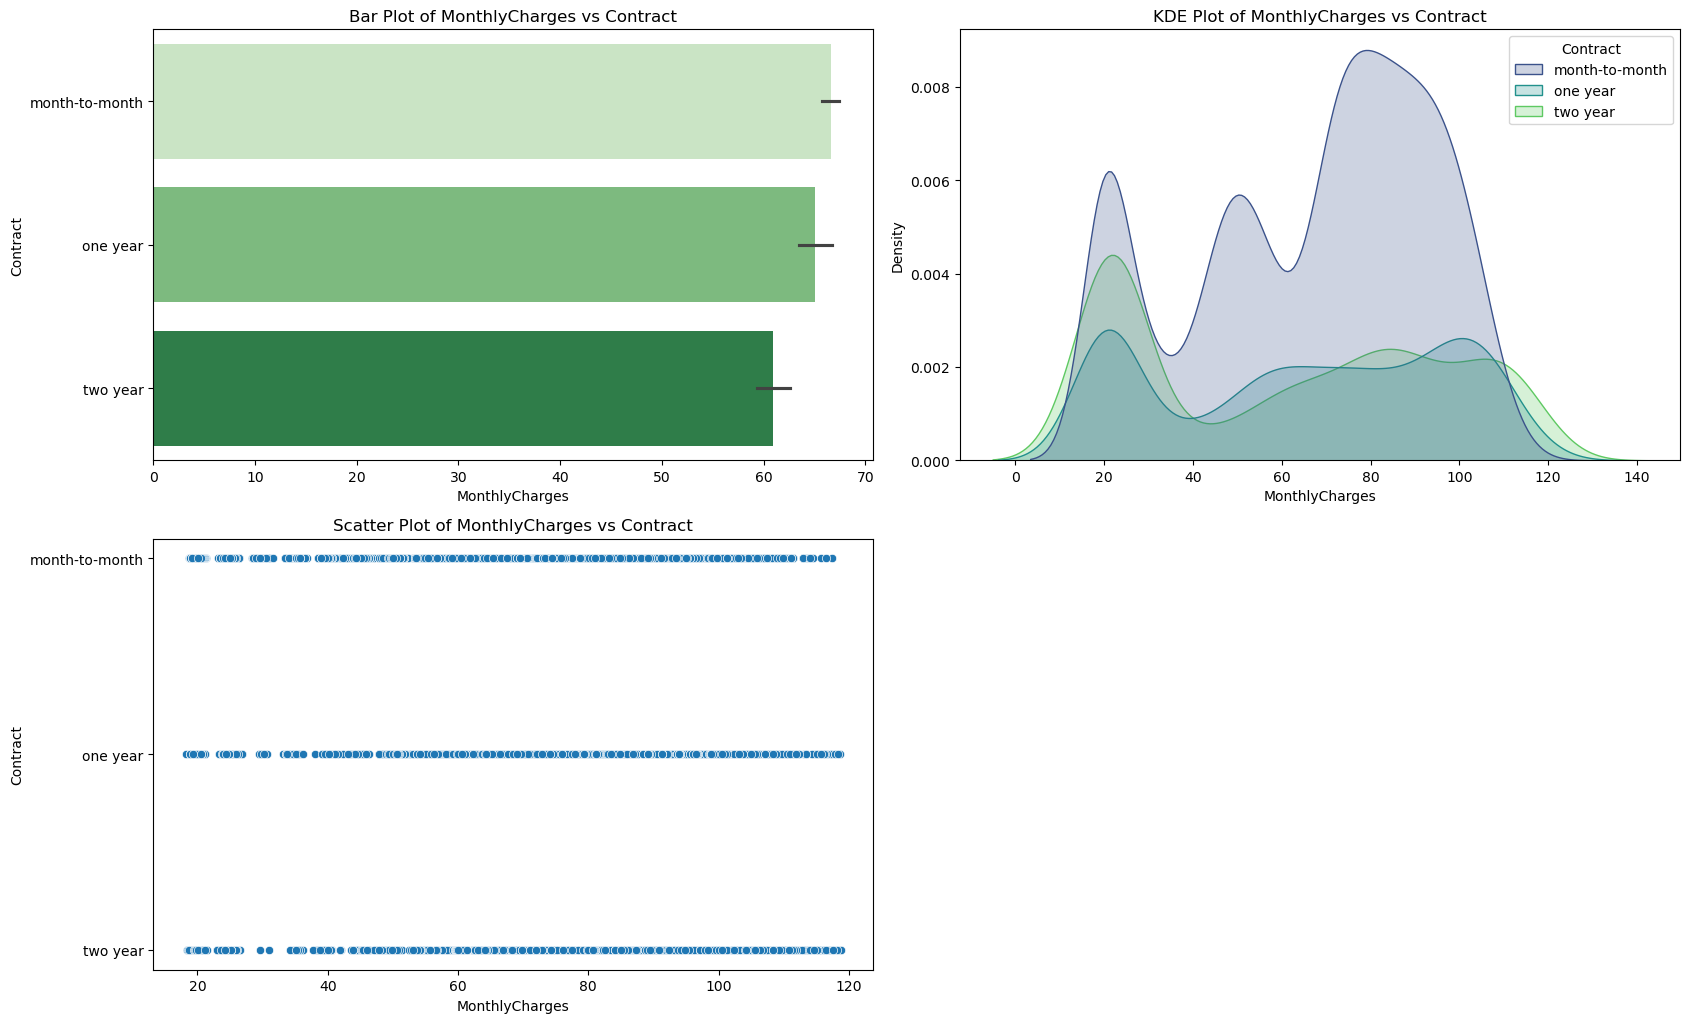

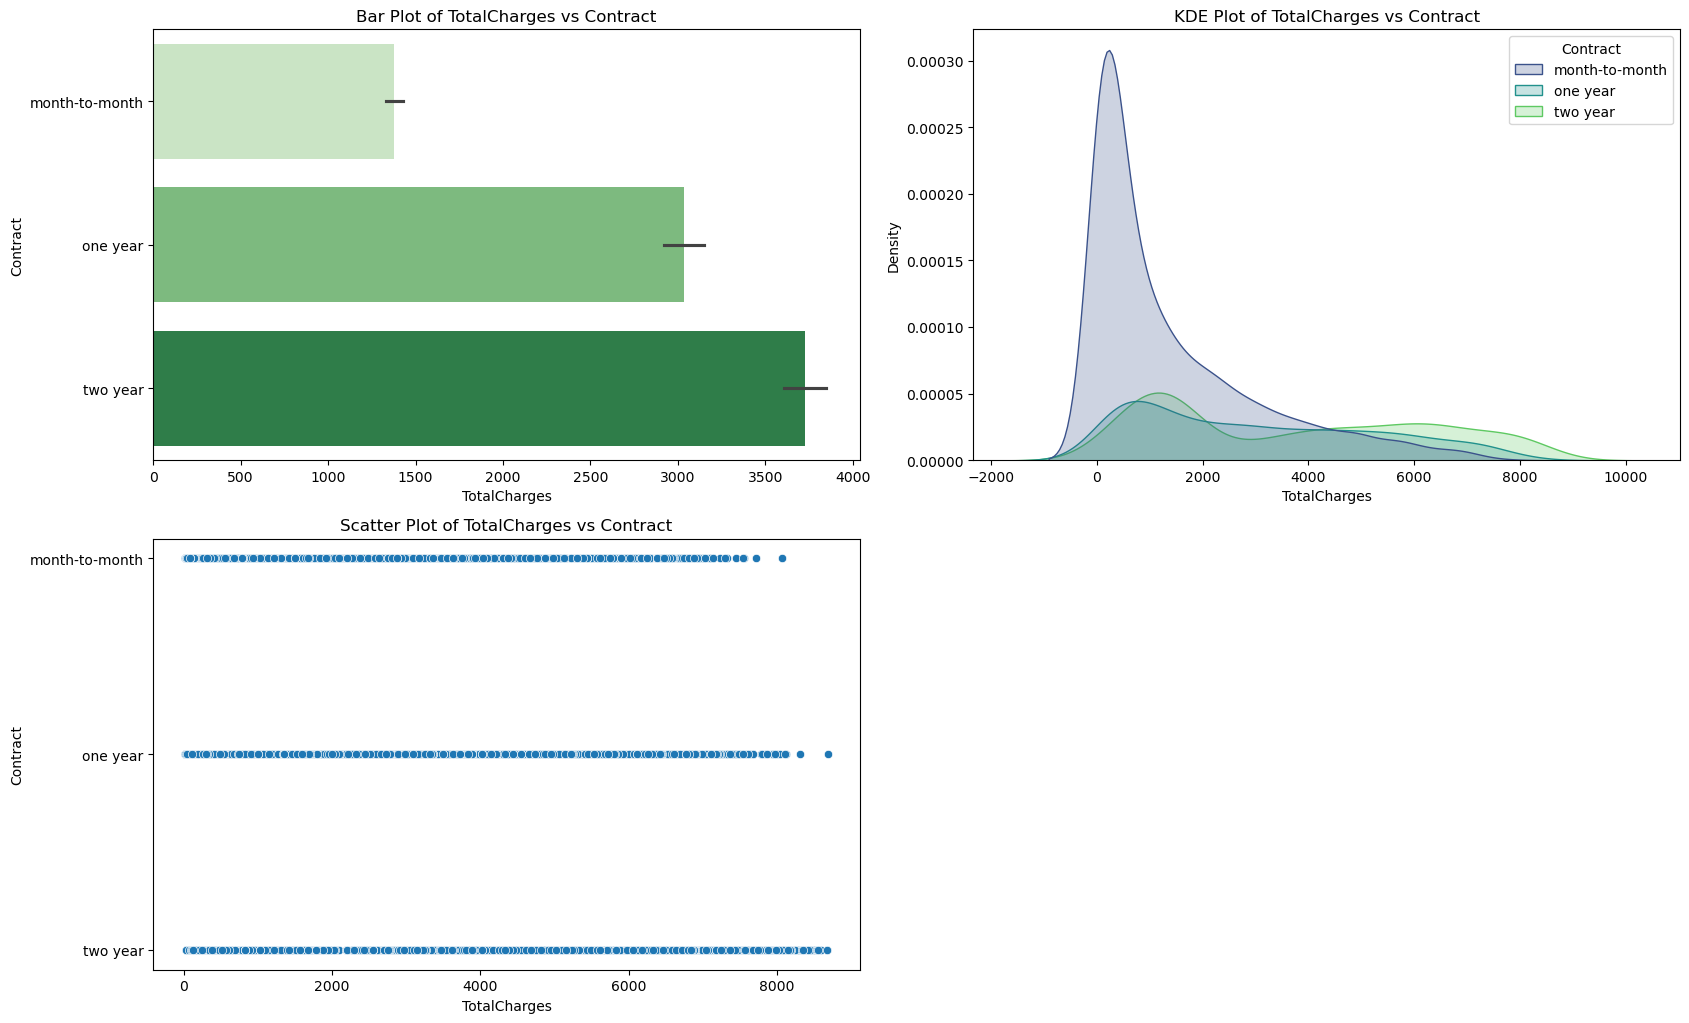

In [69]:
cat_num(df, num_cols, "Contract")

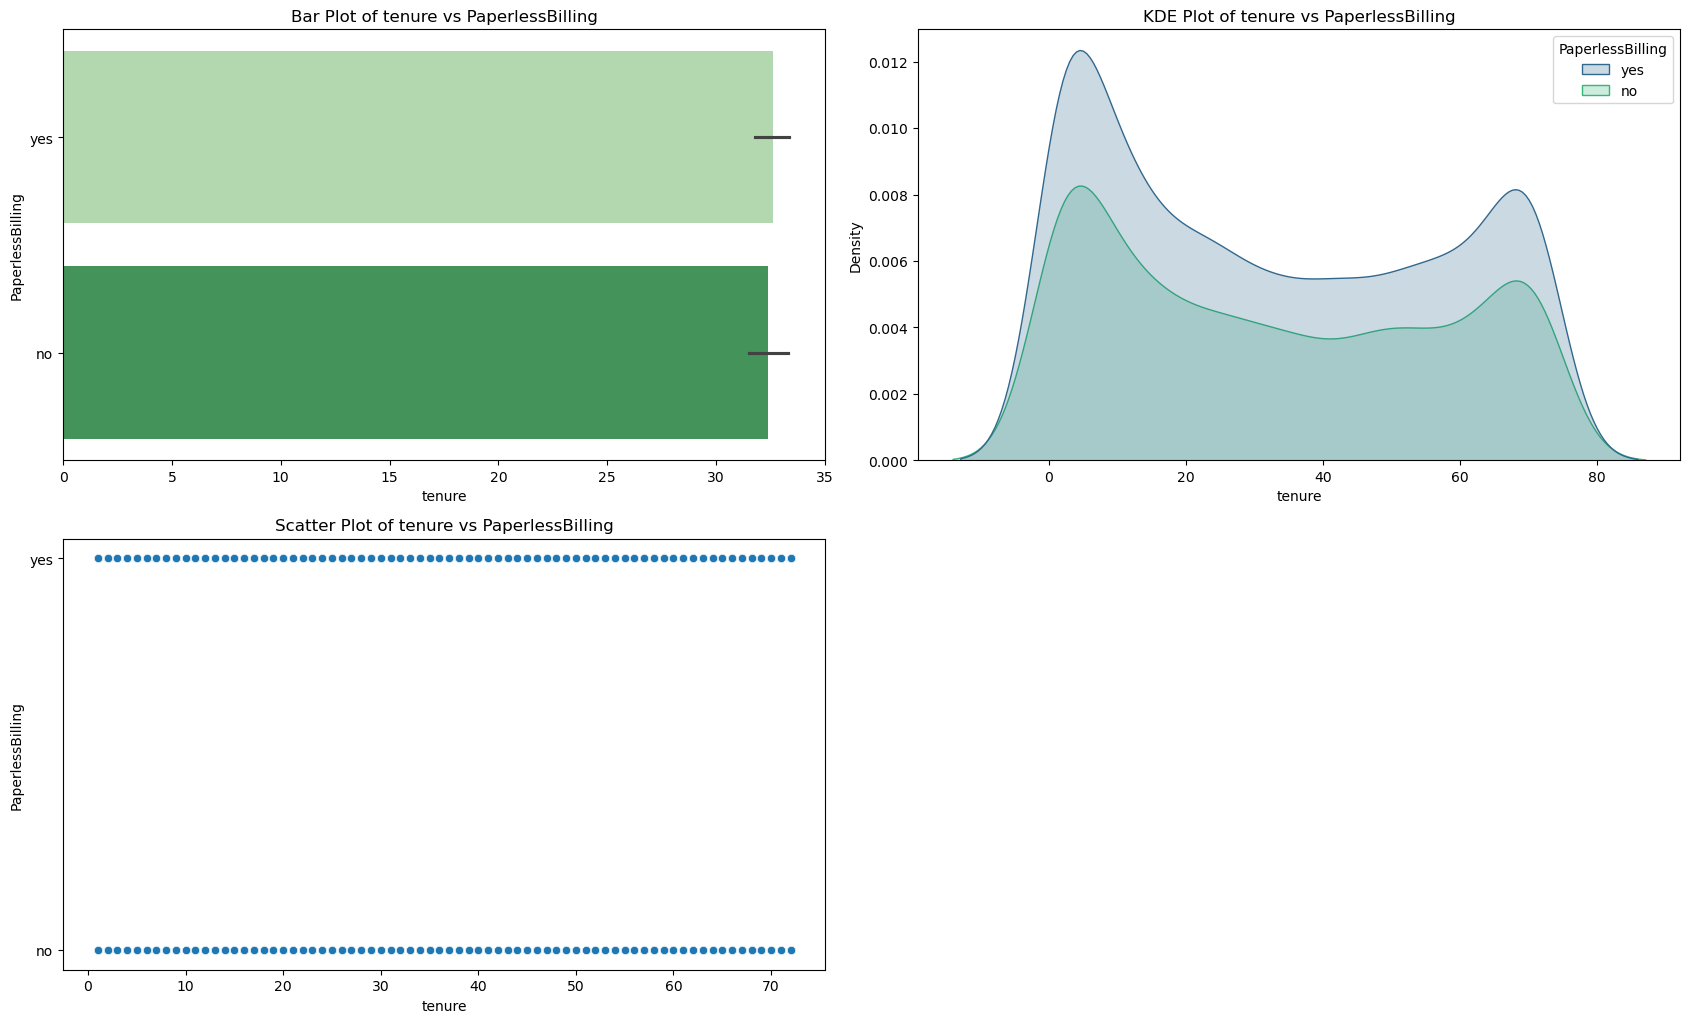

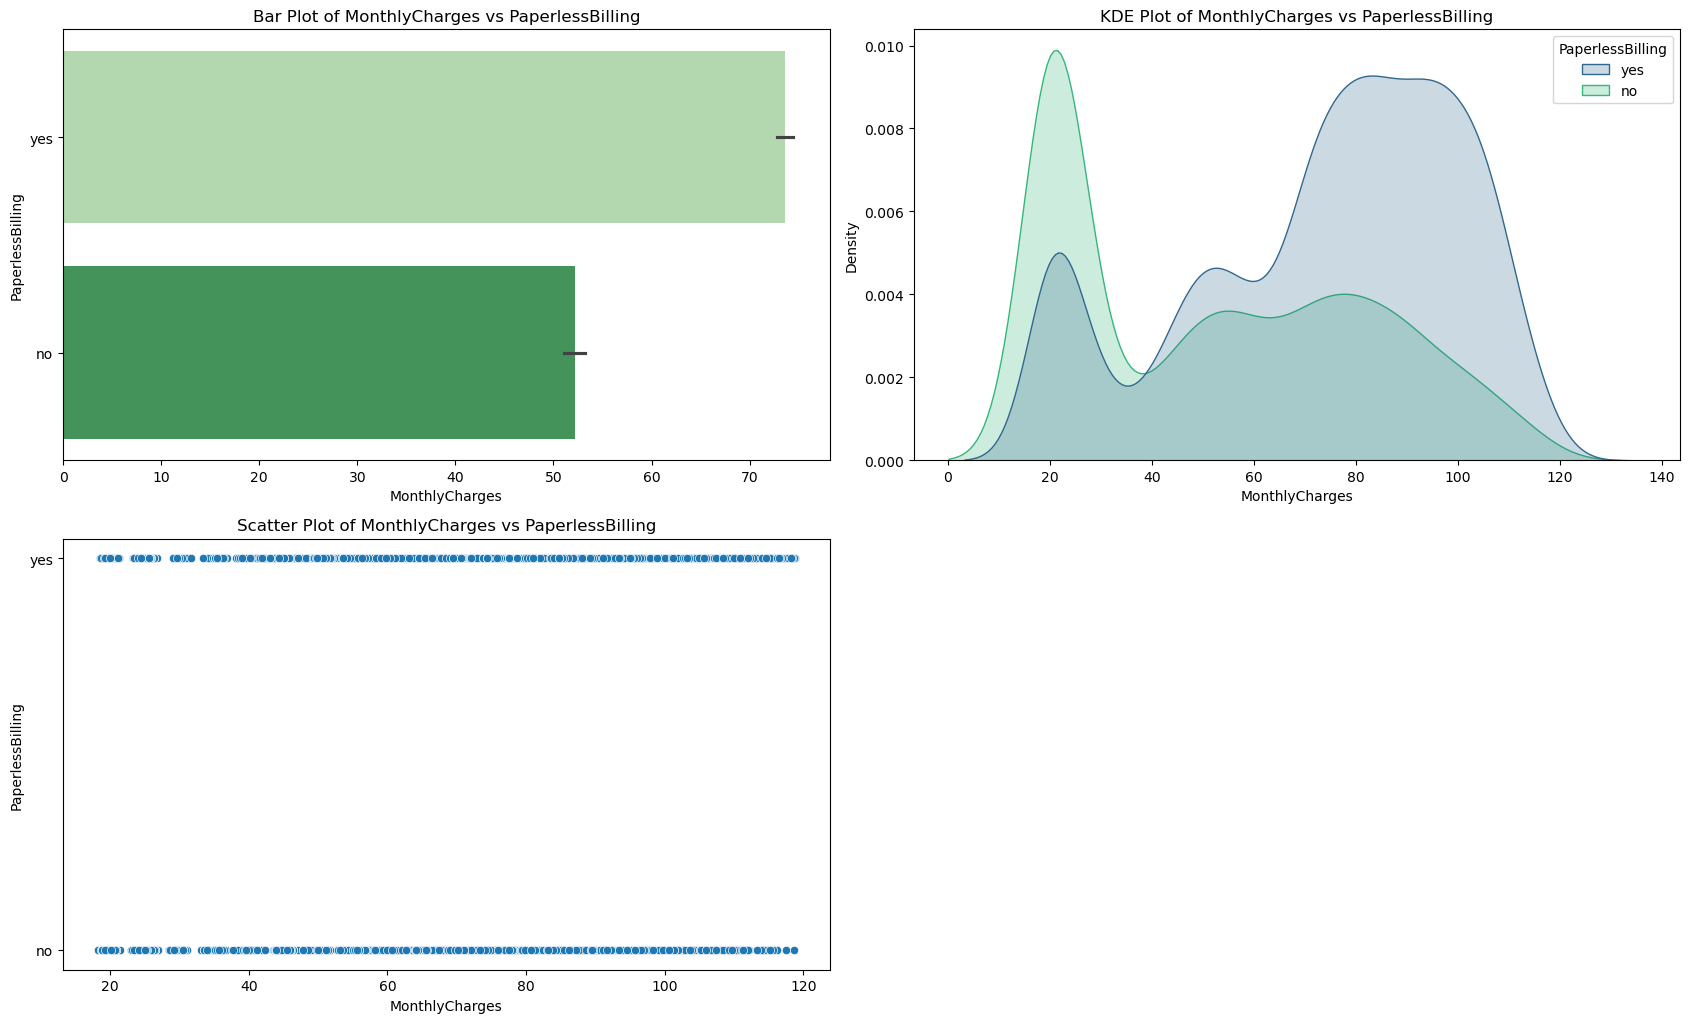

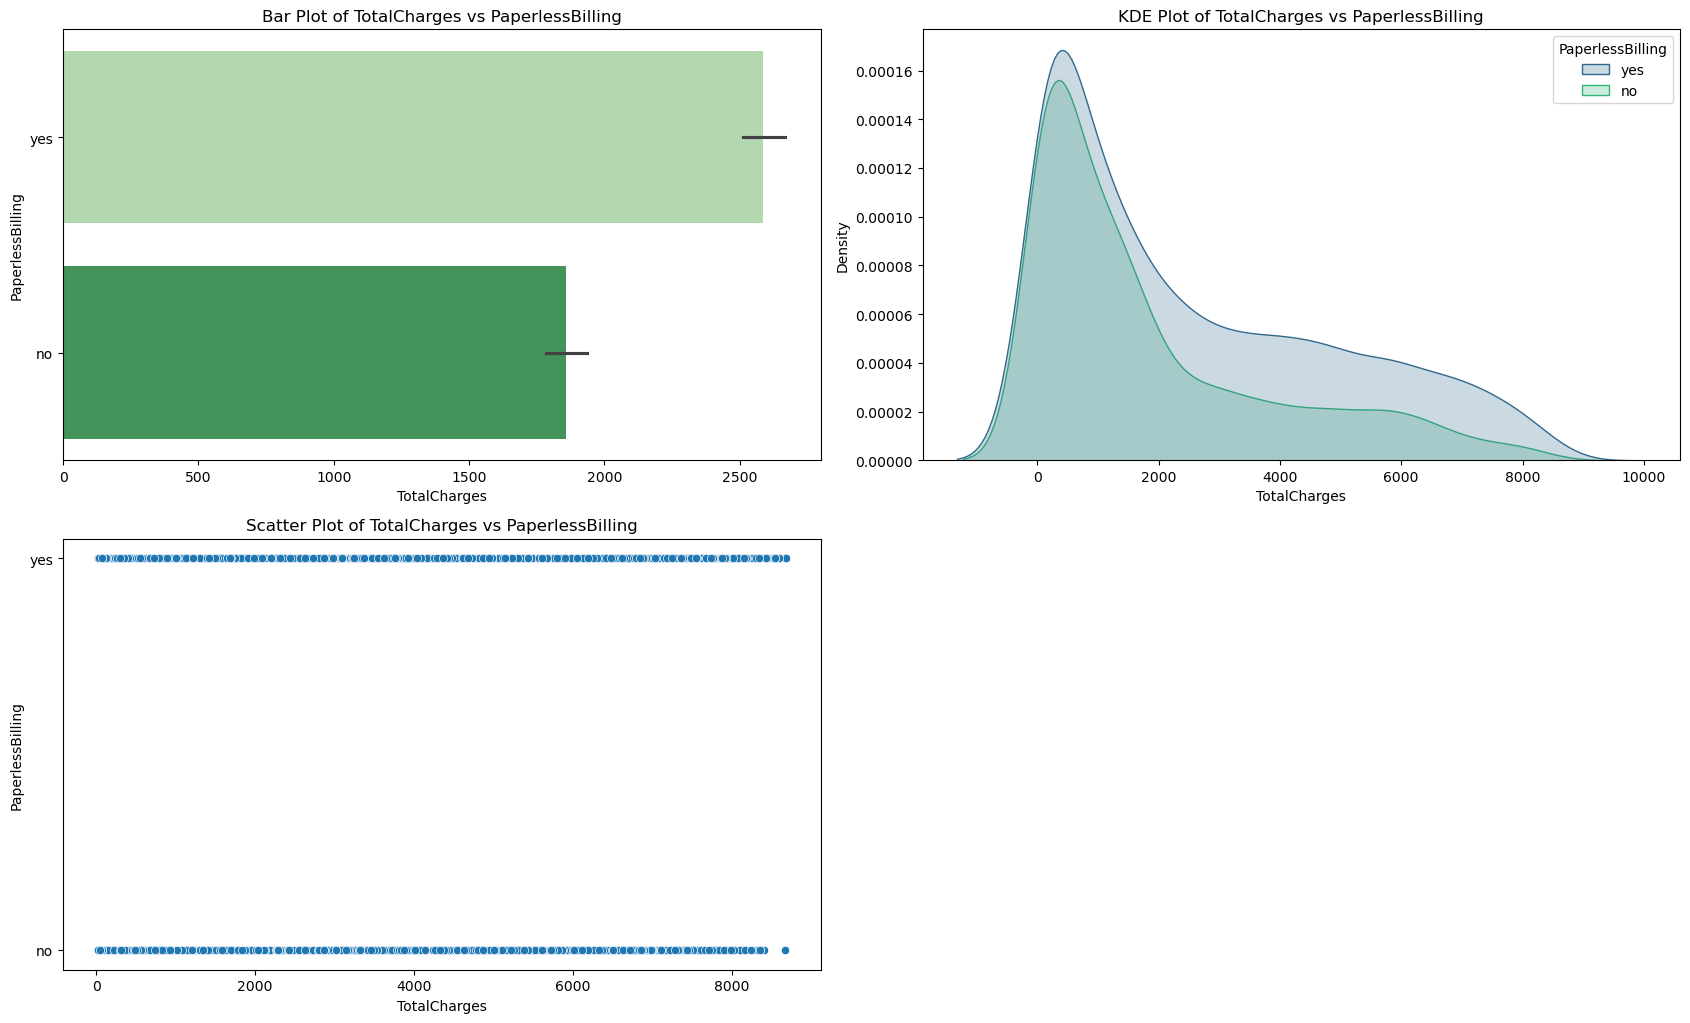

In [70]:
cat_num(df, num_cols, "PaperlessBilling")

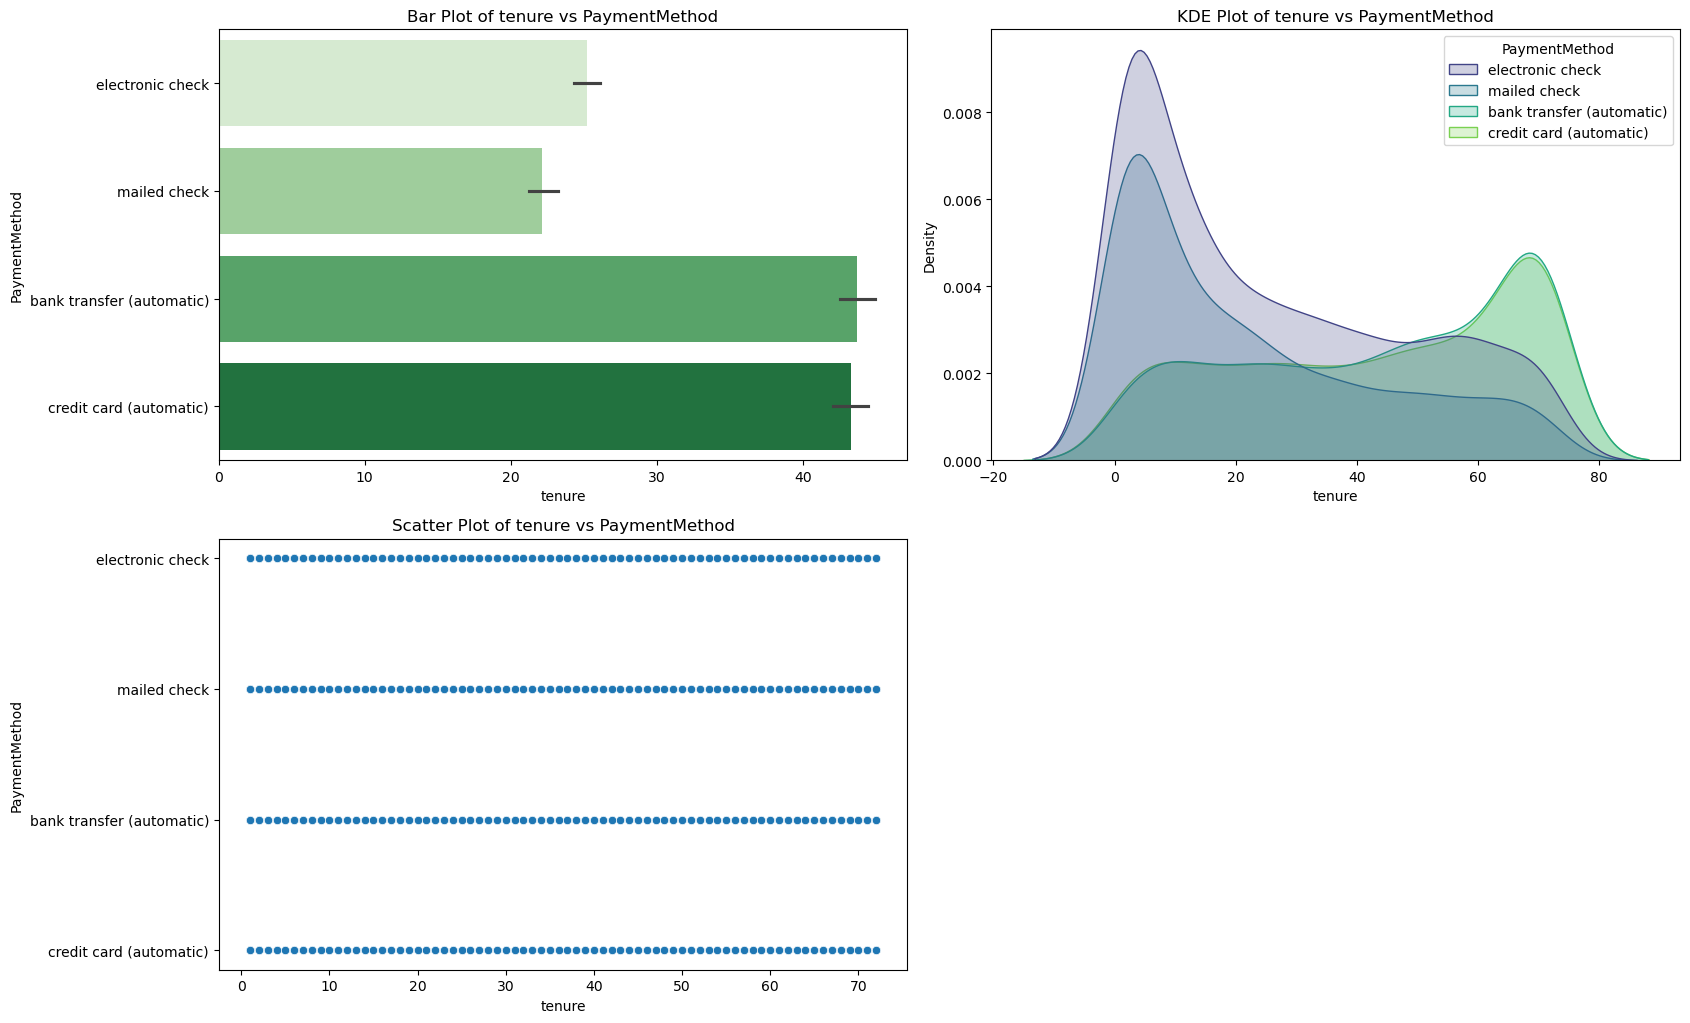

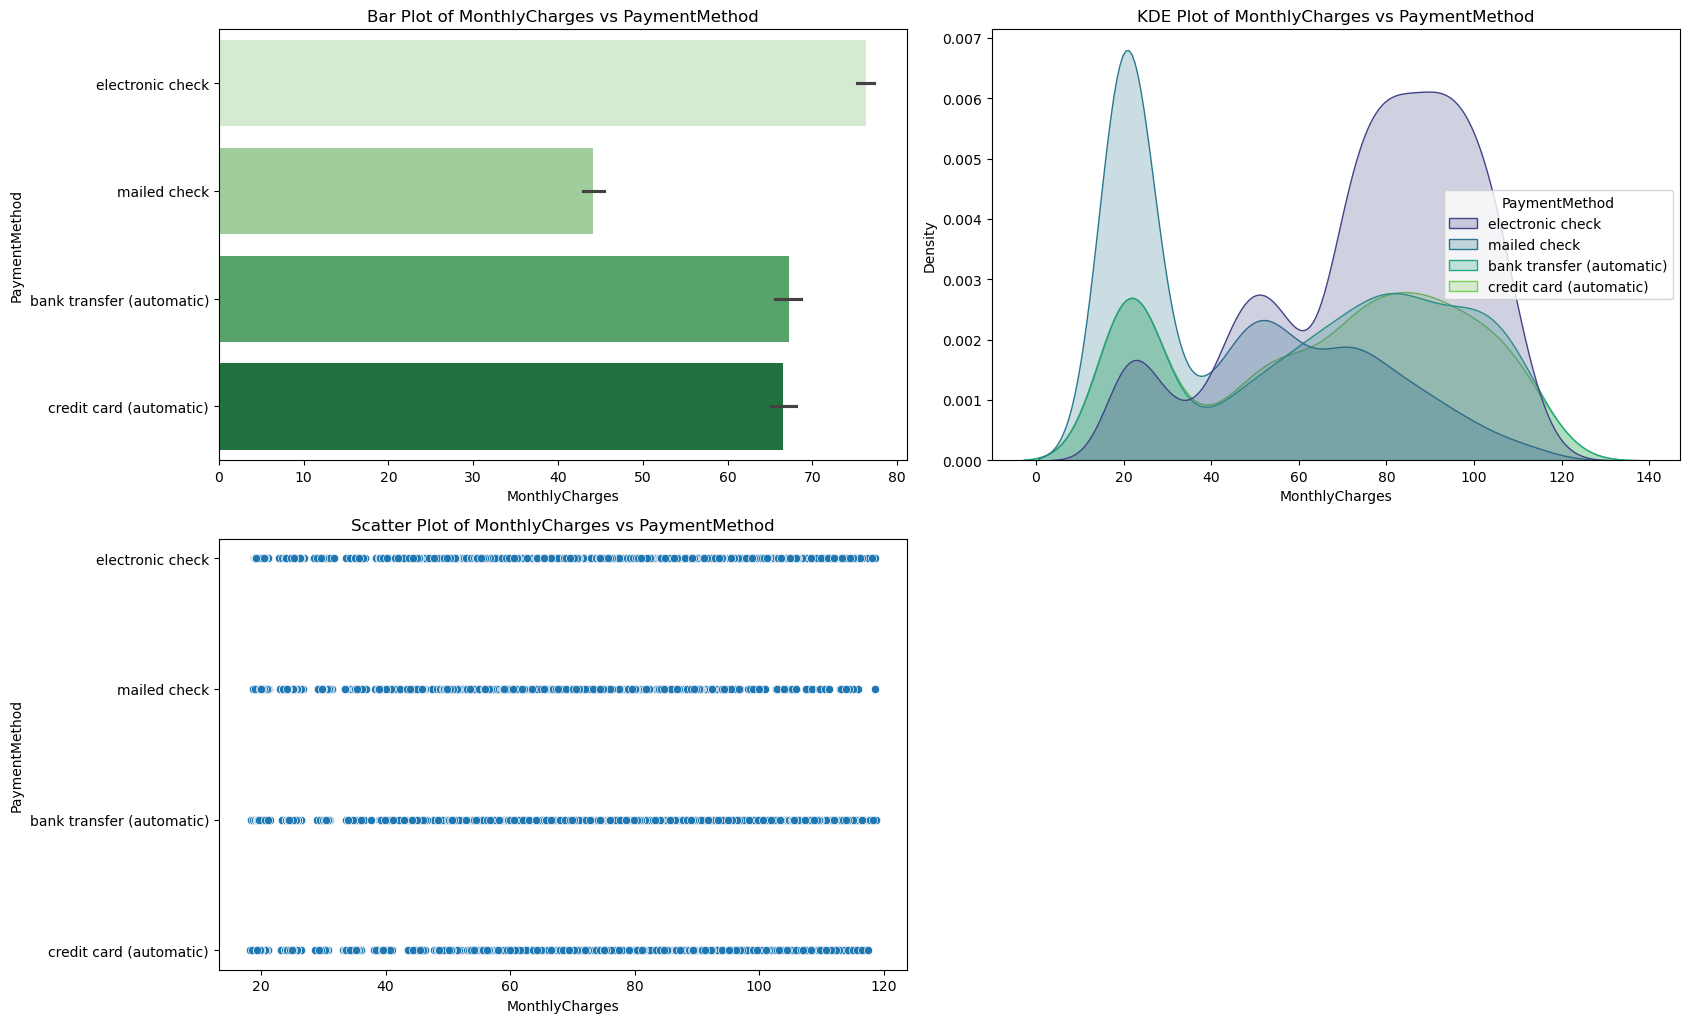

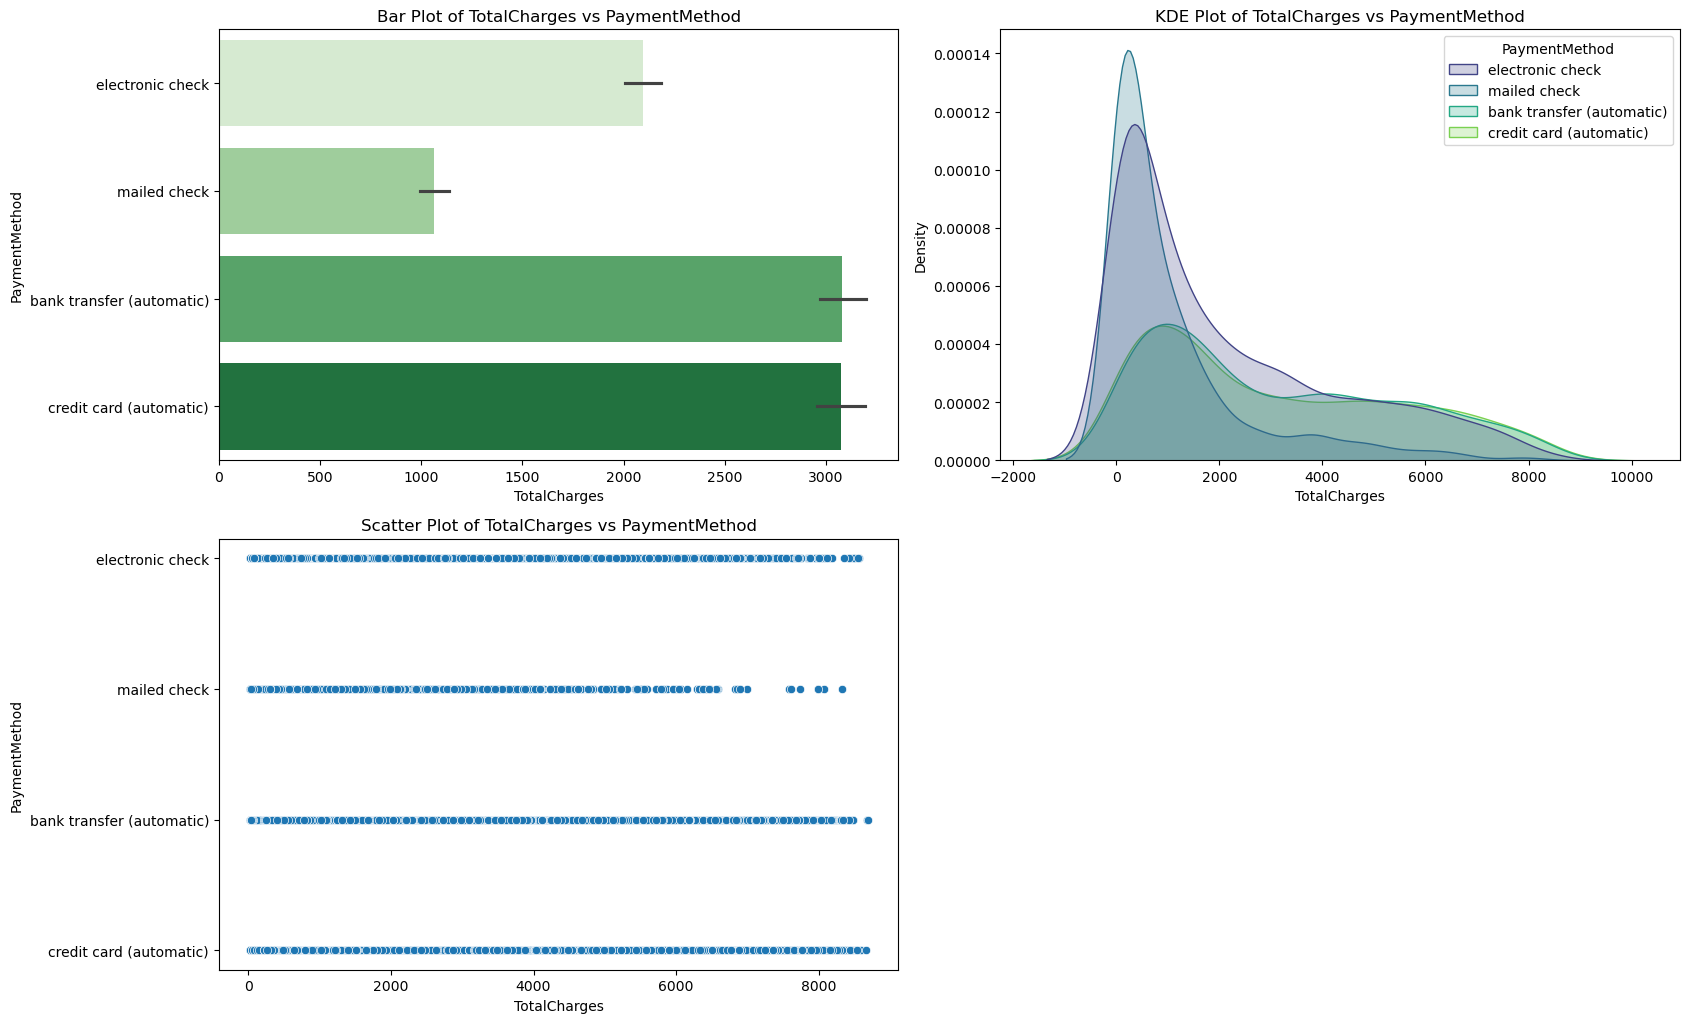

In [71]:
cat_num(df, num_cols, "PaymentMethod")

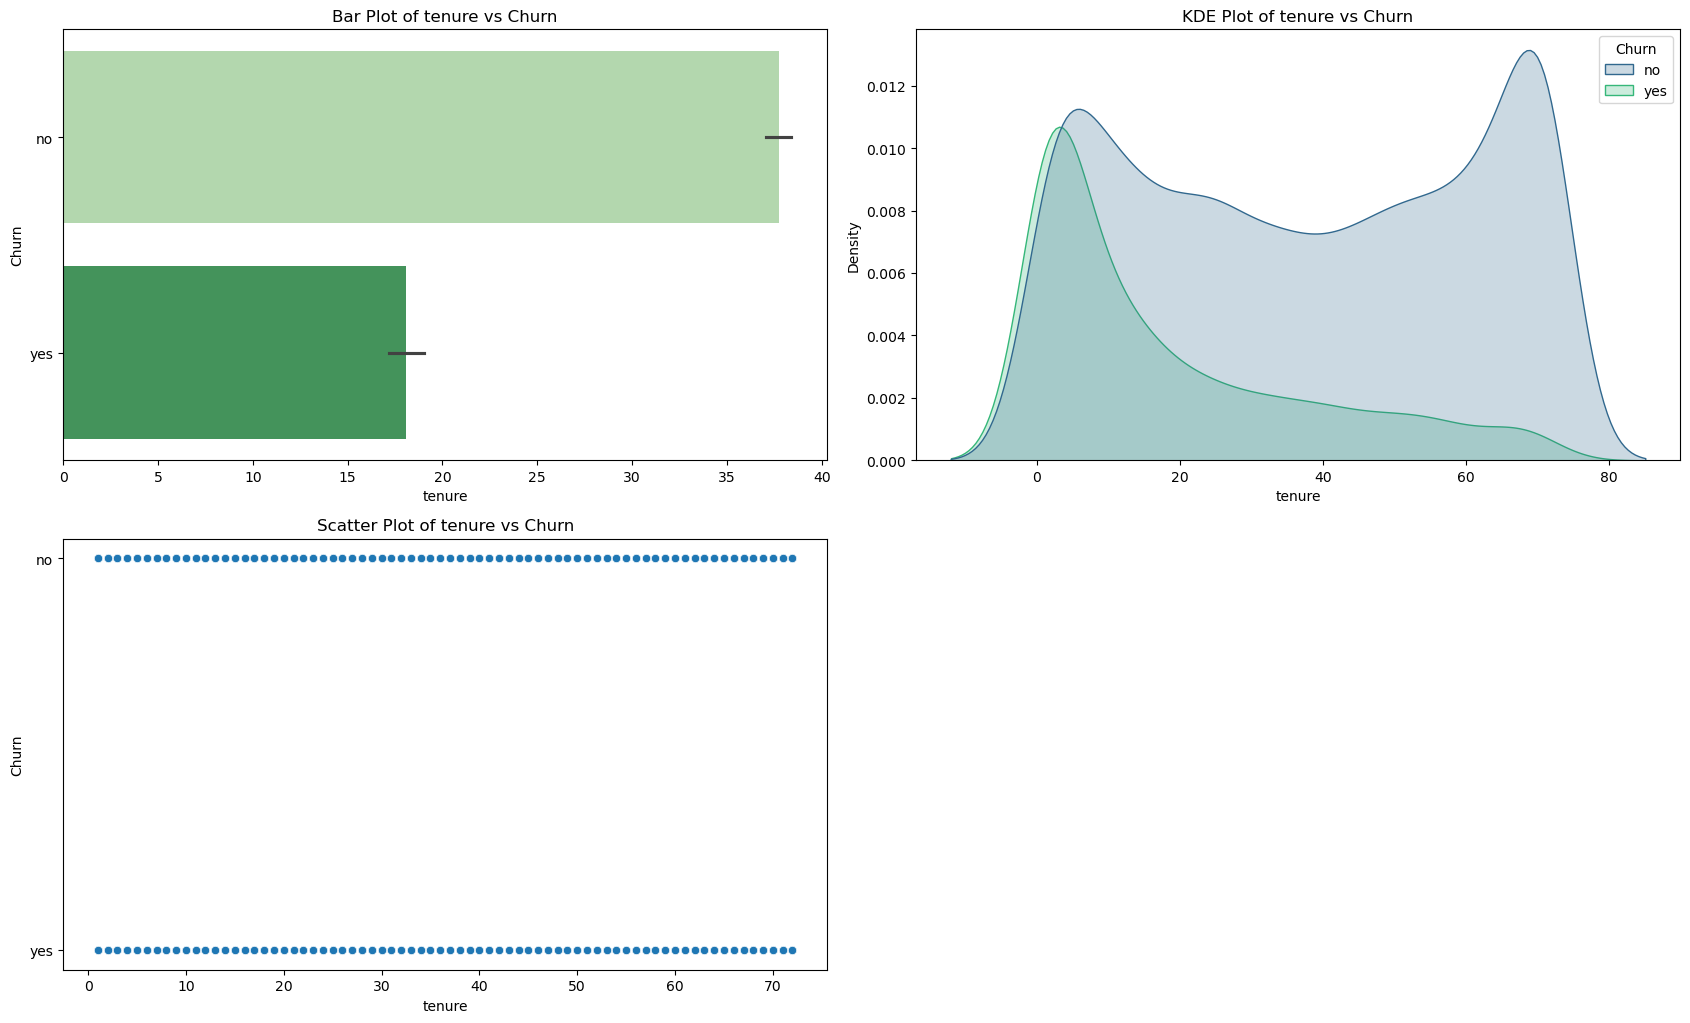

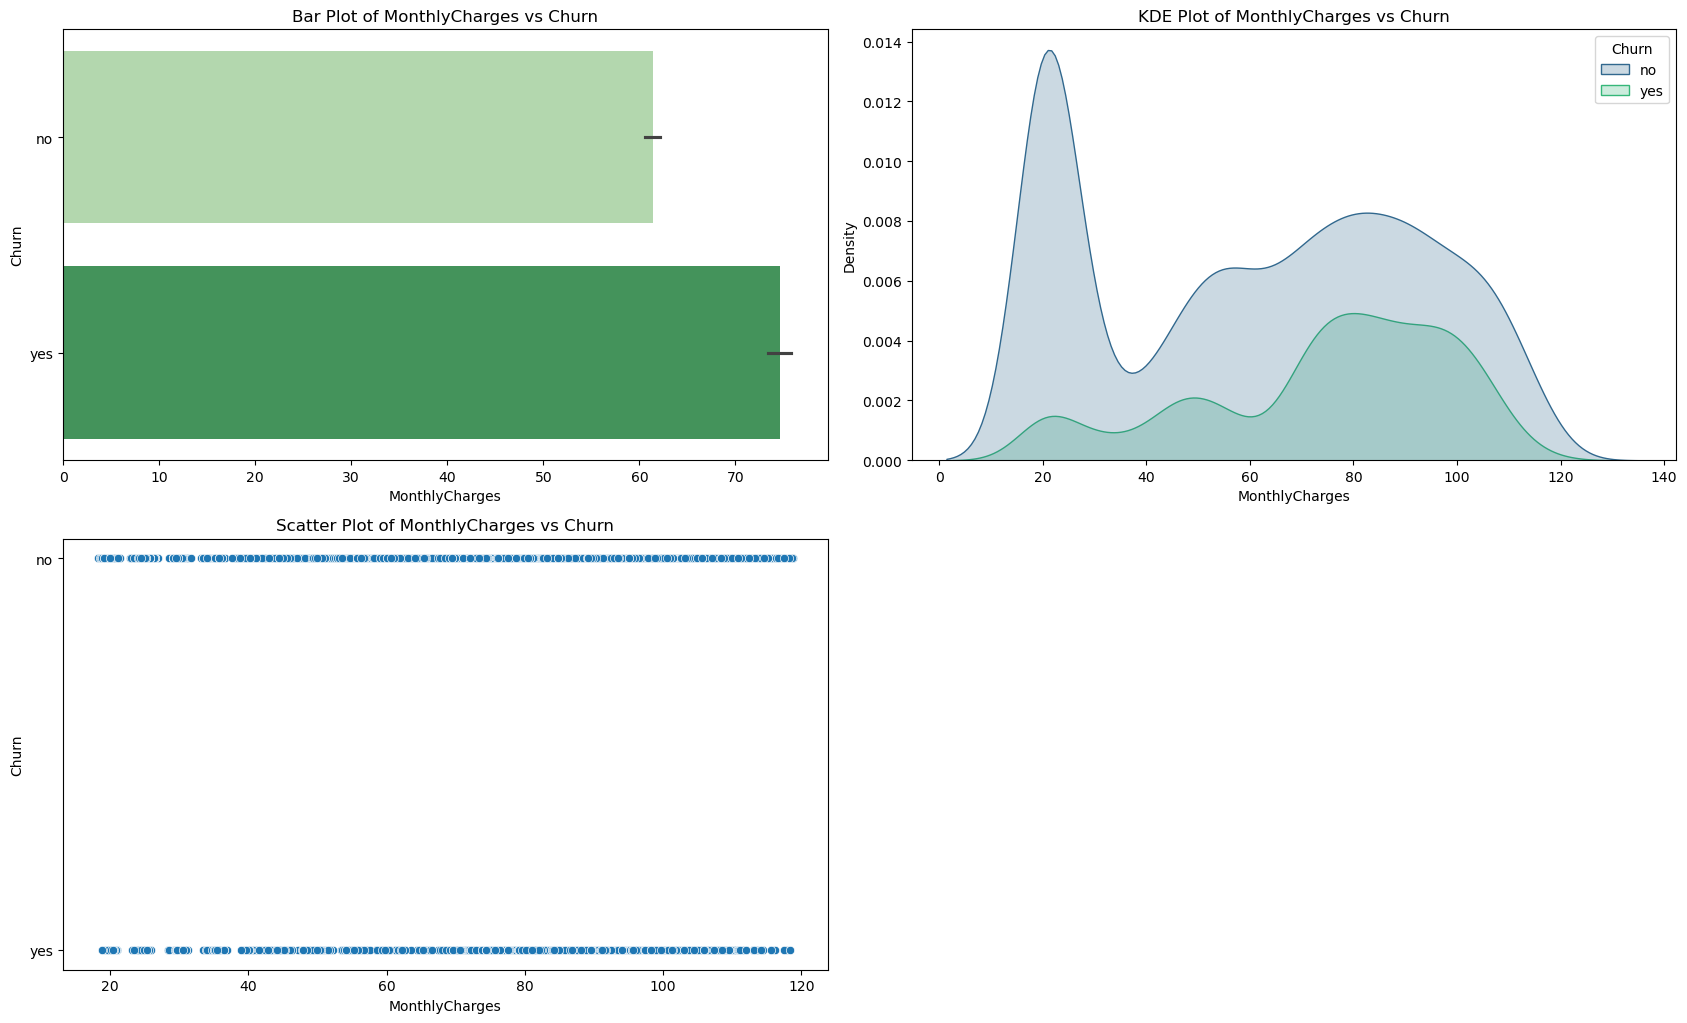

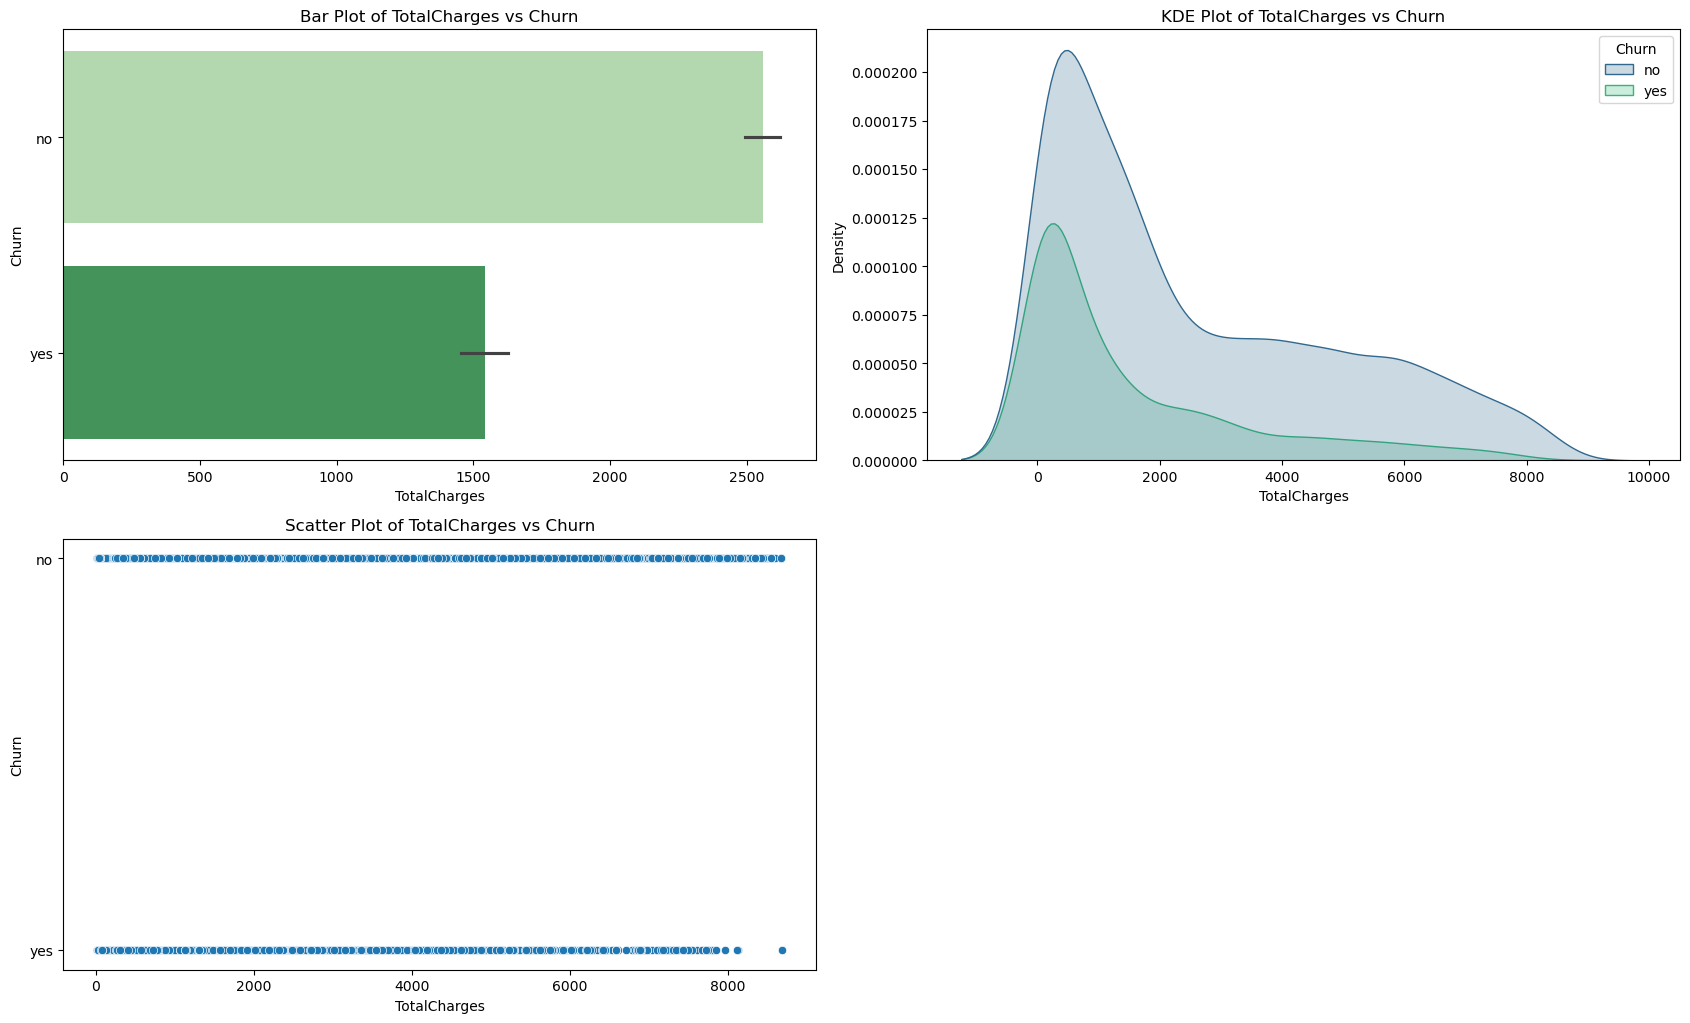

In [72]:
cat_num(df, num_cols, "Churn")

## Categorical vs Categorical

In [73]:
def cat_cat(df , col1 , col2 , head = 10):
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    top_values = contingency_table.sum(axis=1).nlargest(head).index
    contingency_table = contingency_table.loc[top_values]
    
    contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100 # Convert contingency table to percentages
    print(contingency_table_percent)

    plt.figure(figsize = (15,6))


    #Heat Map
    plt.subplot(1,2,2)
    sns.heatmap(contingency_table_percent , annot = True , fmt = '.2f' , cmap = 'Greens' , linecolor="black", linewidths=0.1, cbar_kws = {'label' : 'Percentage'})
    plt.xlabel(f'{col2}')
    plt.ylabel(f'{col1}')
    plt.title(f'Heatmap of {col1} vs {col2}')
    plt.show()

Churn                 no        yes
SeniorCitizen                      
no             76.452547  23.547453
yes            58.369851  41.630149


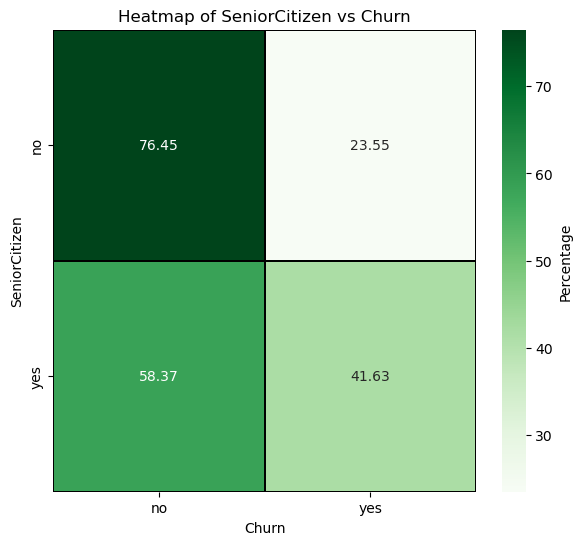

In [74]:
cat_cat(df,"SeniorCitizen", "Churn")   

Churn          no        yes
gender                      
male    73.889675  26.110325
female  73.122302  26.877698


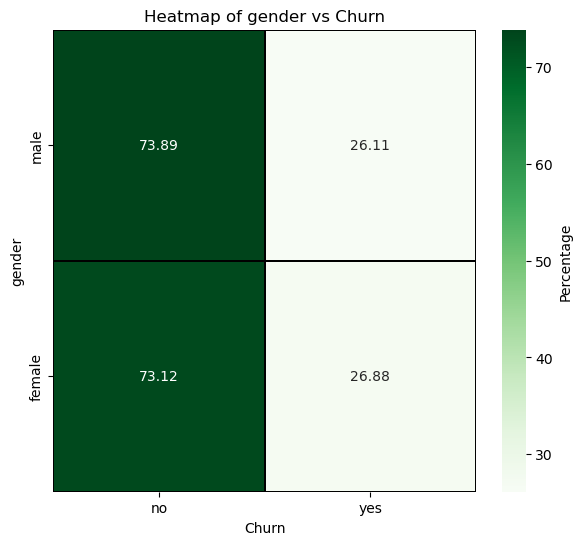

In [75]:
cat_cat(df,"gender", "Churn")

Churn           no        yes
Partner                      
no       67.155101  32.844899
yes      80.282935  19.717065


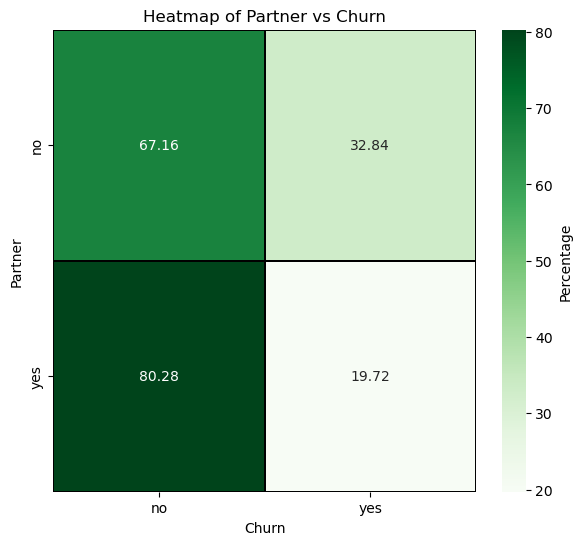

In [76]:
cat_cat(df,"Partner", "Churn")

Churn              no        yes
Dependents                      
no          68.825087  31.174913
yes         84.468795  15.531205


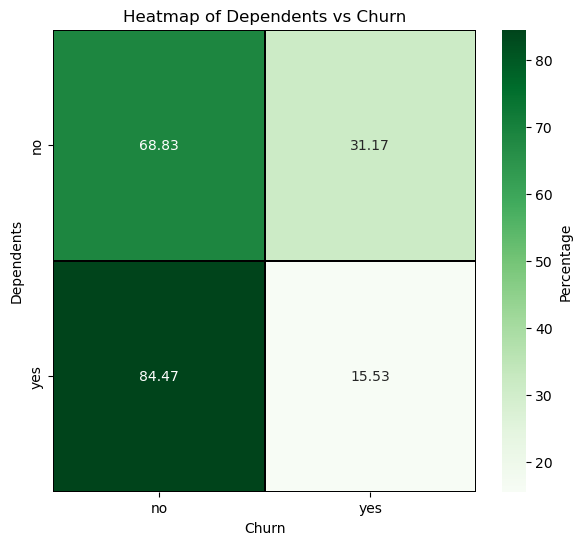

In [77]:
cat_cat(df,"Dependents", "Churn")

Churn                no        yes
PhoneService                      
yes           73.349131  26.650869
no            75.000000  25.000000


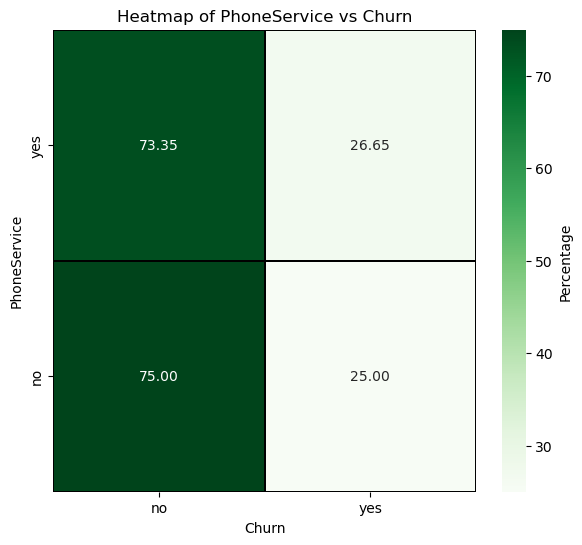

In [78]:
cat_cat(df,"PhoneService", "Churn")

Churn                    no        yes
MultipleLines                         
no                75.111508  24.888492
yes               71.351534  28.648466
no phone service  75.000000  25.000000


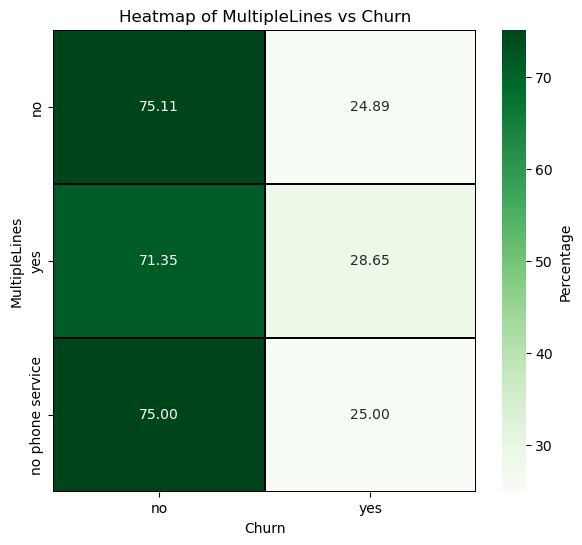

In [79]:
cat_cat(df,"MultipleLines", "Churn")

Churn                   no        yes
InternetService                      
fiber optic      58.220065  41.779935
dsl              81.068766  18.931234
no               92.762284   7.237716


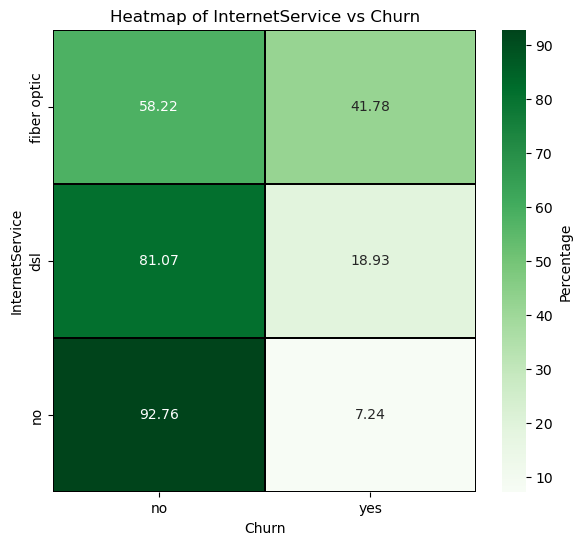

In [80]:
cat_cat(df,"InternetService", "Churn")

Churn                       no        yes
OnlineSecurity                           
no                   58.354829  41.645171
yes                  85.359801  14.640199
no internet service  92.762284   7.237716


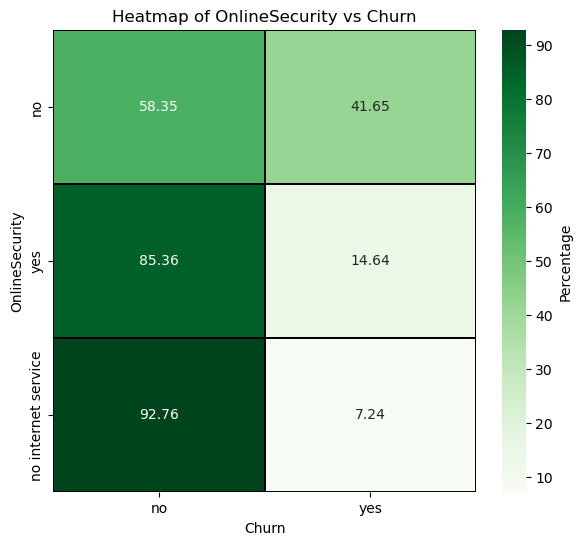

In [81]:
cat_cat(df,"OnlineSecurity", "Churn")

Churn                       no        yes
OnlineBackup                             
no                   60.214355  39.785645
yes                  78.432990  21.567010
no internet service  92.762284   7.237716


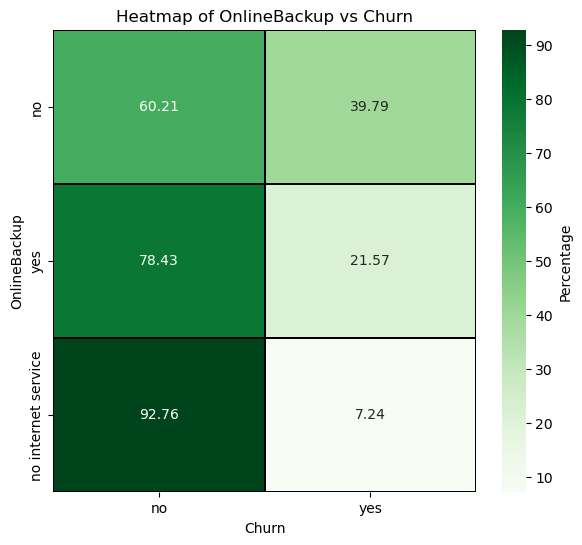

In [82]:
cat_cat(df,"OnlineBackup", "Churn")

Churn                       no        yes
DeviceProtection                         
no                   61.017498  38.982502
yes                  77.460711  22.539289
no internet service  92.762284   7.237716


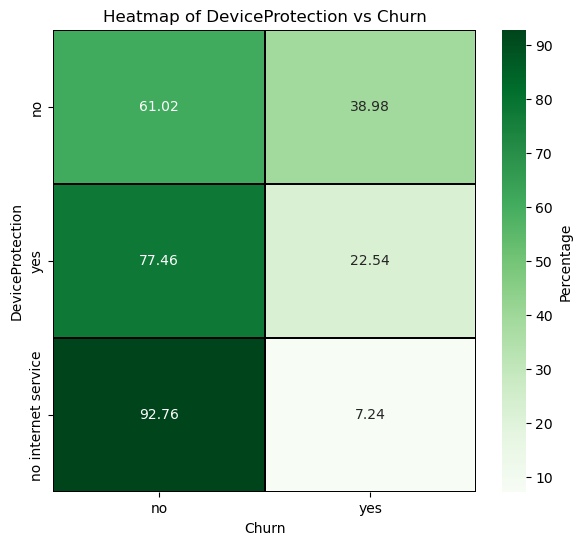

In [83]:
cat_cat(df,"DeviceProtection", "Churn")

Churn                       no        yes
TechSupport                              
no                   58.487298  41.512702
yes                  84.803922  15.196078
no internet service  92.762284   7.237716


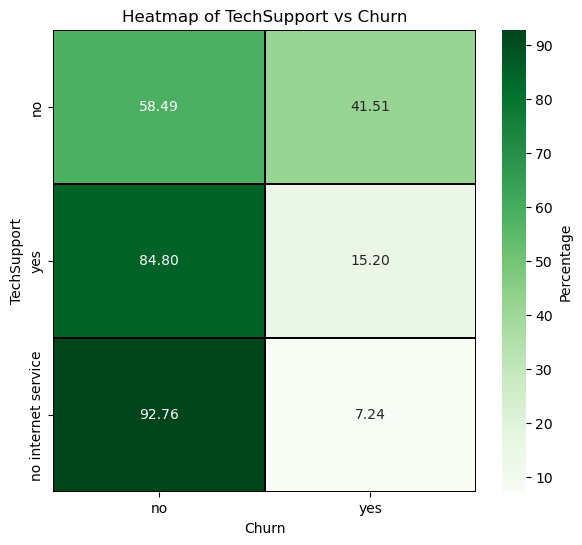

In [84]:
cat_cat(df,"TechSupport", "Churn")

Churn                       no        yes
StreamingTV                              
no                   66.654766  33.345234
yes                  69.885313  30.114687
no internet service  92.762284   7.237716


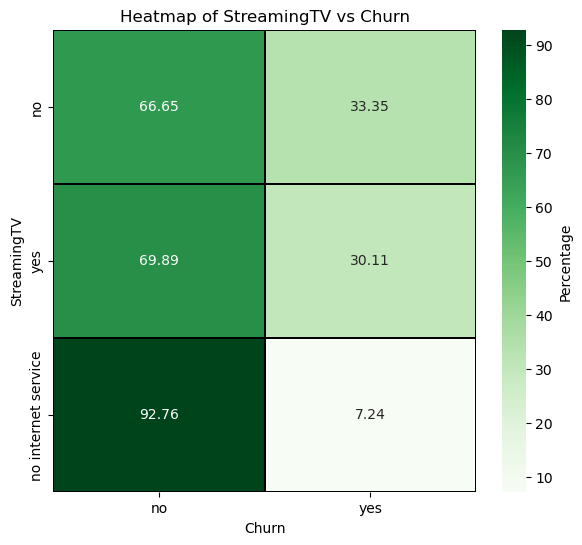

In [85]:
cat_cat(df,"StreamingTV", "Churn")

Churn                       no        yes
StreamingMovies                          
no                   66.462315  33.537685
yes                  70.047602  29.952398
no internet service  92.762284   7.237716


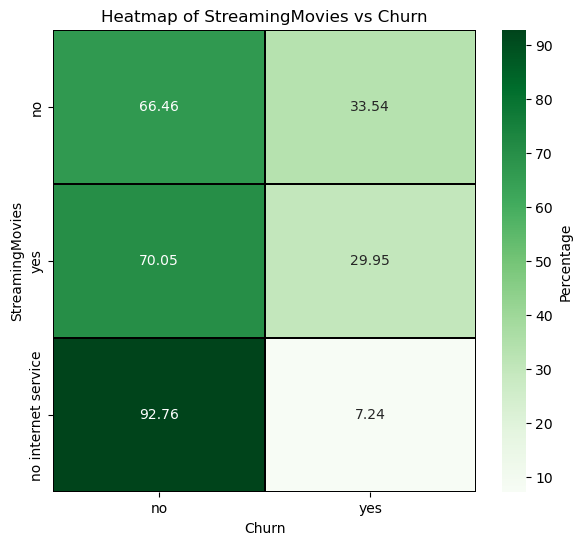

In [86]:
cat_cat(df,"StreamingMovies", "Churn")

Churn                  no        yes
Contract                            
month-to-month  57.357903  42.642097
two year        97.151335   2.848665
one year        88.722826  11.277174


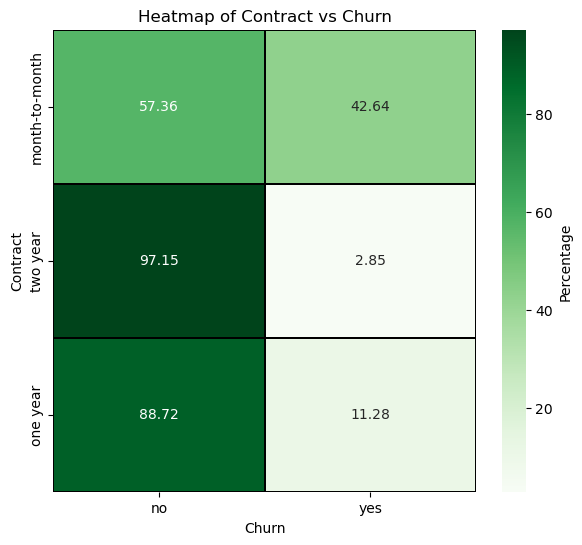

In [87]:
cat_cat(df,"Contract", "Churn")

Churn                    no        yes
PaperlessBilling                      
yes               66.546417  33.453583
no                83.660589  16.339411


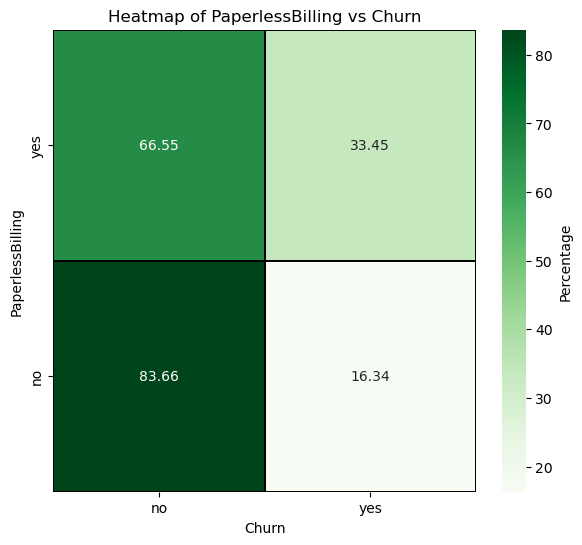

In [88]:
cat_cat(df,"PaperlessBilling", "Churn")

Churn                             no        yes
PaymentMethod                                  
electronic check           54.853752  45.146248
mailed check               80.982368  19.017632
bank transfer (automatic)  83.268482  16.731518
credit card (automatic)    84.746877  15.253123


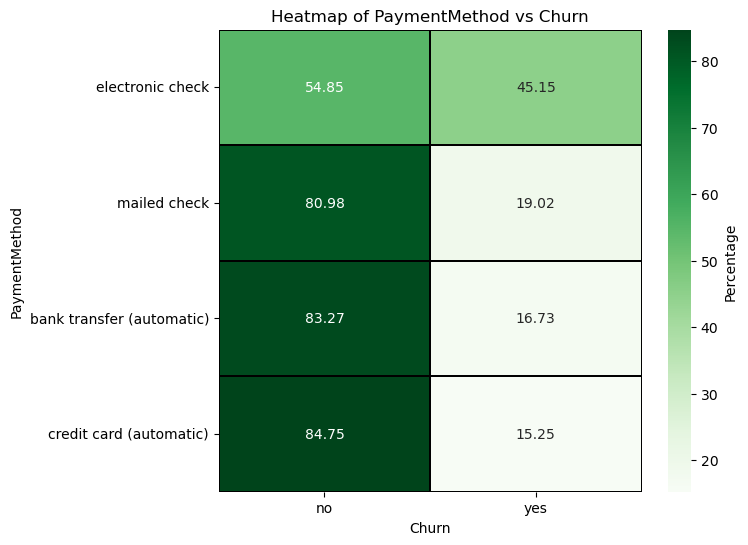

In [89]:
cat_cat(df,"PaymentMethod", "Churn")

## Numerical vs Numerical

In [90]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

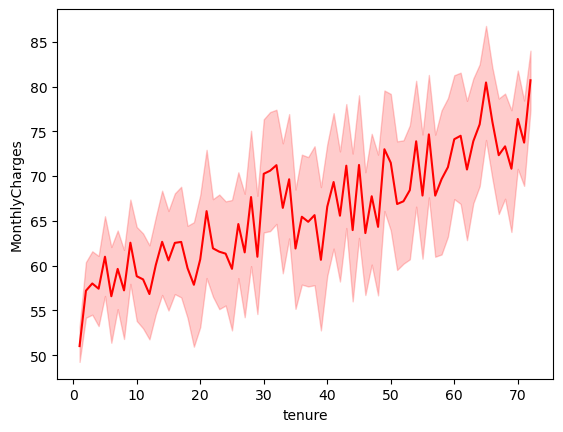

In [91]:
sns.lineplot(data= df, x="tenure", y="MonthlyCharges", color="red")

<Axes: xlabel='tenure', ylabel='TotalCharges'>

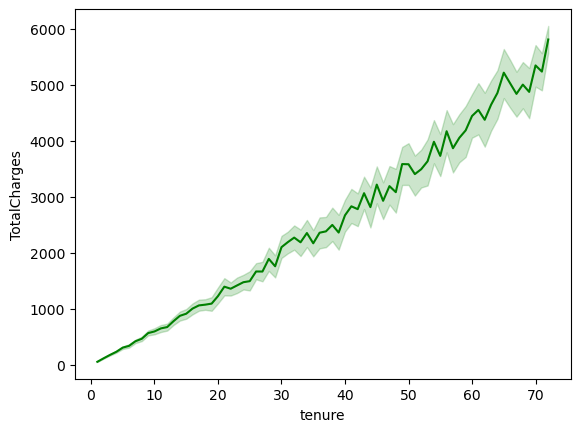

In [92]:
sns.lineplot(data= df, x="tenure", y="TotalCharges", color="green")

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

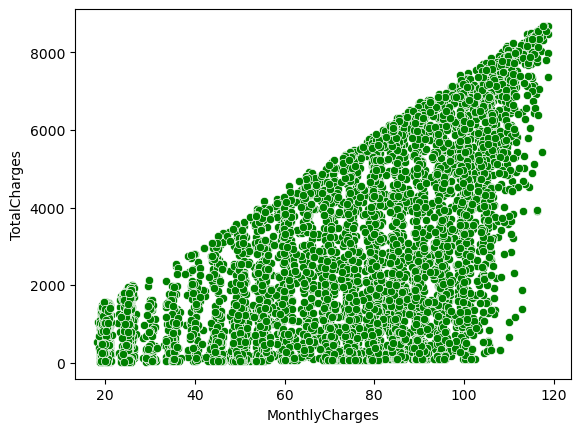

In [93]:
sns.scatterplot(data= df, x="MonthlyCharges", y="TotalCharges", color="green")

# Observations:

**1. Tenure vs MonthlyCharges (Line Plot with Confidence Band)**

* MonthlyCharges show a **gradual increasing trend** as tenure increases.
* This means customers who stay longer tend to pay **slightly higher monthly charges**.
* The shaded region shows variability, but the **overall upward trend is consistent**.
* Possible reason: long-tenured customers may subscribe to **extra services**, increasing their monthly cost.

**2. Tenure vs TotalCharges (Line Plot with Confidence Band)**

* TotalCharges **increase sharply and almost linearly** with tenure.
* This is expected because the longer a customer stays, the more they have paid overall.
* The relationship is **strong and consistent**, with very little deviation.
* This confirms that tenure is a **direct and strong predictor** of TotalCharges.

**3. MonthlyCharges vs TotalCharges (Scatter Plot)**

* There is a **clear positive correlation**: higher MonthlyCharges generally lead to higher TotalCharges.
* The triangular spread indicates:
  * New customers with high monthly charges have **low total charges**.
  * Long-term customers with high monthly charges form the **upper end** of the triangle.
* The pattern confirms that **TotalCharges depend on both MonthlyCharges and tenure together**.
* No major outliers observed — the data follows a natural increasing trend.


## Multivariate Analysis

## Grouped Bar Chart

In [94]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

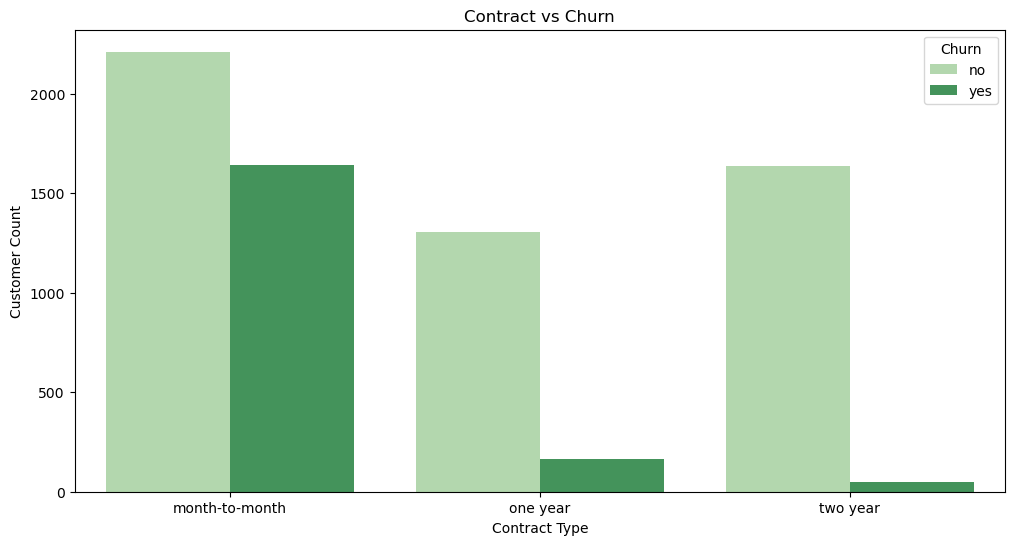

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Contract', hue='Churn',palette="Greens")
plt.title("Contract vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.show()

# Observations: 
- Month-to-month contracts have the highest churn.
- The number of customers who churn (yes) is very high compared to those with longer-term contracts.
- One-year and two-year contracts show very low churn.
- Most customers with long-term contracts do not leave.
- This suggests stronger customer retention for longer contract commitments.
- Insight: Month-to-month customers are more likely to leave, possibly due to flexibility and lack of long-term commitment.

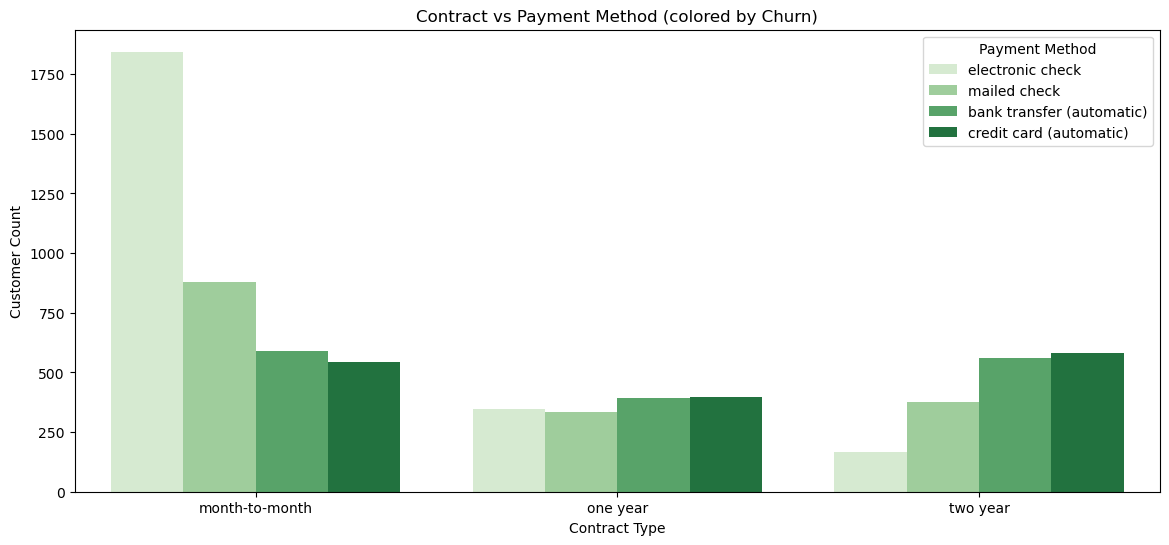

In [96]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Contract', hue='PaymentMethod', palette="Greens")
plt.title("Contract vs Payment Method (colored by Churn)")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.legend(title="Payment Method")
plt.show()

# Observations: 
- For month-to-month customers, electronic check users are the highest group, and this payment type is strongly associated with higher churn in general.

- Customers using automatic payment methods (bank transfer or credit card) appear more stable and are more common in one-year and two-year contracts.

- For long-term contracts, payments are more evenly spread across automatic methods, which are known to reduce churn due to convenience.

- Insight:
    - Electronic check + month-to-month contract = highest churn risk.
    - Automatic payments + long-term contracts = highest customer retention.

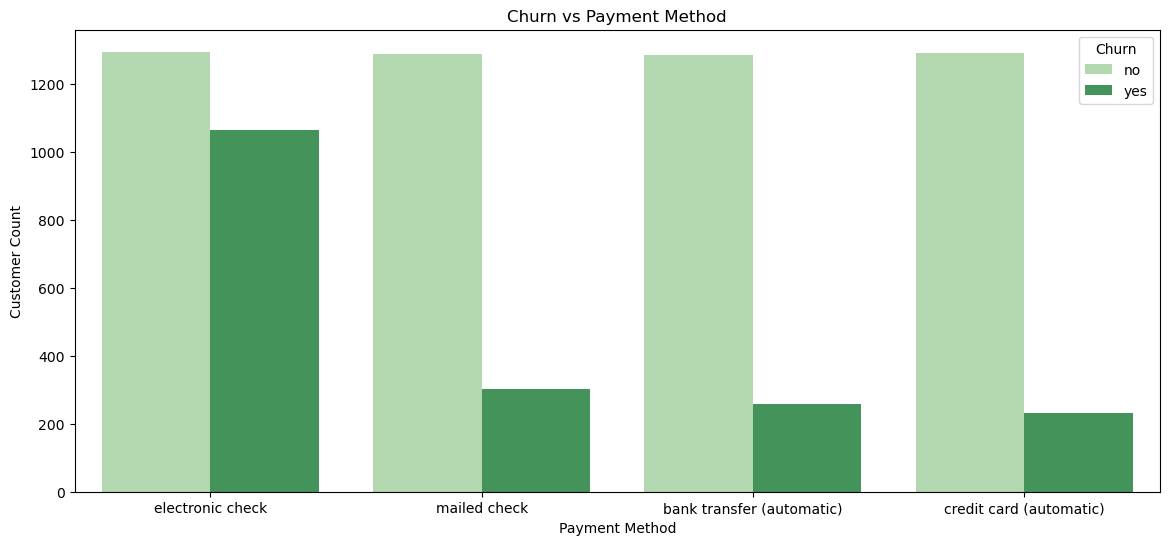

In [97]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette="Greens")
plt.title("Churn vs Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Customer Count")
plt.legend(title="Churn")
plt.show()

# Observations: 
- Electronic check users show the highest churn across payment methods.
- Automatic payment methods (bank transfer or credit card) have the lowest churn and are associated with more stable customers.
- Mailed check users fall between electronic check and automatic methods in churn levels.

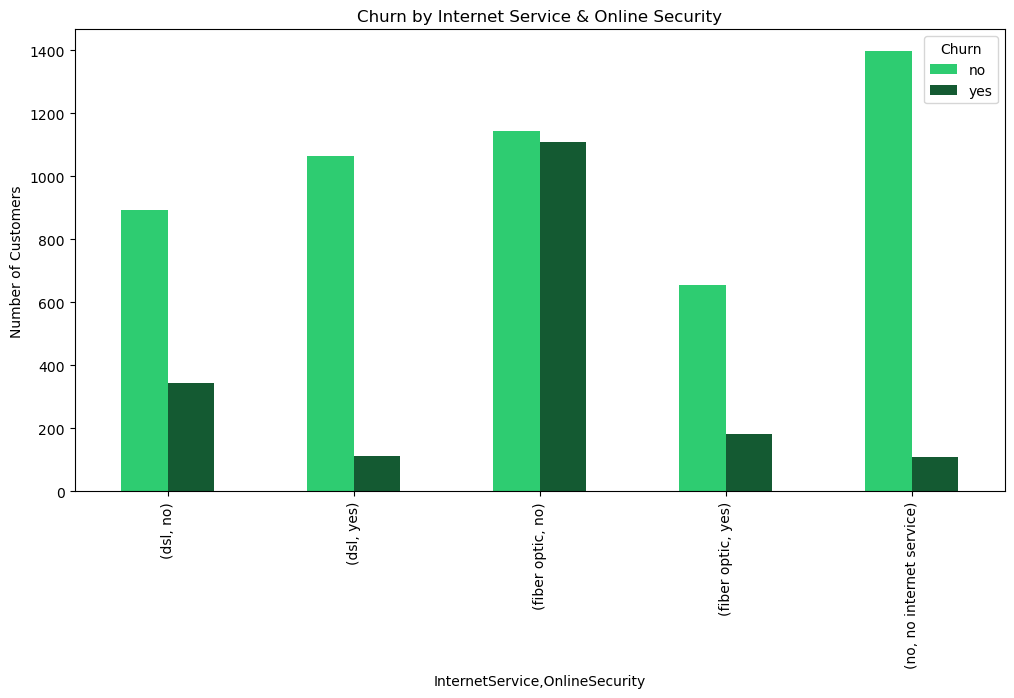

In [98]:
grouped = df.groupby(['InternetService', 'OnlineSecurity', 'Churn']).size().unstack(fill_value=0)
colors = ["#2ecc71", "#145a32"]
grouped.plot(kind='bar', figsize=(12,6), color=colors)
plt.title("Churn by Internet Service & Online Security")
plt.ylabel("Number of Customers")
plt.show()


# Observations:

- For fiber optic customers, those without online security form the highest churn group, showing a strong link between lack of security services and churn.
- Customers with online security (DSL or fiber) churn less, indicating that this service contributes to better retention.
- DSL users show comparatively low churn overall, with or without security.

#### In telecom, DSL stands for Digital Subscriber Line. It is a broadband internet technology that transmits digital data over traditional copper telephone lines, allowing for high-speed internet access without interfering with simultaneous voice calls. DSL is known for being a widely available and relatively inexpensive way to get internet service.

#### In telecommunications, fiber optic technology transmits information using pulses of light through thin strands of glass or plastic, providing high-speed, high-bandwidth data transfer over long distances with minimal signal loss and interference. This makes it the backbone for modern internet, phone, and television services, enabling faster, more reliable connections than traditional copper cables

In [120]:
# df.to_csv("Churn Dataset.csv")